In [327]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.utils import Sequence

In [86]:
data = pd.read_csv('data/train.csv')

In [87]:
data

id    time    x  y
0        1       0  800  0
1        1     780  780  0
2        1    1572  792  0
3        1    2392  820  0
4        1    3196  804  0
...    ...     ...  ... ..
60482  275  115360  552  0
60483  275  115912  552  0
60484  275  116464  552  0
60485  275  117020  556  0
60486  275  117572  552  0

[60487 rows x 4 columns]

In [88]:
data = data[data.x < 1100]
data = data[data.x > 400]

In [379]:
data

id    time    x  y    x_norm
0        1       0  800  0  0.572254
1        1     780  780  0  0.543353
2        1    1572  792  0  0.560694
3        1    2392  820  0  0.601156
4        1    3196  804  0  0.578035
...    ...     ...  ... ..       ...
50051  275  115360  552  0  0.213873
50052  275  115912  552  0  0.213873
50053  275  116464  552  0  0.213873
50054  275  117020  556  0  0.219653
50055  275  117572  552  0  0.213873

[50056 rows x 5 columns]

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['x_norm'] = scaler.fit_transform(np.expand_dims(data.x, axis=1)).flatten()

In [90]:
data.index = list(range(len(data)))

In [91]:
train = data[data.id < 200]
test = data[data.id >= 200]

In [92]:
len(train.id.unique())

166

In [93]:
len(test.id.unique())

63

In [94]:
for i in train.id.unique():
    print(len(data[data.id == i]))

1819
225
105
135
189
168
115
110
113
197
261
177
183
229
392
843
770
923
470
373
327
272
105
136
94
108
126
41
66
149
69
71
65
152
93
90
135
131
160
77
87
100
80
95
87
144
163
96
41
108
171
201
169
131
101
94
104
93
106
138
136
186
138
76
56
125
210
246
68
86
72
130
70
130
84
181
163
178
234
122
99
80
100
106
127
73
99
86
167
132
257
260
212
111
144
146
178
193
229
105
134
152
327
56
183
219
188
79
32
804
153
166
57
140
2993
46
119
531
1282
209
173
170
90
71
74
229
197
341
314
482
198
105
140
358
894
328
422
116
131
174
905
1134
1445
82
75
93
237
343
95
81
132
120
69
190
64
112
95
105
78
143
66
192
178
136
176
206


In [123]:
class Generator(tf.keras.utils.Sequence):
    def __init__(self, data):
        self.data = data
        self.IDs = data.id.unique()
    
    def __getitem__(self, idx):
        batch = self.data[self.data.id == self.IDs[idx]]
        X = np.array(batch.x_norm, dtype='float32')
        return np.reshape(X, (len(X), 1, 1)), np.array(batch.y)
    
    def __len__(self):
        return len(self.IDs)

In [124]:
generator = Generator(train)

In [125]:
X, y = generator.__getitem__(0)

### CNN

In [96]:
res = {}
c = 1
for i in range(1,len(train)):
    if train.iloc[i-1].y == 0 and train.iloc[i].y == 1:
        coord = [i]
    if train.iloc[i-1].y == 1 and train.iloc[i].y == 1:
        c+=1
    if train.iloc[i-1].y == 1 and train.iloc[i].y == 0:
        coord.append(i-1)
        if train.iloc[i-1].id in res.keys():
            res[train.iloc[i-1].id].append(c)
            res[train.iloc[i-1].id].append(coord)
        else:
            res[train.iloc[i-1].id] = [c]
            res[train.iloc[i-1].id] = [coord]
        c = 1

In [108]:
res

{1.0: [[322, 335], 14, [722, 735], 11, [1338, 1348]],
 2.0: [[1864, 1872], 10, [1969, 1978], 8, [1990, 1997], 10, [2031, 2040]],
 3.0: [[2047, 2055], 9, [2096, 2104], 10, [2107, 2116], 12, [2133, 2144]],
 4.0: [[2153, 2172], 9, [2198, 2206], 10, [2217, 2226]],
 5.0: [[2343, 2351], 9, [2372, 2380], 12, [2428, 2439], 11, [2451, 2461]],
 6.0: [[2484, 2494], 11, [2541, 2551], 12, [2568, 2579], 10, [2620, 2629]],
 7.0: [[2653, 2664], 10, [2674, 2683], 11, [2738, 2748]],
 10.0: [[2799, 2806], 22, [2817, 2838], 6, [2842, 2847]],
 12.0: [[2871, 2880], 12, [2896, 2907], 11, [2964, 2974]],
 13.0: [[2986, 2994], 8, [3122, 3129], 18, [3139, 3156]],
 14.0: [[3195, 3202], 14, [3216, 3229], 8, [3395, 3402], 10, [3412, 3421]],
 15.0: [[3453, 3460], 7, [3465, 3471], 8, [3526, 3533], 9, [3599, 3607]],
 16.0: [[3620, 3630], 9, [3658, 3666], 7, [3699, 3705], 8, [3758, 3765]],
 17.0: [[3829, 3837], 8, [3853, 3860], 13, [3874, 3886], 17, [4001, 4017]],
 19.0: [[4065, 4074], 8, [4119, 4126], 14, [4249, 4262]

      id     time    x  y    x_norm
1340   1  1040596  716  1  0.450867
1341   1  1041316  720  1  0.456647
1342   1  1042040  724  1  0.462428
1343   1  1042824  784  1  0.549133
1344   1  1043508  684  1  0.404624
1345   1  1044220  712  1  0.445087
1346   1  1044916  696  1  0.421965
1347   1  1045624  708  1  0.439306
1348   1  1046348  724  1  0.462428
1349   1  1047060  712  0  0.445087


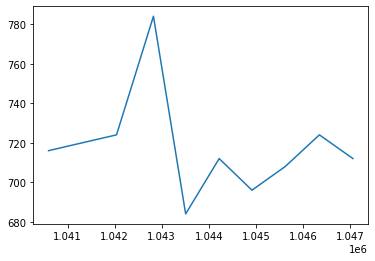

In [111]:
frame = data.loc[1340:1349]
print(frame)
plt.plot(frame.time, frame.x)

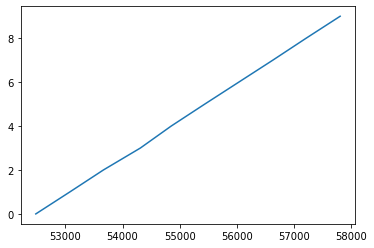

In [446]:
plt.plot([52480, 53076, 53664, 54312, 54852, 55440, 56036, 56632, 57216, 57812], list(range(10)))

In [382]:
def create_cnn_data(df):
    cnn_data = pd.DataFrame([], columns=['i', 'x', 'y'])
    frame_len = 10
    spike_threshold = 7
    for i in df.id.unique():
        indices = df[df.id == i].index
        if(len(indices) > frame_len):
            for n in range(len(indices)//frame_len):
                frame = df.loc[indices]
                frame = frame.iloc[n*frame_len:(n+1)*frame_len]
                if(sum(frame.y) >= spike_threshold):
                    spike = 1
                else:
                    spike = 0
                cnn_data = pd.concat([cnn_data, pd.DataFrame({'i': [frame.index],
                                                          'x': [np.asarray(frame.x).astype('float32')], 
                                                          'y': np.array(spike)})], ignore_index=True)
    return cnn_data

In [383]:
cnn_data = create_cnn_data(data)
cnn_data

In [384]:
cnn_data

i  \
0     Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dty...   
1     Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18...   
2     Int64Index([20, 21, 22, 23, 24, 25, 26, 27, 28...   
3     Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38...   
4     Int64Index([40, 41, 42, 43, 44, 45, 46, 47, 48...   
...                                                 ...   
4900  Int64Index([50001, 50002, 50003, 50004, 50005,...   
4901  Int64Index([50011, 50012, 50013, 50014, 50015,...   
4902  Int64Index([50021, 50022, 50023, 50024, 50025,...   
4903  Int64Index([50031, 50032, 50033, 50034, 50035,...   
4904  Int64Index([50041, 50042, 50043, 50044, 50045,...   

                                                      x  y  
0     [800.0, 780.0, 792.0, 820.0, 804.0, 828.0, 916...  0  
1     [836.0, 792.0, 776.0, 736.0, 724.0, 728.0, 760...  0  
2     [848.0, 816.0, 784.0, 768.0, 736.0, 740.0, 756...  0  
3     [748.0, 740.0, 756.0, 772.0, 780.0, 752.0, 752...  0  
4     [752.0, 720.0, 716.0, 720.0, 728.0, 720.0, 748...  0  
...                                                 ... ..  
4900  [572.0, 572.0, 568.0, 568.0, 568.0, 560.0, 564...  0  
4901  [556.0, 548.0, 548.0, 552.0, 544.0, 556.0, 608...  1  
4902  [560.0, 556.0, 556.0, 552.0, 556.0, 556.0, 556...  0  
4903  [548.0, 552.0, 552.0, 560.0, 560.0, 556.0, 560...  0  
4904  [556.0, 560.0, 560.0, 556.0, 560.0, 560.0, 552...  0  

[4905 rows x 3 columns]

In [260]:
X = np.array([cnn_data.x[1]])
for x in cnn_data.x[1:]:
    X = np.concatenate((X, [x]), axis=0)

In [261]:
sum(cnn_data.y)/len(cnn_data)

0.1400611620795107

In [265]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, cnn_data.y, test_size=0.33, random_state=42)

#### Model

In [123]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [351]:
def create_model(conv_layers, dense_layers, kernel_size, pool_size, lr=0.001, layer_size=64):
    model = Sequential()
    for c in range(conv_layers):
        model.add(layers.Conv1D(layer_size, kernel_size, activation='relu', input_shape=(frame_len, 1)))
        model.add(layers.MaxPooling1D(pool_size=pool_size))
    model.add(layers.Flatten())
    for d in range(dense_layers):
        model.add(layers.Dense(layer_size, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=[tf.keras.metrics.BinaryAccuracy()])
    return model

In [354]:
model.summary()

Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
max_pooling1d_202 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
flatten_193 (Flatten)        (None, 128)               0         
_________________________________________________________________
dense_398 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_399 (Dense)            (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [353]:
model = create_model(2, 2, 3, 4)
model.fit(X_train, y_train, epochs=300, batch_size=20)

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv1d_208/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d_208/conv1d/ExpandDims, conv1d_208/conv1d/ExpandDims_1)' with input shapes: [?,1,2,64], [1,3,64,64].

In [347]:
pred = model.predict(X_test)

In [348]:
len(pred[pred > 0.5])

228

In [370]:
total_spikes = len(y_test[y_test == 1.0])
total_spikes

243

In [357]:
y_test.index = list(range(len(y_test)))

In [371]:
spikes = pred[y_test[y_test == 1.0].index]
tp_spikes = len(spikes[spikes > 0.5])
tp_spikes

171

In [372]:
tp_spikes/total_spikes

0.7037037037037037

In [355]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, pred)
m.result().numpy()

0.92032117

In [356]:
f1_score(y_test, list(map(lambda x: 0 if x < 0.5 else 1, pred)), average='binary')

0.7261146496815287

In [333]:
%%time
grid = {}
for k in [2, 3, 4, 5, 6]:
    for p in [2, 3, 4, 5, 6]:
        for b in [1, 5, 10, 20]:
            for lr in [0.1, 0.01, 0.001]:
                epochs = int(100*math.log10(1/lr))
                model = create_model(k, p, lr)
                model.fit(X_train, y_train, epochs=epochs, batch_size=b)
                pred = model.predict(X_test)
                m = tf.keras.metrics.BinaryAccuracy()
                m.update_state(y_test, pred)
                ba = m.result().numpy()
                f1 = f1_score(y_test, list(map(lambda x: 0 if x < 0.5 else 1, pred)), average='binary')
                grid[f'{k}, {p}, {lr}, {b}'] = [ba, f1]

Epoch 1/100
3286/3286 [==============================] - 3s 833us/step - loss: 13.8210 - binary_accuracy: 0.8628
Epoch 2/100
3286/3286 [==============================] - 3s 764us/step - loss: 0.4087 - binary_accuracy: 0.8649
Epoch 3/100
3286/3286 [==============================] - 3s 768us/step - loss: 0.4034 - binary_accuracy: 0.8649
Epoch 4/100
3286/3286 [==============================] - 3s 776us/step - loss: 0.4047 - binary_accuracy: 0.8649
Epoch 5/100
3286/3286 [==============================] - 3s 792us/step - loss: 0.4024 - binary_accuracy: 0.8649
Epoch 6/100
3286/3286 [==============================] - 3s 793us/step - loss: 0.4058 - binary_accuracy: 0.8649
Epoch 7/100
3286/3286 [==============================] - 3s 788us/step - loss: 0.4047 - binary_accuracy: 0.8649
Epoch 8/100
3286/3286 [==============================] - 3s 793us/step - loss: 0.4050 - binary_accuracy: 0.8649
Epoch 9/100
3286/3286 [==============================] - 3s 804us/step - loss: 0.4045 - binary_accuracy

3286/3286 [==============================] - 2s 652us/step - loss: 0.4053 - binary_accuracy: 0.8649
Epoch 74/100
3286/3286 [==============================] - 2s 655us/step - loss: 0.4067 - binary_accuracy: 0.8649
Epoch 75/100
3286/3286 [==============================] - 2s 622us/step - loss: 0.4057 - binary_accuracy: 0.8649
Epoch 76/100
3286/3286 [==============================] - 2s 626us/step - loss: 0.4065 - binary_accuracy: 0.8649
Epoch 77/100
3286/3286 [==============================] - 2s 657us/step - loss: 0.4049 - binary_accuracy: 0.8649
Epoch 78/100
3286/3286 [==============================] - 3s 861us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 79/100
3286/3286 [==============================] - 2s 676us/step - loss: 0.4044 - binary_accuracy: 0.8649
Epoch 80/100
3286/3286 [==============================] - 2s 628us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 81/100
3286/3286 [==============================] - 2s 625us/step - loss: 0.4055 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 722us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 46/200
3286/3286 [==============================] - 2s 711us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 47/200
3286/3286 [==============================] - 2s 750us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 48/200
3286/3286 [==============================] - 2s 705us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 49/200
3286/3286 [==============================] - 2s 704us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 50/200
3286/3286 [==============================] - 2s 715us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 51/200
3286/3286 [==============================] - 2s 722us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 52/200
3286/3286 [==============================] - 2s 720us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 53/200
3286/3286 [==============================] - 2s 719us/step - loss: 0.3965 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 632us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 118/200
3286/3286 [==============================] - 2s 619us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 119/200
3286/3286 [==============================] - 2s 625us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 120/200
3286/3286 [==============================] - 2s 629us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 121/200
3286/3286 [==============================] - 2s 624us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 122/200
3286/3286 [==============================] - 2s 623us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 123/200
3286/3286 [==============================] - 2s 631us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 124/200
3286/3286 [==============================] - 2s 626us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 125/200
3286/3286 [==============================] - 2s 657us/step - loss: 0.3970 - binary_accur

Epoch 189/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 190/200
3286/3286 [==============================] - 2s 601us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 191/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 192/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 193/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 194/200
3286/3286 [==============================] - 2s 600us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 195/200
3286/3286 [==============================] - 2s 594us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 196/200
3286/3286 [==============================] - 2s 594us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 197/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3973 

3286/3286 [==============================] - 2s 590us/step - loss: 0.3734 - binary_accuracy: 0.8649
Epoch 62/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3476 - binary_accuracy: 0.8558
Epoch 63/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3511 - binary_accuracy: 0.8582
Epoch 64/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3328 - binary_accuracy: 0.8582
Epoch 65/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3228 - binary_accuracy: 0.8628
Epoch 66/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3207 - binary_accuracy: 0.8612
Epoch 67/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3158 - binary_accuracy: 0.8640
Epoch 68/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3189 - binary_accuracy: 0.8643
Epoch 69/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3211 - binary_accuracy: 0.8

Epoch 133/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3784 - binary_accuracy: 0.8646
Epoch 134/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3798 - binary_accuracy: 0.8649
Epoch 135/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3764 - binary_accuracy: 0.8649
Epoch 136/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3734 - binary_accuracy: 0.8649
Epoch 137/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3779 - binary_accuracy: 0.8646
Epoch 138/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3639 - binary_accuracy: 0.8649
Epoch 139/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3683 - binary_accuracy: 0.8649
Epoch 140/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3729 - binary_accuracy: 0.8649
Epoch 141/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3721 

3286/3286 [==============================] - 2s 590us/step - loss: 0.3711 - binary_accuracy: 0.8649
Epoch 205/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3738 - binary_accuracy: 0.8649
Epoch 206/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3746 - binary_accuracy: 0.8649
Epoch 207/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3681 - binary_accuracy: 0.8646
Epoch 208/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3676 - binary_accuracy: 0.8646
Epoch 209/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3714 - binary_accuracy: 0.8646
Epoch 210/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3693 - binary_accuracy: 0.8649
Epoch 211/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 212/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3846 - binary_accur

Epoch 276/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3721 - binary_accuracy: 0.8646
Epoch 277/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3757 - binary_accuracy: 0.8649
Epoch 278/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3739 - binary_accuracy: 0.8646
Epoch 279/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3754 - binary_accuracy: 0.8646
Epoch 280/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3693 - binary_accuracy: 0.8646
Epoch 281/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3691 - binary_accuracy: 0.8646
Epoch 282/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3642 - binary_accuracy: 0.8646
Epoch 283/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3748 - binary_accuracy: 0.8646
Epoch 284/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3728 

658/658 [==============================] - 0s 709us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 50/100
658/658 [==============================] - 0s 669us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 51/100
658/658 [==============================] - 0s 686us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 52/100
658/658 [==============================] - 0s 670us/step - loss: 0.4008 - binary_accuracy: 0.8649
Epoch 53/100
658/658 [==============================] - 0s 674us/step - loss: 0.4013 - binary_accuracy: 0.8649
Epoch 54/100
658/658 [==============================] - 0s 693us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 55/100
658/658 [==============================] - 0s 690us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 56/100
658/658 [==============================] - 0s 682us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 57/100
658/658 [==============================] - 0s 668us/step - loss: 0.4019 - binary_accuracy: 0.8649
Epoch 58/100
6

Epoch 23/200
658/658 [==============================] - 0s 689us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 24/200
658/658 [==============================] - 0s 678us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 25/200
658/658 [==============================] - 0s 682us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 26/200
658/658 [==============================] - 0s 674us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 27/200
658/658 [==============================] - 0s 724us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 28/200
658/658 [==============================] - 0s 671us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 29/200
658/658 [==============================] - 0s 684us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 30/200
658/658 [==============================] - 0s 669us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 31/200
658/658 [==============================] - 0s 675us/step - loss: 0.3968 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 666us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 97/200
658/658 [==============================] - 0s 691us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 98/200
658/658 [==============================] - 0s 671us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 99/200
658/658 [==============================] - 0s 694us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 100/200
658/658 [==============================] - 0s 687us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 101/200
658/658 [==============================] - 0s 676us/step - loss: 0.3956 - binary_accuracy: 0.8649
Epoch 102/200
658/658 [==============================] - 0s 688us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 103/200
658/658 [==============================] - 0s 674us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 104/200
658/658 [==============================] - 0s 698us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 105

658/658 [==============================] - 0s 673us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 170/200
658/658 [==============================] - 0s 696us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 171/200
658/658 [==============================] - 0s 677us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 172/200
658/658 [==============================] - 0s 699us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 173/200
658/658 [==============================] - 0s 666us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 174/200
658/658 [==============================] - 0s 697us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 175/200
658/658 [==============================] - 0s 682us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 176/200
658/658 [==============================] - 0s 676us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 177/200
658/658 [==============================] - 0s 682us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 678us/step - loss: 0.2378 - binary_accuracy: 0.8977
Epoch 43/300
658/658 [==============================] - 0s 675us/step - loss: 0.2413 - binary_accuracy: 0.8974
Epoch 44/300
658/658 [==============================] - 0s 715us/step - loss: 0.2503 - binary_accuracy: 0.8923
Epoch 45/300
658/658 [==============================] - 0s 675us/step - loss: 0.2382 - binary_accuracy: 0.8956
Epoch 46/300
658/658 [==============================] - 0s 692us/step - loss: 0.2333 - binary_accuracy: 0.8981
Epoch 47/300
658/658 [==============================] - 0s 676us/step - loss: 0.2386 - binary_accuracy: 0.8944
Epoch 48/300
658/658 [==============================] - 0s 667us/step - loss: 0.2411 - binary_accuracy: 0.8984
Epoch 49/300
658/658 [==============================] - 0s 686us/step - loss: 0.2357 - binary_accuracy: 0.9008
Epoch 50/300
658/658 [==============================] - 0s 674us/step - loss: 0.2399 - binary_accuracy: 0.8941
Epoch 51/300
6

658/658 [==============================] - 0s 681us/step - loss: 0.2134 - binary_accuracy: 0.9060
Epoch 116/300
658/658 [==============================] - 0s 668us/step - loss: 0.2211 - binary_accuracy: 0.9020
Epoch 117/300
658/658 [==============================] - 0s 701us/step - loss: 0.2292 - binary_accuracy: 0.9014
Epoch 118/300
658/658 [==============================] - 0s 676us/step - loss: 0.2178 - binary_accuracy: 0.8996
Epoch 119/300
658/658 [==============================] - 0s 680us/step - loss: 0.2225 - binary_accuracy: 0.9051
Epoch 120/300
658/658 [==============================] - 0s 668us/step - loss: 0.2208 - binary_accuracy: 0.9054
Epoch 121/300
658/658 [==============================] - 0s 665us/step - loss: 0.2400 - binary_accuracy: 0.8935
Epoch 122/300
658/658 [==============================] - 0s 684us/step - loss: 0.2172 - binary_accuracy: 0.9044
Epoch 123/300
658/658 [==============================] - 0s 666us/step - loss: 0.2186 - binary_accuracy: 0.9060
Epoch 

658/658 [==============================] - 0s 687us/step - loss: 0.2102 - binary_accuracy: 0.9075
Epoch 189/300
658/658 [==============================] - 0s 672us/step - loss: 0.2178 - binary_accuracy: 0.9060
Epoch 190/300
658/658 [==============================] - 0s 718us/step - loss: 0.2088 - binary_accuracy: 0.9075
Epoch 191/300
658/658 [==============================] - 0s 690us/step - loss: 0.2127 - binary_accuracy: 0.9072
Epoch 192/300
658/658 [==============================] - 0s 682us/step - loss: 0.2196 - binary_accuracy: 0.9087
Epoch 193/300
658/658 [==============================] - 0s 662us/step - loss: 0.2187 - binary_accuracy: 0.9047
Epoch 194/300
658/658 [==============================] - 0s 666us/step - loss: 0.2116 - binary_accuracy: 0.9081
Epoch 195/300
658/658 [==============================] - 0s 683us/step - loss: 0.2112 - binary_accuracy: 0.9121
Epoch 196/300
658/658 [==============================] - 0s 668us/step - loss: 0.2107 - binary_accuracy: 0.9093
Epoch 

658/658 [==============================] - 0s 683us/step - loss: 0.2017 - binary_accuracy: 0.9142
Epoch 262/300
658/658 [==============================] - 0s 669us/step - loss: 0.2124 - binary_accuracy: 0.9102
Epoch 263/300
658/658 [==============================] - 0s 703us/step - loss: 0.2073 - binary_accuracy: 0.9130
Epoch 264/300
658/658 [==============================] - 0s 676us/step - loss: 0.2149 - binary_accuracy: 0.9063
Epoch 265/300
658/658 [==============================] - 0s 668us/step - loss: 0.2024 - binary_accuracy: 0.9124
Epoch 266/300
658/658 [==============================] - 0s 677us/step - loss: 0.2079 - binary_accuracy: 0.9111
Epoch 267/300
658/658 [==============================] - 0s 672us/step - loss: 0.2143 - binary_accuracy: 0.9063
Epoch 268/300
658/658 [==============================] - 0s 684us/step - loss: 0.2027 - binary_accuracy: 0.9102
Epoch 269/300
658/658 [==============================] - 0s 670us/step - loss: 0.2019 - binary_accuracy: 0.9145
Epoch 

329/329 [==============================] - 0s 723us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 35/100
329/329 [==============================] - 0s 710us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 36/100
329/329 [==============================] - 0s 741us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 37/100
329/329 [==============================] - 0s 718us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 38/100
329/329 [==============================] - 0s 703us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 39/100
329/329 [==============================] - 0s 698us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 40/100
329/329 [==============================] - 0s 703us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 41/100
329/329 [==============================] - 0s 717us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 42/100
329/329 [==============================] - 0s 764us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 43/100
3

Epoch 8/200
329/329 [==============================] - 0s 744us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 9/200
329/329 [==============================] - 0s 713us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 10/200
329/329 [==============================] - 0s 701us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 11/200
329/329 [==============================] - 0s 706us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 12/200
329/329 [==============================] - 0s 742us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 13/200
329/329 [==============================] - 0s 703us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 14/200
329/329 [==============================] - 0s 701us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 15/200
329/329 [==============================] - 0s 701us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 16/200
329/329 [==============================] - 0s 811us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epo

329/329 [==============================] - 0s 733us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 82/200
329/329 [==============================] - 0s 719us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 83/200
329/329 [==============================] - 0s 706us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 84/200
329/329 [==============================] - 0s 710us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 85/200
329/329 [==============================] - 0s 739us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 86/200
329/329 [==============================] - 0s 712us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 87/200
329/329 [==============================] - 0s 733us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 88/200
329/329 [==============================] - 0s 706us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 89/200
329/329 [==============================] - 0s 725us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 90/200
3

329/329 [==============================] - 0s 720us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 155/200
329/329 [==============================] - 0s 692us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 156/200
329/329 [==============================] - 0s 705us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 157/200
329/329 [==============================] - 0s 713us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 158/200
329/329 [==============================] - 0s 718us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 159/200
329/329 [==============================] - 0s 720us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 160/200
329/329 [==============================] - 0s 710us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 161/200
329/329 [==============================] - 0s 704us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 162/200
329/329 [==============================] - 0s 742us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 744us/step - loss: 0.2366 - binary_accuracy: 0.9014
Epoch 28/300
329/329 [==============================] - 0s 692us/step - loss: 0.2356 - binary_accuracy: 0.9032
Epoch 29/300
329/329 [==============================] - 0s 724us/step - loss: 0.2279 - binary_accuracy: 0.9057
Epoch 30/300
329/329 [==============================] - 0s 700us/step - loss: 0.2276 - binary_accuracy: 0.9017
Epoch 31/300
329/329 [==============================] - 0s 703us/step - loss: 0.2238 - binary_accuracy: 0.9026
Epoch 32/300
329/329 [==============================] - 0s 700us/step - loss: 0.2211 - binary_accuracy: 0.9057
Epoch 33/300
329/329 [==============================] - 0s 751us/step - loss: 0.2225 - binary_accuracy: 0.9069
Epoch 34/300
329/329 [==============================] - 0s 706us/step - loss: 0.2189 - binary_accuracy: 0.9111
Epoch 35/300
329/329 [==============================] - 0s 695us/step - loss: 0.2265 - binary_accuracy: 0.9099
Epoch 36/300
3

329/329 [==============================] - 0s 686us/step - loss: 0.2001 - binary_accuracy: 0.9114
Epoch 101/300
329/329 [==============================] - 0s 699us/step - loss: 0.1889 - binary_accuracy: 0.9157
Epoch 102/300
329/329 [==============================] - 0s 693us/step - loss: 0.1874 - binary_accuracy: 0.9215
Epoch 103/300
329/329 [==============================] - 0s 739us/step - loss: 0.2114 - binary_accuracy: 0.9111
Epoch 104/300
329/329 [==============================] - 0s 730us/step - loss: 0.2002 - binary_accuracy: 0.9154
Epoch 105/300
329/329 [==============================] - 0s 698us/step - loss: 0.1992 - binary_accuracy: 0.9172
Epoch 106/300
329/329 [==============================] - 0s 699us/step - loss: 0.1849 - binary_accuracy: 0.9206
Epoch 107/300
329/329 [==============================] - 0s 726us/step - loss: 0.1990 - binary_accuracy: 0.9184
Epoch 108/300
329/329 [==============================] - 0s 720us/step - loss: 0.1913 - binary_accuracy: 0.9200
Epoch 

329/329 [==============================] - 0s 718us/step - loss: 0.1846 - binary_accuracy: 0.9227
Epoch 174/300
329/329 [==============================] - 0s 694us/step - loss: 0.1840 - binary_accuracy: 0.9209
Epoch 175/300
329/329 [==============================] - 0s 697us/step - loss: 0.1991 - binary_accuracy: 0.9163
Epoch 176/300
329/329 [==============================] - 0s 697us/step - loss: 0.1817 - binary_accuracy: 0.9227
Epoch 177/300
329/329 [==============================] - 0s 740us/step - loss: 0.1815 - binary_accuracy: 0.9218
Epoch 178/300
329/329 [==============================] - 0s 696us/step - loss: 0.1833 - binary_accuracy: 0.9212
Epoch 179/300
329/329 [==============================] - 0s 694us/step - loss: 0.1864 - binary_accuracy: 0.9224
Epoch 180/300
329/329 [==============================] - 0s 735us/step - loss: 0.1839 - binary_accuracy: 0.9194
Epoch 181/300
329/329 [==============================] - 0s 723us/step - loss: 0.1838 - binary_accuracy: 0.9197
Epoch 

329/329 [==============================] - 0s 692us/step - loss: 0.1785 - binary_accuracy: 0.9264
Epoch 247/300
329/329 [==============================] - 0s 704us/step - loss: 0.1807 - binary_accuracy: 0.9212
Epoch 248/300
329/329 [==============================] - 0s 701us/step - loss: 0.1891 - binary_accuracy: 0.9181
Epoch 249/300
329/329 [==============================] - 0s 701us/step - loss: 0.1764 - binary_accuracy: 0.9239
Epoch 250/300
329/329 [==============================] - 0s 698us/step - loss: 0.1760 - binary_accuracy: 0.9260
Epoch 251/300
329/329 [==============================] - 0s 717us/step - loss: 0.1747 - binary_accuracy: 0.9221
Epoch 252/300
329/329 [==============================] - 0s 700us/step - loss: 0.1857 - binary_accuracy: 0.9224
Epoch 253/300
329/329 [==============================] - 0s 698us/step - loss: 0.1772 - binary_accuracy: 0.9218
Epoch 254/300
329/329 [==============================] - 0s 705us/step - loss: 0.1744 - binary_accuracy: 0.9227
Epoch 

165/165 [==============================] - 0s 782us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 20/100
165/165 [==============================] - 0s 767us/step - loss: 0.4031 - binary_accuracy: 0.8649
Epoch 21/100
165/165 [==============================] - 0s 737us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 22/100
165/165 [==============================] - 0s 749us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 23/100
165/165 [==============================] - 0s 744us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 24/100
165/165 [==============================] - 0s 743us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 25/100
165/165 [==============================] - 0s 750us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 26/100
165/165 [==============================] - 0s 744us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 27/100
165/165 [==============================] - 0s 787us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 28/100
1

165/165 [==============================] - 0s 793us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 93/100
165/165 [==============================] - 0s 745us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 94/100
165/165 [==============================] - 0s 740us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 95/100
165/165 [==============================] - 0s 735us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 96/100
165/165 [==============================] - 0s 738us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 97/100
165/165 [==============================] - 0s 744us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 98/100
165/165 [==============================] - 0s 746us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 99/100
165/165 [==============================] - 0s 744us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 100/100
165/165 [==============================] - 0s 815us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 1/200
1

Epoch 66/200
165/165 [==============================] - 0s 747us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 67/200
165/165 [==============================] - 0s 740us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 68/200
165/165 [==============================] - 0s 786us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 69/200
165/165 [==============================] - 0s 763us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 70/200
165/165 [==============================] - 0s 826us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 71/200
165/165 [==============================] - 0s 744us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 72/200
165/165 [==============================] - 0s 746us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 73/200
165/165 [==============================] - 0s 754us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 74/200
165/165 [==============================] - 0s 769us/step - loss: 0.3965 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 742us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 140/200
165/165 [==============================] - 0s 766us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 141/200
165/165 [==============================] - 0s 856us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 142/200
165/165 [==============================] - 0s 754us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 143/200
165/165 [==============================] - 0s 756us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 144/200
165/165 [==============================] - 0s 748us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 145/200
165/165 [==============================] - 0s 750us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 146/200
165/165 [==============================] - 0s 781us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 147/200
165/165 [==============================] - 0s 750us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 755us/step - loss: 0.5023 - binary_accuracy: 0.8430
Epoch 13/300
165/165 [==============================] - 0s 750us/step - loss: 0.4418 - binary_accuracy: 0.8591
Epoch 14/300
165/165 [==============================] - 0s 759us/step - loss: 0.7004 - binary_accuracy: 0.8290
Epoch 15/300
165/165 [==============================] - 0s 744us/step - loss: 0.6865 - binary_accuracy: 0.8281
Epoch 16/300
165/165 [==============================] - 0s 745us/step - loss: 0.4630 - binary_accuracy: 0.8503
Epoch 17/300
165/165 [==============================] - 0s 835us/step - loss: 0.5335 - binary_accuracy: 0.8567
Epoch 18/300
165/165 [==============================] - 0s 756us/step - loss: 0.4968 - binary_accuracy: 0.8457
Epoch 19/300
165/165 [==============================] - 0s 746us/step - loss: 0.4275 - binary_accuracy: 0.8576
Epoch 20/300
165/165 [==============================] - 0s 746us/step - loss: 0.4126 - binary_accuracy: 0.8582
Epoch 21/300
1

165/165 [==============================] - 0s 750us/step - loss: 0.2105 - binary_accuracy: 0.9066
Epoch 86/300
165/165 [==============================] - 0s 732us/step - loss: 0.2129 - binary_accuracy: 0.9078
Epoch 87/300
165/165 [==============================] - 0s 732us/step - loss: 0.2080 - binary_accuracy: 0.9133
Epoch 88/300
165/165 [==============================] - 0s 744us/step - loss: 0.2119 - binary_accuracy: 0.9102
Epoch 89/300
165/165 [==============================] - 0s 774us/step - loss: 0.2090 - binary_accuracy: 0.9133
Epoch 90/300
165/165 [==============================] - 0s 806us/step - loss: 0.2057 - binary_accuracy: 0.9145
Epoch 91/300
165/165 [==============================] - 0s 752us/step - loss: 0.2139 - binary_accuracy: 0.9102
Epoch 92/300
165/165 [==============================] - 0s 742us/step - loss: 0.2143 - binary_accuracy: 0.9130
Epoch 93/300
165/165 [==============================] - 0s 763us/step - loss: 0.2128 - binary_accuracy: 0.9114
Epoch 94/300
1

165/165 [==============================] - 0s 738us/step - loss: 0.1908 - binary_accuracy: 0.9203
Epoch 159/300
165/165 [==============================] - 0s 738us/step - loss: 0.1902 - binary_accuracy: 0.9187
Epoch 160/300
165/165 [==============================] - 0s 738us/step - loss: 0.1922 - binary_accuracy: 0.9227
Epoch 161/300
165/165 [==============================] - 0s 750us/step - loss: 0.2013 - binary_accuracy: 0.9166
Epoch 162/300
165/165 [==============================] - 0s 738us/step - loss: 0.1917 - binary_accuracy: 0.9194
Epoch 163/300
165/165 [==============================] - 0s 823us/step - loss: 0.1992 - binary_accuracy: 0.9166
Epoch 164/300
165/165 [==============================] - 0s 738us/step - loss: 0.1945 - binary_accuracy: 0.9197
Epoch 165/300
165/165 [==============================] - 0s 738us/step - loss: 0.1913 - binary_accuracy: 0.9206
Epoch 166/300
165/165 [==============================] - 0s 744us/step - loss: 0.1878 - binary_accuracy: 0.9203
Epoch 

165/165 [==============================] - 0s 746us/step - loss: 0.1767 - binary_accuracy: 0.9276
Epoch 232/300
165/165 [==============================] - 0s 763us/step - loss: 0.1810 - binary_accuracy: 0.9212
Epoch 233/300
165/165 [==============================] - 0s 732us/step - loss: 0.1894 - binary_accuracy: 0.9224
Epoch 234/300
165/165 [==============================] - 0s 739us/step - loss: 0.1899 - binary_accuracy: 0.9169
Epoch 235/300
165/165 [==============================] - 0s 738us/step - loss: 0.1927 - binary_accuracy: 0.9163
Epoch 236/300
165/165 [==============================] - 0s 818us/step - loss: 0.1840 - binary_accuracy: 0.9206
Epoch 237/300
165/165 [==============================] - 0s 751us/step - loss: 0.1839 - binary_accuracy: 0.9227
Epoch 238/300
165/165 [==============================] - 0s 744us/step - loss: 0.1785 - binary_accuracy: 0.9260
Epoch 239/300
165/165 [==============================] - 0s 740us/step - loss: 0.1842 - binary_accuracy: 0.9206
Epoch 

3286/3286 [==============================] - 2s 592us/step - loss: 0.4062 - binary_accuracy: 0.8649
Epoch 5/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4065 - binary_accuracy: 0.8649
Epoch 6/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 7/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 8/100
3286/3286 [==============================] - 2s 582us/step - loss: 0.4066 - binary_accuracy: 0.8649
Epoch 9/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4063 - binary_accuracy: 0.8649
Epoch 10/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4059 - binary_accuracy: 0.8649
Epoch 11/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4035 - binary_accuracy: 0.8649
Epoch 12/100
3286/3286 [==============================] - 2s 585us/step - loss: 0.4051 - binary_accuracy: 0.8649
E

3286/3286 [==============================] - 2s 594us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 77/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4048 - binary_accuracy: 0.8649
Epoch 78/100
3286/3286 [==============================] - 2s 580us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 79/100
3286/3286 [==============================] - 2s 592us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 80/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 81/100
3286/3286 [==============================] - 2s 580us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 82/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4048 - binary_accuracy: 0.8649
Epoch 83/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 84/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4053 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 591us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 49/200
3286/3286 [==============================] - 2s 596us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 50/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 51/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 52/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 53/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 54/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 55/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 56/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3971 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 590us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 121/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 122/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 123/200
3286/3286 [==============================] - 2s 586us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 124/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 125/200
3286/3286 [==============================] - 2s 605us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 126/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 127/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 128/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3973 - binary_accur

Epoch 192/200
3286/3286 [==============================] - 2s 583us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 193/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 194/200
3286/3286 [==============================] - 2s 587us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 195/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 196/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 197/200
3286/3286 [==============================] - 2s 585us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 198/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 199/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 200/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3962 

3286/3286 [==============================] - 2s 585us/step - loss: 0.3761 - binary_accuracy: 0.8649
Epoch 65/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3705 - binary_accuracy: 0.8646
Epoch 66/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3736 - binary_accuracy: 0.8646
Epoch 67/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3719 - binary_accuracy: 0.8649
Epoch 68/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3691 - binary_accuracy: 0.8649
Epoch 69/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3734 - binary_accuracy: 0.8649
Epoch 70/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3742 - binary_accuracy: 0.8646
Epoch 71/300
3286/3286 [==============================] - 2s 580us/step - loss: 0.3744 - binary_accuracy: 0.8649
Epoch 72/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3699 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 587us/step - loss: 0.3747 - binary_accuracy: 0.8649
Epoch 137/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3720 - binary_accuracy: 0.8646
Epoch 138/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3728 - binary_accuracy: 0.8643
Epoch 139/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3705 - binary_accuracy: 0.8646
Epoch 140/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3769 - binary_accuracy: 0.8646
Epoch 141/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.3731 - binary_accuracy: 0.8643
Epoch 142/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3705 - binary_accuracy: 0.8646
Epoch 143/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3780 - binary_accuracy: 0.8646
Epoch 144/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3712 - binary_accur

Epoch 208/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3622 - binary_accuracy: 0.8646
Epoch 209/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3713 - binary_accuracy: 0.8646
Epoch 210/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3720 - binary_accuracy: 0.8649
Epoch 211/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3718 - binary_accuracy: 0.8646
Epoch 212/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3674 - binary_accuracy: 0.8649
Epoch 213/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3676 - binary_accuracy: 0.8649
Epoch 214/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3733 - binary_accuracy: 0.8649
Epoch 215/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3746 - binary_accuracy: 0.8646
Epoch 216/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3720 

3286/3286 [==============================] - 2s 583us/step - loss: 0.3745 - binary_accuracy: 0.8646
Epoch 280/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3676 - binary_accuracy: 0.8649
Epoch 281/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3729 - binary_accuracy: 0.8646
Epoch 282/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3728 - binary_accuracy: 0.8646
Epoch 283/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3709 - binary_accuracy: 0.8649
Epoch 284/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3676 - binary_accuracy: 0.8649
Epoch 285/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3692 - binary_accuracy: 0.8649
Epoch 286/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3745 - binary_accuracy: 0.8649
Epoch 287/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3729 - binary_accur

658/658 [==============================] - 0s 684us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 53/100
658/658 [==============================] - 0s 668us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 54/100
658/658 [==============================] - 0s 658us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 55/100
658/658 [==============================] - 0s 666us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 56/100
658/658 [==============================] - 0s 651us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 57/100
658/658 [==============================] - 0s 655us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 58/100
658/658 [==============================] - 0s 680us/step - loss: 0.4010 - binary_accuracy: 0.8649
Epoch 59/100
658/658 [==============================] - 0s 651us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 60/100
658/658 [==============================] - 0s 662us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 61/100
6

Epoch 26/200
658/658 [==============================] - 0s 664us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 27/200
658/658 [==============================] - 0s 662us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 28/200
658/658 [==============================] - 0s 642us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 29/200
658/658 [==============================] - 0s 644us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 30/200
658/658 [==============================] - 0s 653us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 31/200
658/658 [==============================] - 0s 649us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 32/200
658/658 [==============================] - 0s 677us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 33/200
658/658 [==============================] - 0s 663us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 34/200
658/658 [==============================] - 0s 660us/step - loss: 0.3967 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 648us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 100/200
658/658 [==============================] - 0s 643us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 101/200
658/658 [==============================] - 0s 658us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 102/200
658/658 [==============================] - 0s 659us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 103/200
658/658 [==============================] - 0s 663us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 104/200
658/658 [==============================] - 0s 647us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 105/200
658/658 [==============================] - 0s 657us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 106/200
658/658 [==============================] - 0s 647us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 107/200
658/658 [==============================] - 0s 642us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 658us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 173/200
658/658 [==============================] - 0s 650us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 174/200
658/658 [==============================] - 0s 651us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 175/200
658/658 [==============================] - 0s 634us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 176/200
658/658 [==============================] - 0s 648us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 177/200
658/658 [==============================] - 0s 650us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 178/200
658/658 [==============================] - 0s 660us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 179/200
658/658 [==============================] - 0s 685us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 180/200
658/658 [==============================] - 0s 648us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 647us/step - loss: 0.2237 - binary_accuracy: 0.8993
Epoch 46/300
658/658 [==============================] - 0s 676us/step - loss: 0.2293 - binary_accuracy: 0.8971
Epoch 47/300
658/658 [==============================] - 0s 647us/step - loss: 0.2390 - binary_accuracy: 0.8904
Epoch 48/300
658/658 [==============================] - 0s 645us/step - loss: 0.2266 - binary_accuracy: 0.8977
Epoch 49/300
658/658 [==============================] - 0s 667us/step - loss: 0.2423 - binary_accuracy: 0.8898
Epoch 50/300
658/658 [==============================] - 0s 650us/step - loss: 0.2320 - binary_accuracy: 0.8935
Epoch 51/300
658/658 [==============================] - 0s 660us/step - loss: 0.2293 - binary_accuracy: 0.8977
Epoch 52/300
658/658 [==============================] - 0s 645us/step - loss: 0.2311 - binary_accuracy: 0.8996
Epoch 53/300
658/658 [==============================] - 0s 675us/step - loss: 0.2310 - binary_accuracy: 0.8889
Epoch 54/300
6

658/658 [==============================] - 0s 660us/step - loss: 0.2218 - binary_accuracy: 0.8914
Epoch 119/300
658/658 [==============================] - 0s 673us/step - loss: 0.2177 - binary_accuracy: 0.8990
Epoch 120/300
658/658 [==============================] - 0s 651us/step - loss: 0.2203 - binary_accuracy: 0.8929
Epoch 121/300
658/658 [==============================] - 0s 676us/step - loss: 0.2209 - binary_accuracy: 0.8938
Epoch 122/300
658/658 [==============================] - 0s 665us/step - loss: 0.2191 - binary_accuracy: 0.8962
Epoch 123/300
658/658 [==============================] - 0s 650us/step - loss: 0.2193 - binary_accuracy: 0.9011
Epoch 124/300
658/658 [==============================] - 0s 668us/step - loss: 0.2212 - binary_accuracy: 0.8935
Epoch 125/300
658/658 [==============================] - 0s 652us/step - loss: 0.2187 - binary_accuracy: 0.8944
Epoch 126/300
658/658 [==============================] - 0s 660us/step - loss: 0.2189 - binary_accuracy: 0.8987
Epoch 

658/658 [==============================] - 0s 653us/step - loss: 0.2130 - binary_accuracy: 0.9026
Epoch 192/300
658/658 [==============================] - 0s 661us/step - loss: 0.2193 - binary_accuracy: 0.9023
Epoch 193/300
658/658 [==============================] - 0s 644us/step - loss: 0.2180 - binary_accuracy: 0.8956
Epoch 194/300
658/658 [==============================] - 0s 655us/step - loss: 0.2158 - binary_accuracy: 0.8974
Epoch 195/300
658/658 [==============================] - 0s 649us/step - loss: 0.2351 - binary_accuracy: 0.8907
Epoch 196/300
658/658 [==============================] - 0s 648us/step - loss: 0.2188 - binary_accuracy: 0.8941
Epoch 197/300
658/658 [==============================] - 0s 669us/step - loss: 0.2205 - binary_accuracy: 0.8993
Epoch 198/300
658/658 [==============================] - 0s 657us/step - loss: 0.2254 - binary_accuracy: 0.8956
Epoch 199/300
658/658 [==============================] - 0s 655us/step - loss: 0.2201 - binary_accuracy: 0.8968
Epoch 

658/658 [==============================] - 0s 659us/step - loss: 0.2149 - binary_accuracy: 0.9005
Epoch 265/300
658/658 [==============================] - 0s 686us/step - loss: 0.2206 - binary_accuracy: 0.8981
Epoch 266/300
658/658 [==============================] - 0s 650us/step - loss: 0.2177 - binary_accuracy: 0.8977
Epoch 267/300
658/658 [==============================] - 0s 659us/step - loss: 0.2263 - binary_accuracy: 0.8956
Epoch 268/300
658/658 [==============================] - 0s 646us/step - loss: 0.2145 - binary_accuracy: 0.8968
Epoch 269/300
658/658 [==============================] - 0s 652us/step - loss: 0.2233 - binary_accuracy: 0.8929
Epoch 270/300
658/658 [==============================] - 0s 659us/step - loss: 0.2162 - binary_accuracy: 0.8953
Epoch 271/300
658/658 [==============================] - 0s 644us/step - loss: 0.2144 - binary_accuracy: 0.8999
Epoch 272/300
658/658 [==============================] - 0s 683us/step - loss: 0.2281 - binary_accuracy: 0.8984
Epoch 

329/329 [==============================] - 0s 704us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 38/100
329/329 [==============================] - 0s 678us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 39/100
329/329 [==============================] - 0s 694us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 40/100
329/329 [==============================] - 0s 674us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 41/100
329/329 [==============================] - 0s 668us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 42/100
329/329 [==============================] - 0s 668us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 43/100
329/329 [==============================] - 0s 671us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 44/100
329/329 [==============================] - 0s 704us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 45/100
329/329 [==============================] - 0s 686us/step - loss: 0.3987 - binary_accuracy: 0.8649
Epoch 46/100
3

Epoch 11/200
329/329 [==============================] - 0s 702us/step - loss: 0.3962 - binary_accuracy: 0.8621
Epoch 12/200
329/329 [==============================] - 0s 704us/step - loss: 0.3828 - binary_accuracy: 0.8649
Epoch 13/200
329/329 [==============================] - 0s 701us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 14/200
329/329 [==============================] - 0s 701us/step - loss: 0.3956 - binary_accuracy: 0.8649
Epoch 15/200
329/329 [==============================] - 0s 746us/step - loss: 0.3832 - binary_accuracy: 0.8649
Epoch 16/200
329/329 [==============================] - 0s 699us/step - loss: 0.3897 - binary_accuracy: 0.8649
Epoch 17/200
329/329 [==============================] - 0s 707us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 18/200
329/329 [==============================] - 0s 704us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 19/200
329/329 [==============================] - 0s 721us/step - loss: 0.3966 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 739us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 85/200
329/329 [==============================] - 0s 710us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 86/200
329/329 [==============================] - 0s 713us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 87/200
329/329 [==============================] - 0s 701us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 88/200
329/329 [==============================] - 0s 729us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 89/200
329/329 [==============================] - 0s 744us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 90/200
329/329 [==============================] - 0s 716us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 91/200
329/329 [==============================] - 0s 710us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 92/200
329/329 [==============================] - 0s 739us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 93/200
3

329/329 [==============================] - 0s 734us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 158/200
329/329 [==============================] - 0s 707us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 159/200
329/329 [==============================] - 0s 701us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 160/200
329/329 [==============================] - 0s 719us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 161/200
329/329 [==============================] - 0s 758us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 162/200
329/329 [==============================] - 0s 700us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 163/200
329/329 [==============================] - 0s 708us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 164/200
329/329 [==============================] - 0s 702us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 165/200
329/329 [==============================] - 0s 705us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 738us/step - loss: 0.2548 - binary_accuracy: 0.8883
Epoch 31/300
329/329 [==============================] - 0s 697us/step - loss: 0.2463 - binary_accuracy: 0.8901
Epoch 32/300
329/329 [==============================] - 0s 712us/step - loss: 0.2423 - binary_accuracy: 0.8874
Epoch 33/300
329/329 [==============================] - 0s 728us/step - loss: 0.2311 - binary_accuracy: 0.8968
Epoch 34/300
329/329 [==============================] - 0s 702us/step - loss: 0.2407 - binary_accuracy: 0.8904
Epoch 35/300
329/329 [==============================] - 0s 723us/step - loss: 0.2460 - binary_accuracy: 0.8938
Epoch 36/300
329/329 [==============================] - 0s 719us/step - loss: 0.2361 - binary_accuracy: 0.8865
Epoch 37/300
329/329 [==============================] - 0s 719us/step - loss: 0.2402 - binary_accuracy: 0.8883
Epoch 38/300
329/329 [==============================] - 0s 698us/step - loss: 0.2313 - binary_accuracy: 0.8996
Epoch 39/300
3

329/329 [==============================] - 0s 702us/step - loss: 0.2132 - binary_accuracy: 0.9023
Epoch 104/300
329/329 [==============================] - 0s 704us/step - loss: 0.2103 - binary_accuracy: 0.9105
Epoch 105/300
329/329 [==============================] - 0s 695us/step - loss: 0.2155 - binary_accuracy: 0.9017
Epoch 106/300
329/329 [==============================] - 0s 693us/step - loss: 0.2116 - binary_accuracy: 0.9017
Epoch 107/300
329/329 [==============================] - 0s 729us/step - loss: 0.2151 - binary_accuracy: 0.9026
Epoch 108/300
329/329 [==============================] - 0s 695us/step - loss: 0.2068 - binary_accuracy: 0.9032
Epoch 109/300
329/329 [==============================] - 0s 692us/step - loss: 0.2190 - binary_accuracy: 0.9005
Epoch 110/300
329/329 [==============================] - 0s 701us/step - loss: 0.2197 - binary_accuracy: 0.9023
Epoch 111/300
329/329 [==============================] - 0s 762us/step - loss: 0.2096 - binary_accuracy: 0.9063
Epoch 

329/329 [==============================] - 0s 698us/step - loss: 0.1986 - binary_accuracy: 0.9105
Epoch 177/300
329/329 [==============================] - 0s 713us/step - loss: 0.2002 - binary_accuracy: 0.9054
Epoch 178/300
329/329 [==============================] - 0s 695us/step - loss: 0.1946 - binary_accuracy: 0.9108
Epoch 179/300
329/329 [==============================] - 0s 695us/step - loss: 0.2002 - binary_accuracy: 0.9145
Epoch 180/300
329/329 [==============================] - 0s 692us/step - loss: 0.2004 - binary_accuracy: 0.9057
Epoch 181/300
329/329 [==============================] - 0s 713us/step - loss: 0.1982 - binary_accuracy: 0.9133
Epoch 182/300
329/329 [==============================] - 0s 689us/step - loss: 0.2025 - binary_accuracy: 0.9038
Epoch 183/300
329/329 [==============================] - 0s 689us/step - loss: 0.2026 - binary_accuracy: 0.9087
Epoch 184/300
329/329 [==============================] - 0s 689us/step - loss: 0.1938 - binary_accuracy: 0.9078
Epoch 

329/329 [==============================] - 0s 710us/step - loss: 0.2118 - binary_accuracy: 0.9060
Epoch 250/300
329/329 [==============================] - 0s 703us/step - loss: 0.2051 - binary_accuracy: 0.9029
Epoch 251/300
329/329 [==============================] - 0s 725us/step - loss: 0.1998 - binary_accuracy: 0.9090
Epoch 252/300
329/329 [==============================] - 0s 741us/step - loss: 0.1918 - binary_accuracy: 0.9121
Epoch 253/300
329/329 [==============================] - 0s 694us/step - loss: 0.1899 - binary_accuracy: 0.9102
Epoch 254/300
329/329 [==============================] - 0s 695us/step - loss: 0.1988 - binary_accuracy: 0.9081
Epoch 255/300
329/329 [==============================] - 0s 716us/step - loss: 0.1996 - binary_accuracy: 0.9044
Epoch 256/300
329/329 [==============================] - 0s 692us/step - loss: 0.1950 - binary_accuracy: 0.9084
Epoch 257/300
329/329 [==============================] - 0s 686us/step - loss: 0.1955 - binary_accuracy: 0.9111
Epoch 

165/165 [==============================] - 0s 774us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 23/100
165/165 [==============================] - 0s 747us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 24/100
165/165 [==============================] - 0s 825us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 25/100
165/165 [==============================] - 0s 744us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 26/100
165/165 [==============================] - 0s 787us/step - loss: 0.4008 - binary_accuracy: 0.8649
Epoch 27/100
165/165 [==============================] - 0s 750us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 28/100
165/165 [==============================] - 0s 750us/step - loss: 0.4000 - binary_accuracy: 0.8649
Epoch 29/100
165/165 [==============================] - 0s 817us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 30/100
165/165 [==============================] - 0s 750us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 31/100
1

165/165 [==============================] - 0s 785us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 96/100
165/165 [==============================] - 0s 757us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 97/100
165/165 [==============================] - 0s 748us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 98/100
165/165 [==============================] - 0s 807us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 99/100
165/165 [==============================] - 0s 772us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 100/100
165/165 [==============================] - 0s 760us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 1/200
165/165 [==============================] - 1s 794us/step - loss: 6.9929 - binary_accuracy: 0.8268
Epoch 2/200
165/165 [==============================] - 0s 788us/step - loss: 0.4197 - binary_accuracy: 0.8570
Epoch 3/200
165/165 [==============================] - 0s 759us/step - loss: 0.3919 - binary_accuracy: 0.8649
Epoch 4/200
165/

Epoch 69/200
165/165 [==============================] - 0s 751us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 70/200
165/165 [==============================] - 0s 767us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 71/200
165/165 [==============================] - 0s 786us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 72/200
165/165 [==============================] - 0s 771us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 73/200
165/165 [==============================] - 0s 750us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 74/200
165/165 [==============================] - 0s 806us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 75/200
165/165 [==============================] - 0s 764us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 76/200
165/165 [==============================] - 0s 758us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 77/200
165/165 [==============================] - 0s 752us/step - loss: 0.3962 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 744us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 143/200
165/165 [==============================] - 0s 749us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 144/200
165/165 [==============================] - 0s 744us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 145/200
165/165 [==============================] - 0s 761us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 146/200
165/165 [==============================] - 0s 810us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 147/200
165/165 [==============================] - 0s 760us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 148/200
165/165 [==============================] - 0s 756us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 149/200
165/165 [==============================] - 0s 790us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 150/200
165/165 [==============================] - 0s 774us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 762us/step - loss: 0.7149 - binary_accuracy: 0.8332
Epoch 16/300
165/165 [==============================] - 0s 764us/step - loss: 0.7553 - binary_accuracy: 0.8287
Epoch 17/300
165/165 [==============================] - 0s 758us/step - loss: 0.6437 - binary_accuracy: 0.8274
Epoch 18/300
165/165 [==============================] - 0s 762us/step - loss: 0.5016 - binary_accuracy: 0.8460
Epoch 19/300
165/165 [==============================] - 0s 841us/step - loss: 0.4447 - binary_accuracy: 0.8579
Epoch 20/300
165/165 [==============================] - 0s 762us/step - loss: 0.5681 - binary_accuracy: 0.8427
Epoch 21/300
165/165 [==============================] - 0s 876us/step - loss: 0.4680 - binary_accuracy: 0.8554
Epoch 22/300
165/165 [==============================] - 0s 767us/step - loss: 0.4091 - binary_accuracy: 0.8561
Epoch 23/300
165/165 [==============================] - 0s 789us/step - loss: 0.4645 - binary_accuracy: 0.8457
Epoch 24/300
1

165/165 [==============================] - 0s 849us/step - loss: 0.2268 - binary_accuracy: 0.8914
Epoch 89/300
165/165 [==============================] - 0s 756us/step - loss: 0.2244 - binary_accuracy: 0.8993
Epoch 90/300
165/165 [==============================] - 0s 752us/step - loss: 0.2332 - binary_accuracy: 0.8959
Epoch 91/300
165/165 [==============================] - 0s 754us/step - loss: 0.2272 - binary_accuracy: 0.8935
Epoch 92/300
165/165 [==============================] - 0s 816us/step - loss: 0.2265 - binary_accuracy: 0.8984
Epoch 93/300
165/165 [==============================] - 0s 751us/step - loss: 0.2202 - binary_accuracy: 0.8999
Epoch 94/300
165/165 [==============================] - 0s 762us/step - loss: 0.2216 - binary_accuracy: 0.9017
Epoch 95/300
165/165 [==============================] - 0s 761us/step - loss: 0.2269 - binary_accuracy: 0.8968
Epoch 96/300
165/165 [==============================] - 0s 770us/step - loss: 0.2280 - binary_accuracy: 0.8932
Epoch 97/300
1

165/165 [==============================] - 0s 756us/step - loss: 0.2167 - binary_accuracy: 0.8962
Epoch 162/300
165/165 [==============================] - 0s 744us/step - loss: 0.2155 - binary_accuracy: 0.8938
Epoch 163/300
165/165 [==============================] - 0s 762us/step - loss: 0.2120 - binary_accuracy: 0.9044
Epoch 164/300
165/165 [==============================] - 0s 829us/step - loss: 0.2146 - binary_accuracy: 0.8941
Epoch 165/300
165/165 [==============================] - 0s 756us/step - loss: 0.2185 - binary_accuracy: 0.9008
Epoch 166/300
165/165 [==============================] - 0s 756us/step - loss: 0.2105 - binary_accuracy: 0.8962
Epoch 167/300
165/165 [==============================] - 0s 756us/step - loss: 0.2120 - binary_accuracy: 0.9017
Epoch 168/300
165/165 [==============================] - 0s 756us/step - loss: 0.2099 - binary_accuracy: 0.8981
Epoch 169/300
165/165 [==============================] - 0s 750us/step - loss: 0.2106 - binary_accuracy: 0.8965
Epoch 

165/165 [==============================] - 0s 787us/step - loss: 0.2061 - binary_accuracy: 0.9047
Epoch 235/300
165/165 [==============================] - 0s 761us/step - loss: 0.2117 - binary_accuracy: 0.9005
Epoch 236/300
165/165 [==============================] - 0s 751us/step - loss: 0.2068 - binary_accuracy: 0.9011
Epoch 237/300
165/165 [==============================] - 0s 750us/step - loss: 0.2101 - binary_accuracy: 0.9020
Epoch 238/300
165/165 [==============================] - 0s 757us/step - loss: 0.2070 - binary_accuracy: 0.9023
Epoch 239/300
165/165 [==============================] - 0s 758us/step - loss: 0.2066 - binary_accuracy: 0.9023
Epoch 240/300
165/165 [==============================] - 0s 756us/step - loss: 0.2072 - binary_accuracy: 0.9041
Epoch 241/300
165/165 [==============================] - 0s 762us/step - loss: 0.2069 - binary_accuracy: 0.9057
Epoch 242/300
165/165 [==============================] - 0s 761us/step - loss: 0.2094 - binary_accuracy: 0.8981
Epoch 

3286/3286 [==============================] - 2s 594us/step - loss: 0.4049 - binary_accuracy: 0.8649
Epoch 8/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 9/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4067 - binary_accuracy: 0.8649
Epoch 10/100
3286/3286 [==============================] - 2s 593us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 11/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4063 - binary_accuracy: 0.8649
Epoch 12/100
3286/3286 [==============================] - 2s 590us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 13/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 14/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 15/100
3286/3286 [==============================] - 2s 594us/step - loss: 0.4031 - binary_accuracy: 0.864

3286/3286 [==============================] - 2s 587us/step - loss: 0.4026 - binary_accuracy: 0.8649
Epoch 80/100
3286/3286 [==============================] - 2s 589us/step - loss: 0.4031 - binary_accuracy: 0.8649
Epoch 81/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4030 - binary_accuracy: 0.8649
Epoch 82/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 83/100
3286/3286 [==============================] - 2s 589us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 84/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4044 - binary_accuracy: 0.8649
Epoch 85/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 86/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 87/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4043 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 592us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 52/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 53/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 54/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 55/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 56/200
3286/3286 [==============================] - 2s 586us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 57/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 58/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 59/200
3286/3286 [==============================] - 2s 609us/step - loss: 0.3968 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 592us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 124/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 125/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 126/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 127/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 128/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 129/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 130/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 131/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3975 - binary_accur

Epoch 195/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 196/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 197/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 198/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 199/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 200/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 1/300
3286/3286 [==============================] - 2s 636us/step - loss: 1.4192 - binary_accuracy: 0.8016
Epoch 2/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.4080 - binary_accuracy: 0.8533
Epoch 3/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3380 - bina

3286/3286 [==============================] - 2s 597us/step - loss: 0.2659 - binary_accuracy: 0.8786
Epoch 68/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.2609 - binary_accuracy: 0.8889
Epoch 69/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2651 - binary_accuracy: 0.8837
Epoch 70/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.2652 - binary_accuracy: 0.8825
Epoch 71/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.2612 - binary_accuracy: 0.8837
Epoch 72/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.2797 - binary_accuracy: 0.8771
Epoch 73/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.2645 - binary_accuracy: 0.8831
Epoch 74/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2680 - binary_accuracy: 0.8853
Epoch 75/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.2616 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 588us/step - loss: 0.2572 - binary_accuracy: 0.8837
Epoch 140/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.2728 - binary_accuracy: 0.8758
Epoch 141/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.2692 - binary_accuracy: 0.8837
Epoch 142/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.2742 - binary_accuracy: 0.8798
Epoch 143/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.2649 - binary_accuracy: 0.8834
Epoch 144/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.2579 - binary_accuracy: 0.8850
Epoch 145/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.2580 - binary_accuracy: 0.8828
Epoch 146/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2564 - binary_accuracy: 0.8868
Epoch 147/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2629 - binary_accur

Epoch 211/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.2651 - binary_accuracy: 0.8831
Epoch 212/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.2630 - binary_accuracy: 0.8865
Epoch 213/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.2562 - binary_accuracy: 0.8895
Epoch 214/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.2565 - binary_accuracy: 0.8862
Epoch 215/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.2631 - binary_accuracy: 0.8853
Epoch 216/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.2705 - binary_accuracy: 0.8804
Epoch 217/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.2674 - binary_accuracy: 0.8883
Epoch 218/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.2581 - binary_accuracy: 0.8850
Epoch 219/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.2667 

3286/3286 [==============================] - 2s 585us/step - loss: 0.2658 - binary_accuracy: 0.8886
Epoch 283/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.2623 - binary_accuracy: 0.8813
Epoch 284/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.2629 - binary_accuracy: 0.8801
Epoch 285/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.2621 - binary_accuracy: 0.8868
Epoch 286/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.2621 - binary_accuracy: 0.8844
Epoch 287/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.2644 - binary_accuracy: 0.8841
Epoch 288/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.2758 - binary_accuracy: 0.8841
Epoch 289/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.2799 - binary_accuracy: 0.8771
Epoch 290/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2751 - binary_accur

658/658 [==============================] - 0s 648us/step - loss: 0.4027 - binary_accuracy: 0.8649
Epoch 56/100
658/658 [==============================] - 0s 668us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 57/100
658/658 [==============================] - 0s 656us/step - loss: 0.4003 - binary_accuracy: 0.8649
Epoch 58/100
658/658 [==============================] - 0s 673us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 59/100
658/658 [==============================] - 0s 663us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 60/100
658/658 [==============================] - 0s 651us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 61/100
658/658 [==============================] - 0s 659us/step - loss: 0.4011 - binary_accuracy: 0.8649
Epoch 62/100
658/658 [==============================] - 0s 648us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 63/100
658/658 [==============================] - 0s 658us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 64/100
6

Epoch 29/200
658/658 [==============================] - 0s 647us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 30/200
658/658 [==============================] - 0s 655us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 31/200
658/658 [==============================] - 0s 648us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 32/200
658/658 [==============================] - 0s 662us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 33/200
658/658 [==============================] - 0s 662us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 34/200
658/658 [==============================] - 0s 651us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 35/200
658/658 [==============================] - 0s 673us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 36/200
658/658 [==============================] - 0s 648us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 37/200
658/658 [==============================] - 0s 655us/step - loss: 0.3965 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 673us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 103/200
658/658 [==============================] - 0s 659us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 104/200
658/658 [==============================] - 0s 665us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 105/200
658/658 [==============================] - 0s 652us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 106/200
658/658 [==============================] - 0s 655us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 107/200
658/658 [==============================] - 0s 656us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 108/200
658/658 [==============================] - 0s 682us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 109/200
658/658 [==============================] - 0s 650us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 110/200
658/658 [==============================] - 0s 645us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 648us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 176/200
658/658 [==============================] - 0s 650us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 177/200
658/658 [==============================] - 0s 692us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 178/200
658/658 [==============================] - 0s 652us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 179/200
658/658 [==============================] - 0s 661us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 180/200
658/658 [==============================] - 0s 653us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 181/200
658/658 [==============================] - 0s 656us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 182/200
658/658 [==============================] - 0s 650us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 183/200
658/658 [==============================] - 0s 647us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 644us/step - loss: 0.2529 - binary_accuracy: 0.8907
Epoch 49/300
658/658 [==============================] - 0s 657us/step - loss: 0.2533 - binary_accuracy: 0.8892
Epoch 50/300
658/658 [==============================] - 0s 653us/step - loss: 0.2542 - binary_accuracy: 0.8907
Epoch 51/300
658/658 [==============================] - 0s 669us/step - loss: 0.2582 - binary_accuracy: 0.8834
Epoch 52/300
658/658 [==============================] - 0s 659us/step - loss: 0.2536 - binary_accuracy: 0.8935
Epoch 53/300
658/658 [==============================] - 0s 670us/step - loss: 0.2525 - binary_accuracy: 0.8898
Epoch 54/300
658/658 [==============================] - 0s 651us/step - loss: 0.2488 - binary_accuracy: 0.8880
Epoch 55/300
658/658 [==============================] - 0s 658us/step - loss: 0.2508 - binary_accuracy: 0.8950
Epoch 56/300
658/658 [==============================] - 0s 669us/step - loss: 0.2553 - binary_accuracy: 0.8865
Epoch 57/300
6

658/658 [==============================] - 0s 650us/step - loss: 0.2472 - binary_accuracy: 0.8898
Epoch 122/300
658/658 [==============================] - 0s 653us/step - loss: 0.2401 - binary_accuracy: 0.8892
Epoch 123/300
658/658 [==============================] - 0s 641us/step - loss: 0.2467 - binary_accuracy: 0.8892
Epoch 124/300
658/658 [==============================] - 0s 669us/step - loss: 0.2476 - binary_accuracy: 0.8862
Epoch 125/300
658/658 [==============================] - 0s 656us/step - loss: 0.2487 - binary_accuracy: 0.8935
Epoch 126/300
658/658 [==============================] - 0s 667us/step - loss: 0.2478 - binary_accuracy: 0.8874
Epoch 127/300
658/658 [==============================] - 0s 670us/step - loss: 0.2482 - binary_accuracy: 0.8880
Epoch 128/300
658/658 [==============================] - 0s 658us/step - loss: 0.2432 - binary_accuracy: 0.8904
Epoch 129/300
658/658 [==============================] - 0s 658us/step - loss: 0.2441 - binary_accuracy: 0.8898
Epoch 

658/658 [==============================] - 0s 660us/step - loss: 0.2389 - binary_accuracy: 0.8935
Epoch 195/300
658/658 [==============================] - 0s 673us/step - loss: 0.2489 - binary_accuracy: 0.8926
Epoch 196/300
658/658 [==============================] - 0s 647us/step - loss: 0.2435 - binary_accuracy: 0.8892
Epoch 197/300
658/658 [==============================] - 0s 668us/step - loss: 0.2554 - binary_accuracy: 0.8920
Epoch 198/300
658/658 [==============================] - 0s 655us/step - loss: 0.2430 - binary_accuracy: 0.8917
Epoch 199/300
658/658 [==============================] - 0s 654us/step - loss: 0.2452 - binary_accuracy: 0.8862
Epoch 200/300
658/658 [==============================] - 0s 647us/step - loss: 0.2412 - binary_accuracy: 0.8914
Epoch 201/300
658/658 [==============================] - 0s 658us/step - loss: 0.2480 - binary_accuracy: 0.8889
Epoch 202/300
658/658 [==============================] - 0s 658us/step - loss: 0.2443 - binary_accuracy: 0.8856
Epoch 

658/658 [==============================] - 0s 682us/step - loss: 0.2485 - binary_accuracy: 0.8862
Epoch 268/300
658/658 [==============================] - 0s 668us/step - loss: 0.2487 - binary_accuracy: 0.8889
Epoch 269/300
658/658 [==============================] - 0s 652us/step - loss: 0.2422 - binary_accuracy: 0.8904
Epoch 270/300
658/658 [==============================] - 0s 671us/step - loss: 0.2452 - binary_accuracy: 0.8898
Epoch 271/300
658/658 [==============================] - 0s 662us/step - loss: 0.2554 - binary_accuracy: 0.8789
Epoch 272/300
658/658 [==============================] - 0s 670us/step - loss: 0.2554 - binary_accuracy: 0.8850
Epoch 273/300
658/658 [==============================] - 0s 669us/step - loss: 0.2417 - binary_accuracy: 0.8923
Epoch 274/300
658/658 [==============================] - 0s 669us/step - loss: 0.2427 - binary_accuracy: 0.8938
Epoch 275/300
658/658 [==============================] - 0s 651us/step - loss: 0.2389 - binary_accuracy: 0.8920
Epoch 

329/329 [==============================] - 0s 674us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 41/100
329/329 [==============================] - 0s 675us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 42/100
329/329 [==============================] - 0s 672us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 43/100
329/329 [==============================] - 0s 711us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 44/100
329/329 [==============================] - 0s 674us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 45/100
329/329 [==============================] - 0s 693us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 46/100
329/329 [==============================] - 0s 681us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 47/100
329/329 [==============================] - 0s 723us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 48/100
329/329 [==============================] - 0s 713us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 49/100
3

Epoch 14/200
329/329 [==============================] - 0s 677us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 15/200
329/329 [==============================] - 0s 668us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 16/200
329/329 [==============================] - 0s 668us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 17/200
329/329 [==============================] - 0s 674us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 18/200
329/329 [==============================] - 0s 686us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 19/200
329/329 [==============================] - 0s 674us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 20/200
329/329 [==============================] - 0s 683us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 21/200
329/329 [==============================] - 0s 658us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 22/200
329/329 [==============================] - 0s 695us/step - loss: 0.3980 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 677us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 88/200
329/329 [==============================] - 0s 669us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 89/200
329/329 [==============================] - 0s 670us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 90/200
329/329 [==============================] - 0s 690us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 91/200
329/329 [==============================] - 0s 703us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 92/200
329/329 [==============================] - 0s 668us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 93/200
329/329 [==============================] - 0s 674us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 94/200
329/329 [==============================] - 0s 669us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 95/200
329/329 [==============================] - 0s 694us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 96/200
3

329/329 [==============================] - 0s 671us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 161/200
329/329 [==============================] - 0s 659us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 162/200
329/329 [==============================] - 0s 663us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 163/200
329/329 [==============================] - 0s 702us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 164/200
329/329 [==============================] - 0s 673us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 165/200
329/329 [==============================] - 0s 666us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 166/200
329/329 [==============================] - 0s 678us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 167/200
329/329 [==============================] - 0s 701us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 168/200
329/329 [==============================] - 0s 671us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 746us/step - loss: 0.2683 - binary_accuracy: 0.8828
Epoch 34/300
329/329 [==============================] - 0s 687us/step - loss: 0.2613 - binary_accuracy: 0.8822
Epoch 35/300
329/329 [==============================] - 0s 674us/step - loss: 0.2549 - binary_accuracy: 0.8889
Epoch 36/300
329/329 [==============================] - 0s 688us/step - loss: 0.2617 - binary_accuracy: 0.8831
Epoch 37/300
329/329 [==============================] - 0s 709us/step - loss: 0.2549 - binary_accuracy: 0.8880
Epoch 38/300
329/329 [==============================] - 0s 693us/step - loss: 0.2557 - binary_accuracy: 0.8871
Epoch 39/300
329/329 [==============================] - 0s 678us/step - loss: 0.2610 - binary_accuracy: 0.8844
Epoch 40/300
329/329 [==============================] - 0s 680us/step - loss: 0.2533 - binary_accuracy: 0.8850
Epoch 41/300
329/329 [==============================] - 0s 687us/step - loss: 0.2553 - binary_accuracy: 0.8892
Epoch 42/300
3

329/329 [==============================] - 0s 665us/step - loss: 0.2423 - binary_accuracy: 0.8874
Epoch 107/300
329/329 [==============================] - 0s 670us/step - loss: 0.2419 - binary_accuracy: 0.8895
Epoch 108/300
329/329 [==============================] - 0s 671us/step - loss: 0.2428 - binary_accuracy: 0.8923
Epoch 109/300
329/329 [==============================] - 0s 699us/step - loss: 0.2439 - binary_accuracy: 0.8883
Epoch 110/300
329/329 [==============================] - 0s 675us/step - loss: 0.2502 - binary_accuracy: 0.8841
Epoch 111/300
329/329 [==============================] - 0s 680us/step - loss: 0.2406 - binary_accuracy: 0.8898
Epoch 112/300
329/329 [==============================] - 0s 706us/step - loss: 0.2415 - binary_accuracy: 0.8923
Epoch 113/300
329/329 [==============================] - 0s 686us/step - loss: 0.2387 - binary_accuracy: 0.8898
Epoch 114/300
329/329 [==============================] - 0s 692us/step - loss: 0.2441 - binary_accuracy: 0.8889
Epoch 

329/329 [==============================] - 0s 675us/step - loss: 0.2269 - binary_accuracy: 0.8990
Epoch 180/300
329/329 [==============================] - 0s 683us/step - loss: 0.2253 - binary_accuracy: 0.8938
Epoch 181/300
329/329 [==============================] - 0s 698us/step - loss: 0.2280 - binary_accuracy: 0.8947
Epoch 182/300
329/329 [==============================] - 0s 676us/step - loss: 0.2326 - binary_accuracy: 0.8935
Epoch 183/300
329/329 [==============================] - 0s 668us/step - loss: 0.2247 - binary_accuracy: 0.8993
Epoch 184/300
329/329 [==============================] - 0s 670us/step - loss: 0.2294 - binary_accuracy: 0.8923
Epoch 185/300
329/329 [==============================] - 0s 720us/step - loss: 0.2282 - binary_accuracy: 0.8883
Epoch 186/300
329/329 [==============================] - 0s 678us/step - loss: 0.2271 - binary_accuracy: 0.8917
Epoch 187/300
329/329 [==============================] - 0s 694us/step - loss: 0.2250 - binary_accuracy: 0.8938
Epoch 

329/329 [==============================] - 0s 713us/step - loss: 0.2235 - binary_accuracy: 0.8977
Epoch 253/300
329/329 [==============================] - 0s 705us/step - loss: 0.2179 - binary_accuracy: 0.8993
Epoch 254/300
329/329 [==============================] - 0s 677us/step - loss: 0.2243 - binary_accuracy: 0.8935
Epoch 255/300
329/329 [==============================] - 0s 704us/step - loss: 0.2172 - binary_accuracy: 0.8965
Epoch 256/300
329/329 [==============================] - 0s 717us/step - loss: 0.2210 - binary_accuracy: 0.8971
Epoch 257/300
329/329 [==============================] - 0s 698us/step - loss: 0.2272 - binary_accuracy: 0.9002
Epoch 258/300
329/329 [==============================] - 0s 679us/step - loss: 0.2190 - binary_accuracy: 0.8956
Epoch 259/300
329/329 [==============================] - 0s 684us/step - loss: 0.2276 - binary_accuracy: 0.8944
Epoch 260/300
329/329 [==============================] - 0s 674us/step - loss: 0.2210 - binary_accuracy: 0.8987
Epoch 

165/165 [==============================] - 0s 734us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 26/100
165/165 [==============================] - 0s 737us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 27/100
165/165 [==============================] - 0s 738us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 28/100
165/165 [==============================] - 0s 735us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 29/100
165/165 [==============================] - 0s 732us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 30/100
165/165 [==============================] - 0s 739us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 31/100
165/165 [==============================] - 0s 738us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 32/100
165/165 [==============================] - 0s 790us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 33/100
165/165 [==============================] - 0s 760us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 34/100
1

165/165 [==============================] - 0s 834us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 99/100
165/165 [==============================] - 0s 738us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 100/100
165/165 [==============================] - 0s 731us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 1/200
165/165 [==============================] - 1s 750us/step - loss: 4.9187 - binary_accuracy: 0.8068
Epoch 2/200
165/165 [==============================] - 0s 851us/step - loss: 0.3914 - binary_accuracy: 0.8594
Epoch 3/200
165/165 [==============================] - 0s 750us/step - loss: 0.3646 - binary_accuracy: 0.8634
Epoch 4/200
165/165 [==============================] - 0s 726us/step - loss: 0.3488 - binary_accuracy: 0.8637
Epoch 5/200
165/165 [==============================] - 0s 732us/step - loss: 0.3616 - binary_accuracy: 0.8646
Epoch 6/200
165/165 [==============================] - 0s 734us/step - loss: 0.3733 - binary_accuracy: 0.8649
Epoch 7/200
165/165

Epoch 72/200
165/165 [==============================] - 0s 733us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 73/200
165/165 [==============================] - 0s 732us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 74/200
165/165 [==============================] - 0s 803us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 75/200
165/165 [==============================] - 0s 723us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 76/200
165/165 [==============================] - 0s 813us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 77/200
165/165 [==============================] - 0s 726us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 78/200
165/165 [==============================] - 0s 716us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 79/200
165/165 [==============================] - 0s 726us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 80/200
165/165 [==============================] - 0s 729us/step - loss: 0.3965 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 720us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 146/200
165/165 [==============================] - 0s 742us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 147/200
165/165 [==============================] - 0s 798us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 148/200
165/165 [==============================] - 0s 713us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 149/200
165/165 [==============================] - 0s 723us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 150/200
165/165 [==============================] - 0s 707us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 151/200
165/165 [==============================] - 0s 821us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 152/200
165/165 [==============================] - 0s 726us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 153/200
165/165 [==============================] - 0s 741us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 744us/step - loss: 0.3479 - binary_accuracy: 0.8667
Epoch 19/300
165/165 [==============================] - 0s 744us/step - loss: 0.3344 - binary_accuracy: 0.8649
Epoch 20/300
165/165 [==============================] - 0s 751us/step - loss: 0.3406 - binary_accuracy: 0.8673
Epoch 21/300
165/165 [==============================] - 0s 762us/step - loss: 0.3848 - binary_accuracy: 0.8658
Epoch 22/300
165/165 [==============================] - 0s 811us/step - loss: 0.3540 - binary_accuracy: 0.8576
Epoch 23/300
165/165 [==============================] - 0s 756us/step - loss: 0.3858 - binary_accuracy: 0.8582
Epoch 24/300
165/165 [==============================] - 0s 750us/step - loss: 0.3375 - binary_accuracy: 0.8704
Epoch 25/300
165/165 [==============================] - 0s 762us/step - loss: 0.3094 - binary_accuracy: 0.8740
Epoch 26/300
165/165 [==============================] - 0s 750us/step - loss: 0.2818 - binary_accuracy: 0.8749
Epoch 27/300
1

165/165 [==============================] - 0s 732us/step - loss: 0.2471 - binary_accuracy: 0.8923
Epoch 92/300
165/165 [==============================] - 0s 738us/step - loss: 0.2416 - binary_accuracy: 0.8850
Epoch 93/300
165/165 [==============================] - 0s 744us/step - loss: 0.2383 - binary_accuracy: 0.8898
Epoch 94/300
165/165 [==============================] - 0s 752us/step - loss: 0.2394 - binary_accuracy: 0.8853
Epoch 95/300
165/165 [==============================] - 0s 814us/step - loss: 0.2386 - binary_accuracy: 0.8874
Epoch 96/300
165/165 [==============================] - 0s 759us/step - loss: 0.2436 - binary_accuracy: 0.8880
Epoch 97/300
165/165 [==============================] - 0s 746us/step - loss: 0.2407 - binary_accuracy: 0.8877
Epoch 98/300
165/165 [==============================] - 0s 736us/step - loss: 0.2327 - binary_accuracy: 0.8932
Epoch 99/300
165/165 [==============================] - 0s 739us/step - loss: 0.2313 - binary_accuracy: 0.8917
Epoch 100/300


165/165 [==============================] - 0s 762us/step - loss: 0.2215 - binary_accuracy: 0.8971
Epoch 165/300
165/165 [==============================] - 0s 738us/step - loss: 0.2231 - binary_accuracy: 0.8968
Epoch 166/300
165/165 [==============================] - 0s 738us/step - loss: 0.2290 - binary_accuracy: 0.8947
Epoch 167/300
165/165 [==============================] - 0s 732us/step - loss: 0.2248 - binary_accuracy: 0.8999
Epoch 168/300
165/165 [==============================] - 0s 793us/step - loss: 0.2214 - binary_accuracy: 0.8984
Epoch 169/300
165/165 [==============================] - 0s 744us/step - loss: 0.2236 - binary_accuracy: 0.8920
Epoch 170/300
165/165 [==============================] - 0s 744us/step - loss: 0.2305 - binary_accuracy: 0.8831
Epoch 171/300
165/165 [==============================] - 0s 746us/step - loss: 0.2204 - binary_accuracy: 0.8938
Epoch 172/300
165/165 [==============================] - 0s 747us/step - loss: 0.2222 - binary_accuracy: 0.8929
Epoch 

165/165 [==============================] - 0s 744us/step - loss: 0.2170 - binary_accuracy: 0.8999
Epoch 238/300
165/165 [==============================] - 0s 744us/step - loss: 0.2255 - binary_accuracy: 0.8965
Epoch 239/300
165/165 [==============================] - 0s 744us/step - loss: 0.2265 - binary_accuracy: 0.8953
Epoch 240/300
165/165 [==============================] - 0s 804us/step - loss: 0.2152 - binary_accuracy: 0.8981
Epoch 241/300
165/165 [==============================] - 0s 756us/step - loss: 0.2207 - binary_accuracy: 0.8907
Epoch 242/300
165/165 [==============================] - 0s 752us/step - loss: 0.2212 - binary_accuracy: 0.8907
Epoch 243/300
165/165 [==============================] - 0s 776us/step - loss: 0.2186 - binary_accuracy: 0.8977
Epoch 244/300
165/165 [==============================] - 0s 848us/step - loss: 0.2172 - binary_accuracy: 0.8965
Epoch 245/300
165/165 [==============================] - 0s 750us/step - loss: 0.2306 - binary_accuracy: 0.8871
Epoch 

3286/3286 [==============================] - 2s 600us/step - loss: 0.4056 - binary_accuracy: 0.8649 0s - loss: 0.4029 - binary_accuracy: 
Epoch 10/100
3286/3286 [==============================] - 2s 603us/step - loss: 0.4047 - binary_accuracy: 0.8649
Epoch 11/100
3286/3286 [==============================] - 2s 596us/step - loss: 0.4054 - binary_accuracy: 0.8649
Epoch 12/100
3286/3286 [==============================] - 2s 601us/step - loss: 0.4034 - binary_accuracy: 0.8649
Epoch 13/100
3286/3286 [==============================] - 2s 600us/step - loss: 0.4040 - binary_accuracy: 0.8649
Epoch 14/100
3286/3286 [==============================] - 2s 596us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 15/100
3286/3286 [==============================] - 2s 606us/step - loss: 0.4072 - binary_accuracy: 0.8649
Epoch 16/100
3286/3286 [==============================] - 2s 593us/step - loss: 0.4025 - binary_accuracy: 0.8649
Epoch 17/100
3286/3286 [==============================] - 2s 597us/step

3286/3286 [==============================] - 2s 599us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 82/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 83/100
3286/3286 [==============================] - 2s 598us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 84/100
3286/3286 [==============================] - 2s 596us/step - loss: 0.4049 - binary_accuracy: 0.8649
Epoch 85/100
3286/3286 [==============================] - 2s 599us/step - loss: 0.4042 - binary_accuracy: 0.8649
Epoch 86/100
3286/3286 [==============================] - 2s 599us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 87/100
3286/3286 [==============================] - 2s 599us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 88/100
3286/3286 [==============================] - 2s 598us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 89/100
3286/3286 [==============================] - 2s 598us/step - loss: 0.4054 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 596us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 54/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 55/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 56/200
3286/3286 [==============================] - 2s 586us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 57/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 58/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 59/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 60/200
3286/3286 [==============================] - 2s 603us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 61/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3970 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 584us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 126/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 127/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 128/200
3286/3286 [==============================] - 2s 581us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 129/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 130/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 131/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 132/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 133/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3973 - binary_accur

Epoch 197/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 198/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 199/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 200/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 1/300
3286/3286 [==============================] - 2s 600us/step - loss: 1.3013 - binary_accuracy: 0.8010
Epoch 2/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.4823 - binary_accuracy: 0.8421
Epoch 3/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3968 - binary_accuracy: 0.8646
Epoch 4/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.4156 - binary_accuracy: 0.8649
Epoch 5/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3902 - binary_a

3286/3286 [==============================] - 2s 594us/step - loss: 0.3805 - binary_accuracy: 0.8649
Epoch 70/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3775 - binary_accuracy: 0.8649
Epoch 71/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3821 - binary_accuracy: 0.8646
Epoch 72/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3748 - binary_accuracy: 0.8649
Epoch 73/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 74/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3767 - binary_accuracy: 0.8649
Epoch 75/300
3286/3286 [==============================] - 2s 596us/step - loss: 0.3773 - binary_accuracy: 0.8649
Epoch 76/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3759 - binary_accuracy: 0.8649
Epoch 77/300
3286/3286 [==============================] - 2s 626us/step - loss: 0.3774 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 598us/step - loss: 0.3712 - binary_accuracy: 0.8646
Epoch 142/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3728 - binary_accuracy: 0.8649
Epoch 143/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3714 - binary_accuracy: 0.8649
Epoch 144/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3707 - binary_accuracy: 0.8649
Epoch 145/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3750 - binary_accuracy: 0.8646
Epoch 146/300
3286/3286 [==============================] - ETA: 0s - loss: 0.3727 - binary_accuracy: 0.864 - 2s 599us/step - loss: 0.3711 - binary_accuracy: 0.8649
Epoch 147/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3700 - binary_accuracy: 0.8649
Epoch 148/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3731 - binary_accuracy: 0.8649
Epoch 149/300
3286/3286 [===========================

3286/3286 [==============================] - 2s 601us/step - loss: 0.3716 - binary_accuracy: 0.8649
Epoch 213/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3737 - binary_accuracy: 0.8646
Epoch 214/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3699 - binary_accuracy: 0.8649
Epoch 215/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3713 - binary_accuracy: 0.8649
Epoch 216/300
3286/3286 [==============================] - 2s 596us/step - loss: 0.3732 - binary_accuracy: 0.8649
Epoch 217/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3698 - binary_accuracy: 0.8649
Epoch 218/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3765 - binary_accuracy: 0.8649
Epoch 219/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3693 - binary_accuracy: 0.8649
Epoch 220/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3693 - binary_accur

Epoch 284/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3696 - binary_accuracy: 0.8649
Epoch 285/300
3286/3286 [==============================] - 2s 596us/step - loss: 0.3698 - binary_accuracy: 0.8646
Epoch 286/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3698 - binary_accuracy: 0.8646
Epoch 287/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3687 - binary_accuracy: 0.8649
Epoch 288/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3690 - binary_accuracy: 0.8646
Epoch 289/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3694 - binary_accuracy: 0.8649
Epoch 290/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3701 - binary_accuracy: 0.8643
Epoch 291/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3706 - binary_accuracy: 0.8649
Epoch 292/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3699 

658/658 [==============================] - 0s 669us/step - loss: 0.4005 - binary_accuracy: 0.8649
Epoch 58/100
658/658 [==============================] - 0s 644us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 59/100
658/658 [==============================] - 0s 636us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 60/100
658/658 [==============================] - 0s 648us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 61/100
658/658 [==============================] - 0s 638us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 62/100
658/658 [==============================] - 0s 654us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 63/100
658/658 [==============================] - 0s 640us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 64/100
658/658 [==============================] - 0s 666us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 65/100
658/658 [==============================] - 0s 652us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 66/100
6

Epoch 31/200
658/658 [==============================] - 0s 637us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 32/200
658/658 [==============================] - 0s 676us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 33/200
658/658 [==============================] - 0s 699us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 34/200
658/658 [==============================] - 0s 642us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 35/200
658/658 [==============================] - 0s 646us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 36/200
658/658 [==============================] - 0s 631us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 37/200
658/658 [==============================] - 0s 631us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 38/200
658/658 [==============================] - 0s 647us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 39/200
658/658 [==============================] - 0s 648us/step - loss: 0.3966 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 642us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 105/200
658/658 [==============================] - 0s 644us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 106/200
658/658 [==============================] - 0s 631us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 107/200
658/658 [==============================] - 0s 663us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 108/200
658/658 [==============================] - 0s 638us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 109/200
658/658 [==============================] - 0s 631us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 110/200
658/658 [==============================] - 0s 671us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 111/200
658/658 [==============================] - 0s 638us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 112/200
658/658 [==============================] - 0s 646us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 654us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 178/200
658/658 [==============================] - 0s 636us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 179/200
658/658 [==============================] - 0s 631us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 180/200
658/658 [==============================] - 0s 668us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 181/200
658/658 [==============================] - 0s 637us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 182/200
658/658 [==============================] - 0s 653us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 183/200
658/658 [==============================] - 0s 633us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 184/200
658/658 [==============================] - 0s 653us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 185/200
658/658 [==============================] - 0s 646us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 651us/step - loss: 0.3323 - binary_accuracy: 0.8597
Epoch 51/300
658/658 [==============================] - 0s 632us/step - loss: 0.3350 - binary_accuracy: 0.8618
Epoch 52/300
658/658 [==============================] - 0s 640us/step - loss: 0.3317 - binary_accuracy: 0.8624
Epoch 53/300
658/658 [==============================] - 0s 653us/step - loss: 0.3311 - binary_accuracy: 0.8621
Epoch 54/300
658/658 [==============================] - 0s 634us/step - loss: 0.3326 - binary_accuracy: 0.8637
Epoch 55/300
658/658 [==============================] - 0s 663us/step - loss: 0.3320 - binary_accuracy: 0.8618
Epoch 56/300
658/658 [==============================] - 0s 648us/step - loss: 0.3351 - binary_accuracy: 0.8579
Epoch 57/300
658/658 [==============================] - 0s 635us/step - loss: 0.3331 - binary_accuracy: 0.8628
Epoch 58/300
658/658 [==============================] - 0s 659us/step - loss: 0.3339 - binary_accuracy: 0.8646
Epoch 59/300
6

658/658 [==============================] - 0s 643us/step - loss: 0.3252 - binary_accuracy: 0.8649
Epoch 124/300
658/658 [==============================] - 0s 645us/step - loss: 0.3233 - binary_accuracy: 0.8646
Epoch 125/300
658/658 [==============================] - 0s 658us/step - loss: 0.3242 - binary_accuracy: 0.8649
Epoch 126/300
658/658 [==============================] - 0s 657us/step - loss: 0.3254 - binary_accuracy: 0.8643
Epoch 127/300
658/658 [==============================] - 0s 653us/step - loss: 0.3273 - binary_accuracy: 0.8649
Epoch 128/300
658/658 [==============================] - 0s 636us/step - loss: 0.3260 - binary_accuracy: 0.8646
Epoch 129/300
658/658 [==============================] - 0s 652us/step - loss: 0.3292 - binary_accuracy: 0.8643
Epoch 130/300
658/658 [==============================] - 0s 635us/step - loss: 0.3254 - binary_accuracy: 0.8649
Epoch 131/300
658/658 [==============================] - 0s 660us/step - loss: 0.3253 - binary_accuracy: 0.8643
Epoch 

658/658 [==============================] - 0s 639us/step - loss: 0.3188 - binary_accuracy: 0.8646
Epoch 197/300
658/658 [==============================] - 0s 640us/step - loss: 0.3230 - binary_accuracy: 0.8649
Epoch 198/300
658/658 [==============================] - 0s 645us/step - loss: 0.3178 - binary_accuracy: 0.8649
Epoch 199/300
658/658 [==============================] - 0s 664us/step - loss: 0.3202 - binary_accuracy: 0.8646
Epoch 200/300
658/658 [==============================] - 0s 636us/step - loss: 0.3255 - binary_accuracy: 0.8649
Epoch 201/300
658/658 [==============================] - 0s 650us/step - loss: 0.3195 - binary_accuracy: 0.8646
Epoch 202/300
658/658 [==============================] - 0s 653us/step - loss: 0.3193 - binary_accuracy: 0.8649
Epoch 203/300
658/658 [==============================] - 0s 651us/step - loss: 0.3213 - binary_accuracy: 0.8649
Epoch 204/300
658/658 [==============================] - 0s 641us/step - loss: 0.3195 - binary_accuracy: 0.8646
Epoch 

658/658 [==============================] - 0s 637us/step - loss: 0.3210 - binary_accuracy: 0.8649
Epoch 270/300
658/658 [==============================] - 0s 645us/step - loss: 0.3255 - binary_accuracy: 0.8649
Epoch 271/300
658/658 [==============================] - 0s 632us/step - loss: 0.3235 - binary_accuracy: 0.8649
Epoch 272/300
658/658 [==============================] - 0s 656us/step - loss: 0.3274 - binary_accuracy: 0.8643
Epoch 273/300
658/658 [==============================] - 0s 651us/step - loss: 0.3204 - binary_accuracy: 0.8646
Epoch 274/300
658/658 [==============================] - 0s 644us/step - loss: 0.3195 - binary_accuracy: 0.8649
Epoch 275/300
658/658 [==============================] - 0s 652us/step - loss: 0.3188 - binary_accuracy: 0.8649
Epoch 276/300
658/658 [==============================] - 0s 644us/step - loss: 0.3249 - binary_accuracy: 0.8646
Epoch 277/300
658/658 [==============================] - 0s 647us/step - loss: 0.3215 - binary_accuracy: 0.8643
Epoch 

329/329 [==============================] - 0s 684us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 43/100
329/329 [==============================] - 0s 657us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 44/100
329/329 [==============================] - 0s 650us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 45/100
329/329 [==============================] - 0s 651us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 46/100
329/329 [==============================] - 0s 708us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 47/100
329/329 [==============================] - 0s 659us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 48/100
329/329 [==============================] - 0s 659us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 49/100
329/329 [==============================] - 0s 649us/step - loss: 0.4000 - binary_accuracy: 0.8649
Epoch 50/100
329/329 [==============================] - 0s 653us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 51/100
3

Epoch 16/200
329/329 [==============================] - 0s 656us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 17/200
329/329 [==============================] - 0s 695us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 18/200
329/329 [==============================] - 0s 660us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 19/200
329/329 [==============================] - 0s 674us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 20/200
329/329 [==============================] - 0s 653us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 21/200
329/329 [==============================] - 0s 646us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 22/200
329/329 [==============================] - 0s 666us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 23/200
329/329 [==============================] - 0s 669us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 24/200
329/329 [==============================] - 0s 650us/step - loss: 0.3969 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 660us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 90/200
329/329 [==============================] - 0s 650us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 91/200
329/329 [==============================] - 0s 653us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 92/200
329/329 [==============================] - 0s 653us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 93/200
329/329 [==============================] - 0s 673us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 94/200
329/329 [==============================] - 0s 667us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 95/200
329/329 [==============================] - 0s 647us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 96/200
329/329 [==============================] - 0s 661us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 97/200
329/329 [==============================] - 0s 655us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 98/200
3

329/329 [==============================] - 0s 654us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 163/200
329/329 [==============================] - 0s 679us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 164/200
329/329 [==============================] - 0s 668us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 165/200
329/329 [==============================] - 0s 647us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 166/200
329/329 [==============================] - 0s 669us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 167/200
329/329 [==============================] - 0s 680us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 168/200
329/329 [==============================] - 0s 673us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 169/200
329/329 [==============================] - 0s 647us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 170/200
329/329 [==============================] - 0s 647us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 677us/step - loss: 0.3579 - binary_accuracy: 0.8588
Epoch 36/300
329/329 [==============================] - 0s 649us/step - loss: 0.3581 - binary_accuracy: 0.8603
Epoch 37/300
329/329 [==============================] - 0s 662us/step - loss: 0.3446 - binary_accuracy: 0.8640
Epoch 38/300
329/329 [==============================] - 0s 649us/step - loss: 0.3581 - binary_accuracy: 0.8591
Epoch 39/300
329/329 [==============================] - 0s 650us/step - loss: 0.3652 - binary_accuracy: 0.8582
Epoch 40/300
329/329 [==============================] - 0s 687us/step - loss: 0.3921 - binary_accuracy: 0.8533
Epoch 41/300
329/329 [==============================] - 0s 656us/step - loss: 0.3416 - binary_accuracy: 0.8612
Epoch 42/300
329/329 [==============================] - 0s 650us/step - loss: 0.3436 - binary_accuracy: 0.8591
Epoch 43/300
329/329 [==============================] - 0s 652us/step - loss: 0.3469 - binary_accuracy: 0.8667
Epoch 44/300
3

329/329 [==============================] - 0s 649us/step - loss: 0.3149 - binary_accuracy: 0.8624
Epoch 109/300
329/329 [==============================] - 0s 677us/step - loss: 0.3183 - binary_accuracy: 0.8655
Epoch 110/300
329/329 [==============================] - 0s 655us/step - loss: 0.3176 - binary_accuracy: 0.8664
Epoch 111/300
329/329 [==============================] - 0s 652us/step - loss: 0.3136 - binary_accuracy: 0.8628
Epoch 112/300
329/329 [==============================] - 0s 654us/step - loss: 0.3203 - binary_accuracy: 0.8615
Epoch 113/300
329/329 [==============================] - 0s 682us/step - loss: 0.3153 - binary_accuracy: 0.8631
Epoch 114/300
329/329 [==============================] - 0s 689us/step - loss: 0.3194 - binary_accuracy: 0.8612
Epoch 115/300
329/329 [==============================] - 0s 655us/step - loss: 0.3138 - binary_accuracy: 0.8618
Epoch 116/300
329/329 [==============================] - 0s 655us/step - loss: 0.3153 - binary_accuracy: 0.8631
Epoch 

329/329 [==============================] - 0s 702us/step - loss: 0.3113 - binary_accuracy: 0.8649
Epoch 182/300
329/329 [==============================] - 0s 661us/step - loss: 0.3150 - binary_accuracy: 0.8585
Epoch 183/300
329/329 [==============================] - 0s 653us/step - loss: 0.3163 - binary_accuracy: 0.8658
Epoch 184/300
329/329 [==============================] - 0s 679us/step - loss: 0.3151 - binary_accuracy: 0.8634
Epoch 185/300
329/329 [==============================] - 0s 645us/step - loss: 0.3104 - binary_accuracy: 0.8637
Epoch 186/300
329/329 [==============================] - 0s 642us/step - loss: 0.3108 - binary_accuracy: 0.8628
Epoch 187/300
329/329 [==============================] - 0s 664us/step - loss: 0.3139 - binary_accuracy: 0.8606
Epoch 188/300
329/329 [==============================] - 0s 651us/step - loss: 0.3128 - binary_accuracy: 0.8637
Epoch 189/300
329/329 [==============================] - 0s 697us/step - loss: 0.3159 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 648us/step - loss: 0.3099 - binary_accuracy: 0.8646
Epoch 255/300
329/329 [==============================] - 0s 707us/step - loss: 0.3087 - binary_accuracy: 0.8646
Epoch 256/300
329/329 [==============================] - 0s 655us/step - loss: 0.3113 - binary_accuracy: 0.8646
Epoch 257/300
329/329 [==============================] - 0s 657us/step - loss: 0.3073 - binary_accuracy: 0.8649
Epoch 258/300
329/329 [==============================] - 0s 656us/step - loss: 0.3060 - binary_accuracy: 0.8646
Epoch 259/300
329/329 [==============================] - 0s 680us/step - loss: 0.3130 - binary_accuracy: 0.8646
Epoch 260/300
329/329 [==============================] - 0s 648us/step - loss: 0.3096 - binary_accuracy: 0.8661
Epoch 261/300
329/329 [==============================] - 0s 647us/step - loss: 0.3090 - binary_accuracy: 0.8640
Epoch 262/300
329/329 [==============================] - 0s 656us/step - loss: 0.3152 - binary_accuracy: 0.8640
Epoch 

165/165 [==============================] - 0s 742us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 28/100
165/165 [==============================] - 0s 726us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 29/100
165/165 [==============================] - 0s 720us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 30/100
165/165 [==============================] - 0s 701us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 31/100
165/165 [==============================] - 0s 708us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 32/100
165/165 [==============================] - 0s 731us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 33/100
165/165 [==============================] - 0s 707us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 34/100
165/165 [==============================] - 0s 695us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 35/100
165/165 [==============================] - 0s 701us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 36/100
1

165/165 [==============================] - 0s 699us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 1/200
165/165 [==============================] - 0s 732us/step - loss: 3.7510 - binary_accuracy: 0.8122
Epoch 2/200
165/165 [==============================] - 0s 697us/step - loss: 0.3987 - binary_accuracy: 0.8609
Epoch 3/200
165/165 [==============================] - 0s 707us/step - loss: 0.3894 - binary_accuracy: 0.8643
Epoch 4/200
165/165 [==============================] - 0s 699us/step - loss: 0.3906 - binary_accuracy: 0.8618
Epoch 5/200
165/165 [==============================] - 0s 772us/step - loss: 0.3762 - binary_accuracy: 0.8649
Epoch 6/200
165/165 [==============================] - 0s 706us/step - loss: 0.3921 - binary_accuracy: 0.8649
Epoch 7/200
165/165 [==============================] - 0s 701us/step - loss: 0.3842 - binary_accuracy: 0.8649
Epoch 8/200
165/165 [==============================] - 0s 700us/step - loss: 0.3840 - binary_accuracy: 0.8649
Epoch 9/200
165/165 [=

165/165 [==============================] - 0s 719us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 75/200
165/165 [==============================] - 0s 696us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 76/200
165/165 [==============================] - 0s 714us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 77/200
165/165 [==============================] - 0s 695us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 78/200
165/165 [==============================] - 0s 711us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 79/200
165/165 [==============================] - 0s 700us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 80/200
165/165 [==============================] - 0s 709us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 81/200
165/165 [==============================] - 0s 699us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 82/200
165/165 [==============================] - 0s 746us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 83/200
1

165/165 [==============================] - 0s 689us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 148/200
165/165 [==============================] - 0s 775us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 149/200
165/165 [==============================] - 0s 743us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 150/200
165/165 [==============================] - 0s 694us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 151/200
165/165 [==============================] - 0s 768us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 152/200
165/165 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 153/200
165/165 [==============================] - 0s 703us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 154/200
165/165 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 155/200
165/165 [==============================] - 0s 694us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 726us/step - loss: 0.3937 - binary_accuracy: 0.8539
Epoch 21/300
165/165 [==============================] - 0s 695us/step - loss: 0.4113 - binary_accuracy: 0.8554
Epoch 22/300
165/165 [==============================] - 0s 712us/step - loss: 0.3799 - binary_accuracy: 0.8561
Epoch 23/300
165/165 [==============================] - 0s 706us/step - loss: 0.4965 - binary_accuracy: 0.8427
Epoch 24/300
165/165 [==============================] - 0s 756us/step - loss: 0.3641 - binary_accuracy: 0.8539
Epoch 25/300
165/165 [==============================] - 0s 706us/step - loss: 0.3739 - binary_accuracy: 0.8609
Epoch 26/300
165/165 [==============================] - 0s 731us/step - loss: 0.3635 - binary_accuracy: 0.8606
Epoch 27/300
165/165 [==============================] - 0s 751us/step - loss: 0.3729 - binary_accuracy: 0.8600
Epoch 28/300
165/165 [==============================] - 0s 705us/step - loss: 0.4616 - binary_accuracy: 0.8484
Epoch 29/300
1

165/165 [==============================] - 0s 762us/step - loss: 0.3298 - binary_accuracy: 0.8661
Epoch 94/300
165/165 [==============================] - 0s 768us/step - loss: 0.3274 - binary_accuracy: 0.8621
Epoch 95/300
165/165 [==============================] - 0s 694us/step - loss: 0.3269 - binary_accuracy: 0.8661
Epoch 96/300
165/165 [==============================] - 0s 707us/step - loss: 0.3420 - binary_accuracy: 0.8649
Epoch 97/300
165/165 [==============================] - 0s 695us/step - loss: 0.3332 - binary_accuracy: 0.8649
Epoch 98/300
165/165 [==============================] - 0s 701us/step - loss: 0.3297 - binary_accuracy: 0.8612
Epoch 99/300
165/165 [==============================] - 0s 707us/step - loss: 0.3271 - binary_accuracy: 0.8615
Epoch 100/300
165/165 [==============================] - 0s 707us/step - loss: 0.3300 - binary_accuracy: 0.8618
Epoch 101/300
165/165 [==============================] - 0s 756us/step - loss: 0.3249 - binary_accuracy: 0.8646
Epoch 102/30

165/165 [==============================] - 0s 695us/step - loss: 0.3166 - binary_accuracy: 0.8637
Epoch 167/300
165/165 [==============================] - 0s 695us/step - loss: 0.3129 - binary_accuracy: 0.8655
Epoch 168/300
165/165 [==============================] - 0s 701us/step - loss: 0.3145 - binary_accuracy: 0.8649
Epoch 169/300
165/165 [==============================] - 0s 703us/step - loss: 0.3169 - binary_accuracy: 0.8631
Epoch 170/300
165/165 [==============================] - 0s 816us/step - loss: 0.3170 - binary_accuracy: 0.8628
Epoch 171/300
165/165 [==============================] - 0s 701us/step - loss: 0.3159 - binary_accuracy: 0.8606
Epoch 172/300
165/165 [==============================] - 0s 707us/step - loss: 0.3163 - binary_accuracy: 0.8652
Epoch 173/300
165/165 [==============================] - 0s 695us/step - loss: 0.3122 - binary_accuracy: 0.8631
Epoch 174/300
165/165 [==============================] - 0s 695us/step - loss: 0.3166 - binary_accuracy: 0.8624
Epoch 

165/165 [==============================] - 0s 720us/step - loss: 0.3093 - binary_accuracy: 0.8652
Epoch 240/300
165/165 [==============================] - 0s 738us/step - loss: 0.3080 - binary_accuracy: 0.8691
Epoch 241/300
165/165 [==============================] - 0s 689us/step - loss: 0.3122 - binary_accuracy: 0.8652
Epoch 242/300
165/165 [==============================] - 0s 693us/step - loss: 0.3109 - binary_accuracy: 0.8649
Epoch 243/300
165/165 [==============================] - 0s 689us/step - loss: 0.3105 - binary_accuracy: 0.8652
Epoch 244/300
165/165 [==============================] - 0s 695us/step - loss: 0.3073 - binary_accuracy: 0.8643
Epoch 245/300
165/165 [==============================] - 0s 695us/step - loss: 0.3095 - binary_accuracy: 0.8646
Epoch 246/300
165/165 [==============================] - 0s 744us/step - loss: 0.3071 - binary_accuracy: 0.8618
Epoch 247/300
165/165 [==============================] - 0s 689us/step - loss: 0.3130 - binary_accuracy: 0.8646
Epoch 

3286/3286 [==============================] - 2s 595us/step - loss: 0.4047 - binary_accuracy: 0.8649
Epoch 13/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4058 - binary_accuracy: 0.8649
Epoch 14/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 15/100
3286/3286 [==============================] - 2s 579us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 16/100
3286/3286 [==============================] - 2s 580us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 17/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4034 - binary_accuracy: 0.8649
Epoch 18/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4066 - binary_accuracy: 0.8649
Epoch 19/100
3286/3286 [==============================] - 2s 628us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 20/100
3286/3286 [==============================] - 2s 593us/step - loss: 0.4034 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 586us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 85/100
3286/3286 [==============================] - 2s 590us/step - loss: 0.4040 - binary_accuracy: 0.8649
Epoch 86/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 87/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4040 - binary_accuracy: 0.8649
Epoch 88/100
3286/3286 [==============================] - 2s 582us/step - loss: 0.4050 - binary_accuracy: 0.8649
Epoch 89/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 90/100
3286/3286 [==============================] - 2s 592us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 91/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4053 - binary_accuracy: 0.8649
Epoch 92/100
3286/3286 [==============================] - 2s 591us/step - loss: 0.4031 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 606us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 57/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 58/200
3286/3286 [==============================] - 2s 586us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 59/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 60/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 61/200
3286/3286 [==============================] - 2s 583us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 62/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 63/200
3286/3286 [==============================] - 2s 585us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 64/200
3286/3286 [==============================] - 2s 585us/step - loss: 0.3970 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 627us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 129/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 130/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3958 - binary_accuracy: 0.8649
Epoch 131/200
3286/3286 [==============================] - 2s 621us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 132/200
3286/3286 [==============================] - 2s 673us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 133/200
3286/3286 [==============================] - 2s 702us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 134/200
3286/3286 [==============================] - 2s 699us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 135/200
3286/3286 [==============================] - 2s 747us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 136/200
3286/3286 [==============================] - 2s 658us/step - loss: 0.3974 - binary_accur

Epoch 200/200
3286/3286 [==============================] - 2s 587us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 1/300
3286/3286 [==============================] - 2s 584us/step - loss: 1.3909 - binary_accuracy: 0.8028
Epoch 2/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.4539 - binary_accuracy: 0.8399
Epoch 3/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3745 - binary_accuracy: 0.8533
Epoch 4/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3631 - binary_accuracy: 0.8609
Epoch 5/300
3286/3286 [==============================] - 2s 574us/step - loss: 0.3440 - binary_accuracy: 0.8661
Epoch 6/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3519 - binary_accuracy: 0.8640
Epoch 7/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3493 - binary_accuracy: 0.8615
Epoch 8/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3477 - binary_accurac

3286/3286 [==============================] - 2s 577us/step - loss: 0.3155 - binary_accuracy: 0.8646
Epoch 73/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3237 - binary_accuracy: 0.8646
Epoch 74/300
3286/3286 [==============================] - 2s 574us/step - loss: 0.3269 - binary_accuracy: 0.8649
Epoch 75/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3476 - binary_accuracy: 0.8649
Epoch 76/300
3286/3286 [==============================] - 2s 580us/step - loss: 0.3271 - binary_accuracy: 0.8646
Epoch 77/300
3286/3286 [==============================] - 2s 579us/step - loss: 0.3161 - binary_accuracy: 0.8649
Epoch 78/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3178 - binary_accuracy: 0.8649
Epoch 79/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3206 - binary_accuracy: 0.8649
Epoch 80/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3231 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 576us/step - loss: 0.3155 - binary_accuracy: 0.8646
Epoch 145/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3208 - binary_accuracy: 0.8649
Epoch 146/300
3286/3286 [==============================] - 2s 572us/step - loss: 0.3270 - binary_accuracy: 0.8640
Epoch 147/300
3286/3286 [==============================] - 2s 576us/step - loss: 0.3230 - binary_accuracy: 0.8646
Epoch 148/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3443 - binary_accuracy: 0.8649
Epoch 149/300
3286/3286 [==============================] - 2s 576us/step - loss: 0.3217 - binary_accuracy: 0.8643
Epoch 150/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3151 - binary_accuracy: 0.8646
Epoch 151/300
3286/3286 [==============================] - 2s 576us/step - loss: 0.3208 - binary_accuracy: 0.8643
Epoch 152/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3122 - binary_accur

Epoch 216/300
3286/3286 [==============================] - 2s 573us/step - loss: 0.3122 - binary_accuracy: 0.8646
Epoch 217/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3142 - binary_accuracy: 0.8649
Epoch 218/300
3286/3286 [==============================] - 2s 574us/step - loss: 0.3302 - binary_accuracy: 0.8643
Epoch 219/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3211 - binary_accuracy: 0.8640
Epoch 220/300
3286/3286 [==============================] - 2s 573us/step - loss: 0.3192 - binary_accuracy: 0.8646
Epoch 221/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.3216 - binary_accuracy: 0.8646
Epoch 222/300
3286/3286 [==============================] - 2s 580us/step - loss: 0.3167 - binary_accuracy: 0.8643
Epoch 223/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3153 - binary_accuracy: 0.8646
Epoch 224/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3180 

3286/3286 [==============================] - 2s 585us/step - loss: 0.3147 - binary_accuracy: 0.8643
Epoch 288/300
3286/3286 [==============================] - 2s 580us/step - loss: 0.3161 - binary_accuracy: 0.8649
Epoch 289/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3174 - binary_accuracy: 0.8646
Epoch 290/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3122 - binary_accuracy: 0.8646
Epoch 291/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3279 - binary_accuracy: 0.8646
Epoch 292/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3414 - binary_accuracy: 0.8646
Epoch 293/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3286 - binary_accuracy: 0.8643
Epoch 294/300
3286/3286 [==============================] - 2s 576us/step - loss: 0.3141 - binary_accuracy: 0.8646
Epoch 295/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3138 - binary_accur

658/658 [==============================] - 0s 650us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 61/100
658/658 [==============================] - 0s 652us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 62/100
658/658 [==============================] - 0s 648us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 63/100
658/658 [==============================] - 0s 652us/step - loss: 0.4000 - binary_accuracy: 0.8649
Epoch 64/100
658/658 [==============================] - 0s 653us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 65/100
658/658 [==============================] - 0s 659us/step - loss: 0.4015 - binary_accuracy: 0.8649
Epoch 66/100
658/658 [==============================] - 0s 644us/step - loss: 0.4000 - binary_accuracy: 0.8649
Epoch 67/100
658/658 [==============================] - 0s 663us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 68/100
658/658 [==============================] - 0s 662us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 69/100
6

Epoch 34/200
658/658 [==============================] - 0s 641us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 35/200
658/658 [==============================] - 0s 660us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 36/200
658/658 [==============================] - 0s 673us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 37/200
658/658 [==============================] - 0s 663us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 38/200
658/658 [==============================] - 0s 645us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 39/200
658/658 [==============================] - 0s 644us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 40/200
658/658 [==============================] - 0s 658us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 41/200
658/658 [==============================] - 0s 649us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 42/200
658/658 [==============================] - 0s 658us/step - loss: 0.3966 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 685us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 108/200
658/658 [==============================] - 0s 670us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 109/200
658/658 [==============================] - 0s 646us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 110/200
658/658 [==============================] - 0s 657us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 111/200
658/658 [==============================] - 0s 650us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 112/200
658/658 [==============================] - 0s 675us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 113/200
658/658 [==============================] - 0s 670us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 114/200
658/658 [==============================] - 0s 650us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 115/200
658/658 [==============================] - 0s 672us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 648us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 181/200
658/658 [==============================] - ETA: 0s - loss: 0.4011 - binary_accuracy: 0.862 - 0s 676us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 182/200
658/658 [==============================] - 0s 648us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 183/200
658/658 [==============================] - 0s 645us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 184/200
658/658 [==============================] - 0s 666us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 185/200
658/658 [==============================] - 0s 655us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 186/200
658/658 [==============================] - 0s 661us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 187/200
658/658 [==============================] - 0s 648us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 188/200
658/658 [==============================] - 0s 661us/st

658/658 [==============================] - 0s 650us/step - loss: 0.3121 - binary_accuracy: 0.8618
Epoch 54/300
658/658 [==============================] - 0s 663us/step - loss: 0.3144 - binary_accuracy: 0.8597
Epoch 55/300
658/658 [==============================] - 0s 642us/step - loss: 0.3153 - binary_accuracy: 0.8591
Epoch 56/300
658/658 [==============================] - 0s 669us/step - loss: 0.3072 - binary_accuracy: 0.8652
Epoch 57/300
658/658 [==============================] - 0s 640us/step - loss: 0.3187 - binary_accuracy: 0.8637
Epoch 58/300
658/658 [==============================] - 0s 645us/step - loss: 0.3109 - binary_accuracy: 0.8600
Epoch 59/300
658/658 [==============================] - 0s 650us/step - loss: 0.3131 - binary_accuracy: 0.8579
Epoch 60/300
658/658 [==============================] - 0s 642us/step - loss: 0.3175 - binary_accuracy: 0.8591
Epoch 61/300
658/658 [==============================] - 0s 661us/step - loss: 0.3122 - binary_accuracy: 0.8652
Epoch 62/300
6

658/658 [==============================] - 0s 658us/step - loss: 0.2875 - binary_accuracy: 0.8600
Epoch 127/300
658/658 [==============================] - 0s 647us/step - loss: 0.2922 - binary_accuracy: 0.8631
Epoch 128/300
658/658 [==============================] - 0s 648us/step - loss: 0.2869 - binary_accuracy: 0.8615
Epoch 129/300
658/658 [==============================] - 0s 637us/step - loss: 0.2928 - binary_accuracy: 0.8600
Epoch 130/300
658/658 [==============================] - 0s 654us/step - loss: 0.2895 - binary_accuracy: 0.8615
Epoch 131/300
658/658 [==============================] - 0s 643us/step - loss: 0.2932 - binary_accuracy: 0.8664
Epoch 132/300
658/658 [==============================] - 0s 668us/step - loss: 0.2891 - binary_accuracy: 0.8612
Epoch 133/300
658/658 [==============================] - 0s 655us/step - loss: 0.2930 - binary_accuracy: 0.8628
Epoch 134/300
658/658 [==============================] - 0s 644us/step - loss: 0.2919 - binary_accuracy: 0.8643
Epoch 

658/658 [==============================] - 0s 652us/step - loss: 0.2852 - binary_accuracy: 0.8655
Epoch 200/300
658/658 [==============================] - 0s 651us/step - loss: 0.2933 - binary_accuracy: 0.8600
Epoch 201/300
658/658 [==============================] - 0s 673us/step - loss: 0.2837 - binary_accuracy: 0.8716
Epoch 202/300
658/658 [==============================] - 0s 651us/step - loss: 0.2855 - binary_accuracy: 0.8743
Epoch 203/300
658/658 [==============================] - 0s 646us/step - loss: 0.2837 - binary_accuracy: 0.8688
Epoch 204/300
658/658 [==============================] - 0s 658us/step - loss: 0.2887 - binary_accuracy: 0.8637
Epoch 205/300
658/658 [==============================] - 0s 652us/step - loss: 0.2927 - binary_accuracy: 0.8609
Epoch 206/300
658/658 [==============================] - 0s 661us/step - loss: 0.2857 - binary_accuracy: 0.8652
Epoch 207/300
658/658 [==============================] - 0s 642us/step - loss: 0.2886 - binary_accuracy: 0.8661
Epoch 

658/658 [==============================] - 0s 665us/step - loss: 0.2854 - binary_accuracy: 0.8634
Epoch 273/300
658/658 [==============================] - 0s 646us/step - loss: 0.2824 - binary_accuracy: 0.8637
Epoch 274/300
658/658 [==============================] - 0s 649us/step - loss: 0.2837 - binary_accuracy: 0.8597
Epoch 275/300
658/658 [==============================] - 0s 671us/step - loss: 0.2858 - binary_accuracy: 0.8667
Epoch 276/300
658/658 [==============================] - 0s 649us/step - loss: 0.2857 - binary_accuracy: 0.8634
Epoch 277/300
658/658 [==============================] - 0s 659us/step - loss: 0.2821 - binary_accuracy: 0.8710
Epoch 278/300
658/658 [==============================] - 0s 659us/step - loss: 0.2940 - binary_accuracy: 0.8673
Epoch 279/300
658/658 [==============================] - 0s 643us/step - loss: 0.2863 - binary_accuracy: 0.8658
Epoch 280/300
658/658 [==============================] - 0s 658us/step - loss: 0.2831 - binary_accuracy: 0.8685
Epoch 

329/329 [==============================] - 0s 678us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 46/100
329/329 [==============================] - 0s 662us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 47/100
329/329 [==============================] - 0s 662us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 48/100
329/329 [==============================] - 0s 706us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 49/100
329/329 [==============================] - 0s 661us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 50/100
329/329 [==============================] - 0s 689us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 51/100
329/329 [==============================] - 0s 662us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 52/100
329/329 [==============================] - 0s 662us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 53/100
329/329 [==============================] - 0s 652us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 54/100
3

Epoch 19/200
329/329 [==============================] - 0s 656us/step - loss: 0.3959 - binary_accuracy: 0.8649
Epoch 20/200
329/329 [==============================] - 0s 656us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 21/200
329/329 [==============================] - 0s 695us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 22/200
329/329 [==============================] - 0s 666us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 23/200
329/329 [==============================] - 0s 672us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 24/200
329/329 [==============================] - 0s 651us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 25/200
329/329 [==============================] - 0s 674us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 26/200
329/329 [==============================] - 0s 717us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 27/200
329/329 [==============================] - 0s 665us/step - loss: 0.3967 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 652us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 93/200
329/329 [==============================] - 0s 666us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 94/200
329/329 [==============================] - 0s 694us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 95/200
329/329 [==============================] - 0s 693us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 96/200
329/329 [==============================] - 0s 656us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 97/200
329/329 [==============================] - 0s 660us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 98/200
329/329 [==============================] - 0s 663us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 99/200
329/329 [==============================] - 0s 657us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 100/200
329/329 [==============================] - 0s 675us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 101/200

Epoch 165/200
329/329 [==============================] - 0s 727us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 166/200
329/329 [==============================] - 0s 652us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 167/200
329/329 [==============================] - 0s 659us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 168/200
329/329 [==============================] - 0s 657us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 169/200
329/329 [==============================] - 0s 683us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 170/200
329/329 [==============================] - 0s 660us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 171/200
329/329 [==============================] - 0s 651us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 172/200
329/329 [==============================] - 0s 652us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 173/200
329/329 [==============================] - 0s 661us/step - loss: 0.3965 - binary_accuracy:

329/329 [==============================] - 0s 655us/step - loss: 0.3253 - binary_accuracy: 0.8713
Epoch 39/300
329/329 [==============================] - 0s 697us/step - loss: 0.3254 - binary_accuracy: 0.8707
Epoch 40/300
329/329 [==============================] - 0s 686us/step - loss: 0.3350 - binary_accuracy: 0.8643
Epoch 41/300
329/329 [==============================] - 0s 660us/step - loss: 0.3179 - binary_accuracy: 0.8658
Epoch 42/300
329/329 [==============================] - 0s 655us/step - loss: 0.3201 - binary_accuracy: 0.8713
Epoch 43/300
329/329 [==============================] - 0s 655us/step - loss: 0.3195 - binary_accuracy: 0.8676
Epoch 44/300
329/329 [==============================] - 0s 655us/step - loss: 0.3167 - binary_accuracy: 0.8664
Epoch 45/300
329/329 [==============================] - 0s 694us/step - loss: 0.3187 - binary_accuracy: 0.8698
Epoch 46/300
329/329 [==============================] - 0s 662us/step - loss: 0.3111 - binary_accuracy: 0.8704
Epoch 47/300
3

329/329 [==============================] - 0s 659us/step - loss: 0.3051 - binary_accuracy: 0.8682
Epoch 112/300
329/329 [==============================] - 0s 667us/step - loss: 0.3064 - binary_accuracy: 0.8682
Epoch 113/300
329/329 [==============================] - 0s 654us/step - loss: 0.2997 - binary_accuracy: 0.8661
Epoch 114/300
329/329 [==============================] - 0s 651us/step - loss: 0.3026 - binary_accuracy: 0.8664
Epoch 115/300
329/329 [==============================] - 0s 686us/step - loss: 0.3050 - binary_accuracy: 0.8673
Epoch 116/300
329/329 [==============================] - 0s 667us/step - loss: 0.3017 - binary_accuracy: 0.8679
Epoch 117/300
329/329 [==============================] - 0s 655us/step - loss: 0.3071 - binary_accuracy: 0.8740
Epoch 118/300
329/329 [==============================] - 0s 664us/step - loss: 0.3010 - binary_accuracy: 0.8646
Epoch 119/300
329/329 [==============================] - 0s 705us/step - loss: 0.3031 - binary_accuracy: 0.8603
Epoch 

329/329 [==============================] - 0s 679us/step - loss: 0.3009 - binary_accuracy: 0.8628
Epoch 185/300
329/329 [==============================] - 0s 659us/step - loss: 0.2998 - binary_accuracy: 0.8628
Epoch 186/300
329/329 [==============================] - 0s 672us/step - loss: 0.2974 - binary_accuracy: 0.8685
Epoch 187/300
329/329 [==============================] - 0s 661us/step - loss: 0.2978 - binary_accuracy: 0.8685
Epoch 188/300
329/329 [==============================] - 0s 694us/step - loss: 0.2988 - binary_accuracy: 0.8698
Epoch 189/300
329/329 [==============================] - 0s 683us/step - loss: 0.3011 - binary_accuracy: 0.8643
Epoch 190/300
329/329 [==============================] - 0s 819us/step - loss: 0.3010 - binary_accuracy: 0.8694
Epoch 191/300
329/329 [==============================] - 0s 719us/step - loss: 0.2987 - binary_accuracy: 0.8661
Epoch 192/300
329/329 [==============================] - 0s 672us/step - loss: 0.2969 - binary_accuracy: 0.8685
Epoch 

329/329 [==============================] - 0s 655us/step - loss: 0.2999 - binary_accuracy: 0.8716
Epoch 258/300
329/329 [==============================] - 0s 683us/step - loss: 0.2940 - binary_accuracy: 0.8713
Epoch 259/300
329/329 [==============================] - 0s 666us/step - loss: 0.3009 - binary_accuracy: 0.8652
Epoch 260/300
329/329 [==============================] - 0s 662us/step - loss: 0.2974 - binary_accuracy: 0.8679
Epoch 261/300
329/329 [==============================] - 0s 671us/step - loss: 0.2930 - binary_accuracy: 0.8752
Epoch 262/300
329/329 [==============================] - 0s 657us/step - loss: 0.2967 - binary_accuracy: 0.8643
Epoch 263/300
329/329 [==============================] - 0s 682us/step - loss: 0.2950 - binary_accuracy: 0.8670
Epoch 264/300
329/329 [==============================] - 0s 658us/step - loss: 0.2953 - binary_accuracy: 0.8694
Epoch 265/300
329/329 [==============================] - 0s 661us/step - loss: 0.2924 - binary_accuracy: 0.8722
Epoch 

165/165 [==============================] - 0s 711us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 31/100
165/165 [==============================] - 0s 715us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 32/100
165/165 [==============================] - 0s 715us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 33/100
165/165 [==============================] - 0s 707us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 34/100
165/165 [==============================] - 0s 707us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 35/100
165/165 [==============================] - 0s 732us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 36/100
165/165 [==============================] - 0s 811us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 37/100
165/165 [==============================] - 0s 713us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 38/100
165/165 [==============================] - 0s 705us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 39/100
1

165/165 [==============================] - 0s 709us/step - loss: 0.4187 - binary_accuracy: 0.8466
Epoch 4/200
165/165 [==============================] - 0s 710us/step - loss: 0.3828 - binary_accuracy: 0.8551
Epoch 5/200
165/165 [==============================] - 0s 769us/step - loss: 0.3803 - binary_accuracy: 0.8542
Epoch 6/200
165/165 [==============================] - 0s 728us/step - loss: 0.3647 - binary_accuracy: 0.8631
Epoch 7/200
165/165 [==============================] - 0s 700us/step - loss: 0.3535 - binary_accuracy: 0.8618
Epoch 8/200
165/165 [==============================] - 0s 761us/step - loss: 0.3732 - binary_accuracy: 0.8618
Epoch 9/200
165/165 [==============================] - 0s 708us/step - loss: 0.3816 - binary_accuracy: 0.8649
Epoch 10/200
165/165 [==============================] - 0s 712us/step - loss: 0.3858 - binary_accuracy: 0.8649
Epoch 11/200
165/165 [==============================] - 0s 796us/step - loss: 0.3708 - binary_accuracy: 0.8649
Epoch 12/200
165/165

Epoch 77/200
165/165 [==============================] - 0s 707us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 78/200
165/165 [==============================] - 0s 701us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 79/200
165/165 [==============================] - 0s 689us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 80/200
165/165 [==============================] - 0s 765us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 81/200
165/165 [==============================] - 0s 695us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 82/200
165/165 [==============================] - 0s 707us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 83/200
165/165 [==============================] - 0s 706us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 84/200
165/165 [==============================] - 0s 716us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 85/200
165/165 [==============================] - 0s 759us/step - loss: 0.3964 - binary_accuracy: 0.8649
E

Epoch 150/200
165/165 [==============================] - 0s 702us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 151/200
165/165 [==============================] - 0s 718us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 152/200
165/165 [==============================] - 0s 707us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 153/200
165/165 [==============================] - 0s 720us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 154/200
165/165 [==============================] - 0s 762us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 155/200
165/165 [==============================] - 0s 766us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 156/200
165/165 [==============================] - 0s 710us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 157/200
165/165 [==============================] - 0s 695us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 158/200
165/165 [==============================] - 0s 726us/step - loss: 0.3965 - binary_accuracy:

165/165 [==============================] - 0s 706us/step - loss: 0.3495 - binary_accuracy: 0.8646
Epoch 24/300
165/165 [==============================] - 0s 713us/step - loss: 0.3907 - binary_accuracy: 0.8576
Epoch 25/300
165/165 [==============================] - 0s 758us/step - loss: 0.4231 - binary_accuracy: 0.8579
Epoch 26/300
165/165 [==============================] - 0s 745us/step - loss: 0.3459 - binary_accuracy: 0.8612
Epoch 27/300
165/165 [==============================] - 0s 716us/step - loss: 0.3301 - binary_accuracy: 0.8649
Epoch 28/300
165/165 [==============================] - 0s 709us/step - loss: 0.3361 - binary_accuracy: 0.8624
Epoch 29/300
165/165 [==============================] - 0s 730us/step - loss: 0.3651 - binary_accuracy: 0.8637
Epoch 30/300
165/165 [==============================] - 0s 704us/step - loss: 0.3172 - binary_accuracy: 0.8688
Epoch 31/300
165/165 [==============================] - 0s 713us/step - loss: 0.3501 - binary_accuracy: 0.8679
Epoch 32/300
1

165/165 [==============================] - 0s 713us/step - loss: 0.2990 - binary_accuracy: 0.8743
Epoch 97/300
165/165 [==============================] - 0s 707us/step - loss: 0.3032 - binary_accuracy: 0.8734
Epoch 98/300
165/165 [==============================] - 0s 701us/step - loss: 0.2941 - binary_accuracy: 0.8649
Epoch 99/300
165/165 [==============================] - 0s 732us/step - loss: 0.3010 - binary_accuracy: 0.8670
Epoch 100/300
165/165 [==============================] - 0s 732us/step - loss: 0.2997 - binary_accuracy: 0.8688
Epoch 101/300
165/165 [==============================] - 0s 683us/step - loss: 0.3003 - binary_accuracy: 0.8667
Epoch 102/300
165/165 [==============================] - 0s 720us/step - loss: 0.3031 - binary_accuracy: 0.8585
Epoch 103/300
165/165 [==============================] - 0s 726us/step - loss: 0.2979 - binary_accuracy: 0.8667
Epoch 104/300
165/165 [==============================] - 0s 695us/step - loss: 0.2973 - binary_accuracy: 0.8704
Epoch 105

165/165 [==============================] - 0s 701us/step - loss: 0.2986 - binary_accuracy: 0.8585
Epoch 170/300
165/165 [==============================] - 0s 695us/step - loss: 0.2872 - binary_accuracy: 0.8701
Epoch 171/300
165/165 [==============================] - 0s 701us/step - loss: 0.2846 - binary_accuracy: 0.8707
Epoch 172/300
165/165 [==============================] - 0s 732us/step - loss: 0.2815 - binary_accuracy: 0.8698
Epoch 173/300
165/165 [==============================] - 0s 695us/step - loss: 0.2850 - binary_accuracy: 0.8673
Epoch 174/300
165/165 [==============================] - 0s 702us/step - loss: 0.2843 - binary_accuracy: 0.8658
Epoch 175/300
165/165 [==============================] - 0s 738us/step - loss: 0.2839 - binary_accuracy: 0.8658
Epoch 176/300
165/165 [==============================] - 0s 689us/step - loss: 0.2862 - binary_accuracy: 0.8655
Epoch 177/300
165/165 [==============================] - 0s 701us/step - loss: 0.2867 - binary_accuracy: 0.8667
Epoch 

165/165 [==============================] - 0s 701us/step - loss: 0.2789 - binary_accuracy: 0.8667
Epoch 243/300
165/165 [==============================] - 0s 695us/step - loss: 0.2788 - binary_accuracy: 0.8606
Epoch 244/300
165/165 [==============================] - 0s 699us/step - loss: 0.2778 - binary_accuracy: 0.8661
Epoch 245/300
165/165 [==============================] - 0s 694us/step - loss: 0.2781 - binary_accuracy: 0.8713
Epoch 246/300
165/165 [==============================] - 0s 702us/step - loss: 0.2814 - binary_accuracy: 0.8634
Epoch 247/300
165/165 [==============================] - 0s 753us/step - loss: 0.2838 - binary_accuracy: 0.8661
Epoch 248/300
165/165 [==============================] - 0s 701us/step - loss: 0.2844 - binary_accuracy: 0.8631
Epoch 249/300
165/165 [==============================] - 0s 700us/step - loss: 0.2743 - binary_accuracy: 0.8701
Epoch 250/300
165/165 [==============================] - 0s 830us/step - loss: 0.2775 - binary_accuracy: 0.8725
Epoch 

3286/3286 [==============================] - 2s 603us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 16/100
3286/3286 [==============================] - 2s 613us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 17/100
3286/3286 [==============================] - 2s 601us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 18/100
3286/3286 [==============================] - 2s 600us/step - loss: 0.4044 - binary_accuracy: 0.8649
Epoch 19/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 20/100
3286/3286 [==============================] - 2s 618us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 21/100
3286/3286 [==============================] - 2s 626us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 22/100
3286/3286 [==============================] - 2s 599us/step - loss: 0.4047 - binary_accuracy: 0.8649
Epoch 23/100
3286/3286 [==============================] - 2s 601us/step - loss: 0.4055 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 597us/step - loss: 0.4042 - binary_accuracy: 0.8649
Epoch 88/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 89/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 90/100
3286/3286 [==============================] - 2s 599us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 91/100
3286/3286 [==============================] - 2s 602us/step - loss: 0.4064 - binary_accuracy: 0.8649
Epoch 92/100
3286/3286 [==============================] - 2s 603us/step - loss: 0.4022 - binary_accuracy: 0.8649
Epoch 93/100
3286/3286 [==============================] - 2s 602us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 94/100
3286/3286 [==============================] - 2s 605us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 95/100
3286/3286 [==============================] - 2s 596us/step - loss: 0.4027 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 600us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 60/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 61/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 62/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 63/200
3286/3286 [==============================] - 2s 596us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 64/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 65/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 66/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 67/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3973 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 601us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 132/200
3286/3286 [==============================] - 2s 603us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 133/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 134/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 135/200
3286/3286 [==============================] - 2s 597us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 136/200
3286/3286 [==============================] - 2s 594us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 137/200
3286/3286 [==============================] - 2s 604us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 138/200
3286/3286 [==============================] - 2s 599us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 139/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3964 - binary_accur

3286/3286 [==============================] - 2s 609us/step - loss: 0.4146 - binary_accuracy: 0.8640
Epoch 4/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3916 - binary_accuracy: 0.8634
Epoch 5/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3816 - binary_accuracy: 0.8640
Epoch 6/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3889 - binary_accuracy: 0.8643
Epoch 7/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3780 - binary_accuracy: 0.8649
Epoch 8/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3769 - binary_accuracy: 0.8652
Epoch 9/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3751 - binary_accuracy: 0.8646
Epoch 10/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3898 - binary_accuracy: 0.8640
Epoch 11/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3771 - binary_accuracy: 0.8649
Ep

3286/3286 [==============================] - 2s 606us/step - loss: 0.3821 - binary_accuracy: 0.8646
Epoch 76/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3723 - binary_accuracy: 0.8649
Epoch 77/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3685 - binary_accuracy: 0.8649
Epoch 78/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3744 - binary_accuracy: 0.8646
Epoch 79/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3699 - binary_accuracy: 0.8649
Epoch 80/300
3286/3286 [==============================] - 2s 623us/step - loss: 0.3721 - binary_accuracy: 0.8649
Epoch 81/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3709 - binary_accuracy: 0.8649
Epoch 82/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3705 - binary_accuracy: 0.8649
Epoch 83/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3865 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 606us/step - loss: 0.3742 - binary_accuracy: 0.8649
Epoch 148/300
3286/3286 [==============================] - 2s 611us/step - loss: 0.3726 - binary_accuracy: 0.8646
Epoch 149/300
3286/3286 [==============================] - 2s 611us/step - loss: 0.3734 - binary_accuracy: 0.8649
Epoch 150/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3970 - binary_accuracy: 0.8646
Epoch 151/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3740 - binary_accuracy: 0.8649
Epoch 152/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3798 - binary_accuracy: 0.8646
Epoch 153/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3703 - binary_accuracy: 0.8649
Epoch 154/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3774 - binary_accuracy: 0.8646
Epoch 155/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3713 - binary_accur

Epoch 219/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3694 - binary_accuracy: 0.8646
Epoch 220/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3980 - binary_accuracy: 0.8643
Epoch 221/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3733 - binary_accuracy: 0.8649
Epoch 222/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.3692 - binary_accuracy: 0.8649
Epoch 223/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3719 - binary_accuracy: 0.8646
Epoch 224/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3699 - binary_accuracy: 0.8646
Epoch 225/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3717 - binary_accuracy: 0.8649
Epoch 226/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3671 - binary_accuracy: 0.8649
Epoch 227/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3929 

3286/3286 [==============================] - 2s 600us/step - loss: 0.3700 - binary_accuracy: 0.8649
Epoch 291/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3768 - binary_accuracy: 0.8646
Epoch 292/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.4393 - binary_accuracy: 0.8643
Epoch 293/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3711 - binary_accuracy: 0.8649
Epoch 294/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3681 - binary_accuracy: 0.8649
Epoch 295/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3704 - binary_accuracy: 0.8649
Epoch 296/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3729 - binary_accuracy: 0.8646
Epoch 297/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3705 - binary_accuracy: 0.8649
Epoch 298/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3679 - binary_accur

658/658 [==============================] - 0s 687us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 64/100
658/658 [==============================] - 0s 687us/step - loss: 0.4014 - binary_accuracy: 0.8649
Epoch 65/100
658/658 [==============================] - 0s 673us/step - loss: 0.4008 - binary_accuracy: 0.8649
Epoch 66/100
658/658 [==============================] - 0s 678us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 67/100
658/658 [==============================] - 0s 669us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 68/100
658/658 [==============================] - 0s 687us/step - loss: 0.4014 - binary_accuracy: 0.8649
Epoch 69/100
658/658 [==============================] - 0s 686us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 70/100
658/658 [==============================] - 0s 680us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 71/100
658/658 [==============================] - 0s 680us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 72/100
6

Epoch 37/200
658/658 [==============================] - 0s 672us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 38/200
658/658 [==============================] - 0s 683us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 39/200
658/658 [==============================] - 0s 659us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 40/200
658/658 [==============================] - 0s 672us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 41/200
658/658 [==============================] - 0s 686us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 42/200
658/658 [==============================] - 0s 675us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 43/200
658/658 [==============================] - 0s 669us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 44/200
658/658 [==============================] - 0s 667us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 45/200
658/658 [==============================] - 0s 671us/step - loss: 0.3965 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 668us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 111/200
658/658 [==============================] - 0s 686us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 112/200
658/658 [==============================] - 0s 663us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 113/200
658/658 [==============================] - 0s 665us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 114/200
658/658 [==============================] - 0s 684us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 115/200
658/658 [==============================] - 0s 686us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 116/200
658/658 [==============================] - 0s 690us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 117/200
658/658 [==============================] - 0s 665us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 118/200
658/658 [==============================] - 0s 685us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

Epoch 183/200
658/658 [==============================] - 0s 677us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 184/200
658/658 [==============================] - 0s 663us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 185/200
658/658 [==============================] - 0s 671us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 186/200
658/658 [==============================] - 0s 668us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 187/200
658/658 [==============================] - 0s 674us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 188/200
658/658 [==============================] - 0s 664us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 189/200
658/658 [==============================] - 0s 687us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 190/200
658/658 [==============================] - 0s 677us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 191/200
658/658 [==============================] - 0s 665us/step - loss: 0.3965 - binary_accuracy:

658/658 [==============================] - 0s 675us/step - loss: 0.2311 - binary_accuracy: 0.9041
Epoch 57/300
658/658 [==============================] - 0s 681us/step - loss: 0.2309 - binary_accuracy: 0.9014
Epoch 58/300
658/658 [==============================] - 0s 674us/step - loss: 0.2313 - binary_accuracy: 0.9014
Epoch 59/300
658/658 [==============================] - 0s 679us/step - loss: 0.2340 - binary_accuracy: 0.9054
Epoch 60/300
658/658 [==============================] - 0s 689us/step - loss: 0.2345 - binary_accuracy: 0.8977
Epoch 61/300
658/658 [==============================] - 0s 707us/step - loss: 0.2408 - binary_accuracy: 0.8974
Epoch 62/300
658/658 [==============================] - 0s 677us/step - loss: 0.2263 - binary_accuracy: 0.9044
Epoch 63/300
658/658 [==============================] - 0s 667us/step - loss: 0.2372 - binary_accuracy: 0.8996
Epoch 64/300
658/658 [==============================] - 0s 689us/step - loss: 0.2397 - binary_accuracy: 0.9041
Epoch 65/300
6

658/658 [==============================] - 0s 663us/step - loss: 0.2101 - binary_accuracy: 0.9124
Epoch 130/300
658/658 [==============================] - 0s 680us/step - loss: 0.2139 - binary_accuracy: 0.9111
Epoch 131/300
658/658 [==============================] - 0s 674us/step - loss: 0.2140 - binary_accuracy: 0.9121
Epoch 132/300
658/658 [==============================] - 0s 682us/step - loss: 0.2032 - binary_accuracy: 0.9203
Epoch 133/300
658/658 [==============================] - 0s 673us/step - loss: 0.2060 - binary_accuracy: 0.9136
Epoch 134/300
658/658 [==============================] - 0s 706us/step - loss: 0.2086 - binary_accuracy: 0.9175
Epoch 135/300
658/658 [==============================] - 0s 672us/step - loss: 0.2079 - binary_accuracy: 0.9108
Epoch 136/300
658/658 [==============================] - 0s 671us/step - loss: 0.1997 - binary_accuracy: 0.9160
Epoch 137/300
658/658 [==============================] - 0s 697us/step - loss: 0.2084 - binary_accuracy: 0.9148
Epoch 

658/658 [==============================] - 0s 669us/step - loss: 0.2156 - binary_accuracy: 0.9127
Epoch 203/300
658/658 [==============================] - 0s 714us/step - loss: 0.2105 - binary_accuracy: 0.9130
Epoch 204/300
658/658 [==============================] - 0s 673us/step - loss: 0.2169 - binary_accuracy: 0.9099
Epoch 205/300
658/658 [==============================] - 0s 688us/step - loss: 0.2034 - binary_accuracy: 0.9175
Epoch 206/300
658/658 [==============================] - 0s 667us/step - loss: 0.2155 - binary_accuracy: 0.9136
Epoch 207/300
658/658 [==============================] - 0s 751us/step - loss: 0.2072 - binary_accuracy: 0.9133
Epoch 208/300
658/658 [==============================] - 0s 672us/step - loss: 0.2054 - binary_accuracy: 0.9148
Epoch 209/300
658/658 [==============================] - 0s 673us/step - loss: 0.2142 - binary_accuracy: 0.9096
Epoch 210/300
658/658 [==============================] - 0s 681us/step - loss: 0.2029 - binary_accuracy: 0.9145
Epoch 

Epoch 275/300
658/658 [==============================] - 0s 668us/step - loss: 0.2003 - binary_accuracy: 0.9163
Epoch 276/300
658/658 [==============================] - 0s 687us/step - loss: 0.2071 - binary_accuracy: 0.9157
Epoch 277/300
658/658 [==============================] - 0s 666us/step - loss: 0.2012 - binary_accuracy: 0.9145
Epoch 278/300
658/658 [==============================] - 0s 687us/step - loss: 0.2102 - binary_accuracy: 0.9133
Epoch 279/300
658/658 [==============================] - 0s 666us/step - loss: 0.2134 - binary_accuracy: 0.9121
Epoch 280/300
658/658 [==============================] - 0s 667us/step - loss: 0.1977 - binary_accuracy: 0.9172
Epoch 281/300
658/658 [==============================] - 0s 709us/step - loss: 0.2019 - binary_accuracy: 0.9157
Epoch 282/300
658/658 [==============================] - 0s 670us/step - loss: 0.2005 - binary_accuracy: 0.9139
Epoch 283/300
658/658 [==============================] - 0s 681us/step - loss: 0.2089 - binary_accuracy:

329/329 [==============================] - 0s 701us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 49/100
329/329 [==============================] - 0s 744us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 50/100
329/329 [==============================] - 0s 686us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 51/100
329/329 [==============================] - 0s 683us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 52/100
329/329 [==============================] - 0s 710us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 53/100
329/329 [==============================] - 0s 695us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 54/100
329/329 [==============================] - 0s 694us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 55/100
329/329 [==============================] - 0s 703us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 56/100
329/329 [==============================] - 0s 722us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 57/100
3

Epoch 22/200
329/329 [==============================] - 0s 719us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 23/200
329/329 [==============================] - 0s 709us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 24/200
329/329 [==============================] - 0s 714us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 25/200
329/329 [==============================] - 0s 761us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 26/200
329/329 [==============================] - 0s 710us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 27/200
329/329 [==============================] - 0s 717us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 28/200
329/329 [==============================] - 0s 735us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 29/200
329/329 [==============================] - 0s 740us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 30/200
329/329 [==============================] - 0s 712us/step - loss: 0.3971 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 775us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 96/200
329/329 [==============================] - 0s 707us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 97/200
329/329 [==============================] - 0s 733us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 98/200
329/329 [==============================] - 0s 708us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 99/200
329/329 [==============================] - 0s 710us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 100/200
329/329 [==============================] - 0s 710us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 101/200
329/329 [==============================] - 0s 710us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 102/200
329/329 [==============================] - 0s 736us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 103/200
329/329 [==============================] - 0s 719us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 104/

329/329 [==============================] - 0s 710us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 169/200
329/329 [==============================] - 0s 707us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 170/200
329/329 [==============================] - 0s 794us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 171/200
329/329 [==============================] - 0s 749us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 172/200
329/329 [==============================] - 0s 704us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 173/200
329/329 [==============================] - 0s 720us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 174/200
329/329 [==============================] - 0s 735us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 175/200
329/329 [==============================] - 0s 732us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 176/200
329/329 [==============================] - 0s 707us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 799us/step - loss: 0.2160 - binary_accuracy: 0.9054
Epoch 42/300
329/329 [==============================] - 0s 785us/step - loss: 0.2118 - binary_accuracy: 0.9084
Epoch 43/300
329/329 [==============================] - 0s 718us/step - loss: 0.2245 - binary_accuracy: 0.9017
Epoch 44/300
329/329 [==============================] - 0s 758us/step - loss: 0.2456 - binary_accuracy: 0.8944
Epoch 45/300
329/329 [==============================] - 0s 759us/step - loss: 0.2308 - binary_accuracy: 0.9041
Epoch 46/300
329/329 [==============================] - 0s 735us/step - loss: 0.2071 - binary_accuracy: 0.9087
Epoch 47/300
329/329 [==============================] - 0s 731us/step - loss: 0.2210 - binary_accuracy: 0.9093
Epoch 48/300
329/329 [==============================] - 0s 718us/step - loss: 0.2075 - binary_accuracy: 0.9099
Epoch 49/300
329/329 [==============================] - 0s 751us/step - loss: 0.1982 - binary_accuracy: 0.9121
Epoch 50/300
3

329/329 [==============================] - 0s 710us/step - loss: 0.1890 - binary_accuracy: 0.9130
Epoch 115/300
329/329 [==============================] - 0s 707us/step - loss: 0.1900 - binary_accuracy: 0.9169
Epoch 116/300
329/329 [==============================] - 0s 759us/step - loss: 0.1934 - binary_accuracy: 0.9163
Epoch 117/300
329/329 [==============================] - 0s 744us/step - loss: 0.2020 - binary_accuracy: 0.9096
Epoch 118/300
329/329 [==============================] - 0s 710us/step - loss: 0.1965 - binary_accuracy: 0.9151
Epoch 119/300
329/329 [==============================] - 0s 713us/step - loss: 0.1869 - binary_accuracy: 0.9187
Epoch 120/300
329/329 [==============================] - 0s 717us/step - loss: 0.2186 - binary_accuracy: 0.9057
Epoch 121/300
329/329 [==============================] - 0s 735us/step - loss: 0.1906 - binary_accuracy: 0.9133
Epoch 122/300
329/329 [==============================] - 0s 711us/step - loss: 0.1849 - binary_accuracy: 0.9145
Epoch 

329/329 [==============================] - 0s 713us/step - loss: 0.1881 - binary_accuracy: 0.9163
Epoch 188/300
329/329 [==============================] - 0s 732us/step - loss: 0.1811 - binary_accuracy: 0.9200
Epoch 189/300
329/329 [==============================] - 0s 707us/step - loss: 0.1852 - binary_accuracy: 0.9194
Epoch 190/300
329/329 [==============================] - 0s 750us/step - loss: 0.1805 - binary_accuracy: 0.9163
Epoch 191/300
329/329 [==============================] - 0s 723us/step - loss: 0.1814 - binary_accuracy: 0.9218
Epoch 192/300
329/329 [==============================] - 0s 713us/step - loss: 0.1881 - binary_accuracy: 0.9209
Epoch 193/300
329/329 [==============================] - 0s 735us/step - loss: 0.1810 - binary_accuracy: 0.9200
Epoch 194/300
329/329 [==============================] - 0s 713us/step - loss: 0.1809 - binary_accuracy: 0.9181
Epoch 195/300
329/329 [==============================] - 0s 719us/step - loss: 0.1873 - binary_accuracy: 0.9184
Epoch 

329/329 [==============================] - 0s 729us/step - loss: 0.1931 - binary_accuracy: 0.9133
Epoch 261/300
329/329 [==============================] - 0s 728us/step - loss: 0.1867 - binary_accuracy: 0.9191
Epoch 262/300
329/329 [==============================] - 0s 729us/step - loss: 0.1786 - binary_accuracy: 0.9227
Epoch 263/300
329/329 [==============================] - 0s 713us/step - loss: 0.1808 - binary_accuracy: 0.9230
Epoch 264/300
329/329 [==============================] - 0s 716us/step - loss: 0.1763 - binary_accuracy: 0.9212
Epoch 265/300
329/329 [==============================] - 0s 799us/step - loss: 0.1794 - binary_accuracy: 0.9191
Epoch 266/300
329/329 [==============================] - 0s 762us/step - loss: 0.1763 - binary_accuracy: 0.9236
Epoch 267/300
329/329 [==============================] - 0s 710us/step - loss: 0.1736 - binary_accuracy: 0.9203
Epoch 268/300
329/329 [==============================] - 0s 713us/step - loss: 0.1781 - binary_accuracy: 0.9218
Epoch 

165/165 [==============================] - 0s 835us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 34/100
165/165 [==============================] - 0s 770us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 35/100
165/165 [==============================] - 0s 772us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 36/100
165/165 [==============================] - 0s 781us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 37/100
165/165 [==============================] - 0s 775us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 38/100
165/165 [==============================] - 0s 799us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 39/100
165/165 [==============================] - 0s 768us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 40/100
165/165 [==============================] - 0s 829us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 41/100
165/165 [==============================] - 0s 793us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 42/100
1

Epoch 7/200
165/165 [==============================] - 0s 818us/step - loss: 0.3931 - binary_accuracy: 0.8649
Epoch 8/200
165/165 [==============================] - 0s 780us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 9/200
165/165 [==============================] - 0s 842us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 10/200
165/165 [==============================] - 0s 793us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 11/200
165/165 [==============================] - 0s 792us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 12/200
165/165 [==============================] - 0s 790us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 13/200
165/165 [==============================] - 0s 770us/step - loss: 0.3938 - binary_accuracy: 0.8649
Epoch 14/200
165/165 [==============================] - 0s 807us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 15/200
165/165 [==============================] - 0s 780us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoc

165/165 [==============================] - 0s 768us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 81/200
165/165 [==============================] - 0s 768us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 82/200
165/165 [==============================] - 0s 774us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 83/200
165/165 [==============================] - 0s 774us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 84/200
165/165 [==============================] - 0s 780us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 85/200
165/165 [==============================] - 0s 811us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 86/200
165/165 [==============================] - 0s 793us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 87/200
165/165 [==============================] - 0s 768us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 88/200
165/165 [==============================] - 0s 804us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 89/200
1

165/165 [==============================] - 0s 776us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 154/200
165/165 [==============================] - 0s 809us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 155/200
165/165 [==============================] - 0s 800us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 156/200
165/165 [==============================] - 0s 776us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 157/200
165/165 [==============================] - 0s 778us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 158/200
165/165 [==============================] - 0s 770us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 159/200
165/165 [==============================] - 0s 772us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 160/200
165/165 [==============================] - 0s 782us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 161/200
165/165 [==============================] - 0s 776us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 848us/step - loss: 0.3074 - binary_accuracy: 0.8722
Epoch 27/300
165/165 [==============================] - 0s 801us/step - loss: 0.3079 - binary_accuracy: 0.8749
Epoch 28/300
165/165 [==============================] - 0s 784us/step - loss: 0.2893 - binary_accuracy: 0.8719
Epoch 29/300
165/165 [==============================] - 0s 779us/step - loss: 0.3119 - binary_accuracy: 0.8728
Epoch 30/300
165/165 [==============================] - 0s 838us/step - loss: 0.2827 - binary_accuracy: 0.8771
Epoch 31/300
165/165 [==============================] - 0s 781us/step - loss: 0.2702 - binary_accuracy: 0.8777
Epoch 32/300
165/165 [==============================] - 0s 795us/step - loss: 0.2640 - binary_accuracy: 0.8850
Epoch 33/300
165/165 [==============================] - 0s 790us/step - loss: 0.2952 - binary_accuracy: 0.8774
Epoch 34/300
165/165 [==============================] - 0s 898us/step - loss: 0.2647 - binary_accuracy: 0.8844
Epoch 35/300
1

165/165 [==============================] - 0s 788us/step - loss: 0.2042 - binary_accuracy: 0.9124
Epoch 100/300
165/165 [==============================] - 0s 777us/step - loss: 0.2009 - binary_accuracy: 0.9175
Epoch 101/300
165/165 [==============================] - 0s 787us/step - loss: 0.2010 - binary_accuracy: 0.9194
Epoch 102/300
165/165 [==============================] - 0s 780us/step - loss: 0.1964 - binary_accuracy: 0.9184
Epoch 103/300
165/165 [==============================] - 0s 802us/step - loss: 0.2125 - binary_accuracy: 0.9111
Epoch 104/300
165/165 [==============================] - 0s 798us/step - loss: 0.2034 - binary_accuracy: 0.9194
Epoch 105/300
165/165 [==============================] - 0s 777us/step - loss: 0.1984 - binary_accuracy: 0.9187
Epoch 106/300
165/165 [==============================] - 0s 774us/step - loss: 0.2095 - binary_accuracy: 0.9060
Epoch 107/300
165/165 [==============================] - 0s 810us/step - loss: 0.1997 - binary_accuracy: 0.9166
Epoch 

165/165 [==============================] - 0s 787us/step - loss: 0.1850 - binary_accuracy: 0.9206
Epoch 173/300
165/165 [==============================] - 0s 833us/step - loss: 0.1798 - binary_accuracy: 0.9233
Epoch 174/300
165/165 [==============================] - 0s 781us/step - loss: 0.1907 - binary_accuracy: 0.9191
Epoch 175/300
165/165 [==============================] - 0s 766us/step - loss: 0.1882 - binary_accuracy: 0.9148
Epoch 176/300
165/165 [==============================] - 0s 781us/step - loss: 0.1797 - binary_accuracy: 0.9273
Epoch 177/300
165/165 [==============================] - 0s 780us/step - loss: 0.1857 - binary_accuracy: 0.9215
Epoch 178/300
165/165 [==============================] - 0s 787us/step - loss: 0.1791 - binary_accuracy: 0.9254
Epoch 179/300
165/165 [==============================] - 0s 841us/step - loss: 0.1892 - binary_accuracy: 0.9184
Epoch 180/300
165/165 [==============================] - 0s 781us/step - loss: 0.1862 - binary_accuracy: 0.9212
Epoch 

165/165 [==============================] - 0s 780us/step - loss: 0.1673 - binary_accuracy: 0.9282
Epoch 246/300
165/165 [==============================] - 0s 777us/step - loss: 0.1688 - binary_accuracy: 0.9315
Epoch 247/300
165/165 [==============================] - 0s 774us/step - loss: 0.1730 - binary_accuracy: 0.9251
Epoch 248/300
165/165 [==============================] - 0s 787us/step - loss: 0.1715 - binary_accuracy: 0.9248
Epoch 249/300
165/165 [==============================] - 0s 779us/step - loss: 0.1720 - binary_accuracy: 0.9257
Epoch 250/300
165/165 [==============================] - 0s 814us/step - loss: 0.1627 - binary_accuracy: 0.9309
Epoch 251/300
165/165 [==============================] - 0s 772us/step - loss: 0.1685 - binary_accuracy: 0.9242
Epoch 252/300
165/165 [==============================] - 0s 774us/step - loss: 0.1753 - binary_accuracy: 0.9206
Epoch 253/300
165/165 [==============================] - 0s 780us/step - loss: 0.1638 - binary_accuracy: 0.9285
Epoch 

3286/3286 [==============================] - 2s 583us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 19/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4034 - binary_accuracy: 0.8649
Epoch 20/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4054 - binary_accuracy: 0.8649
Epoch 21/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4033 - binary_accuracy: 0.8649
Epoch 22/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4035 - binary_accuracy: 0.8649
Epoch 23/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 24/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4037 - binary_accuracy: 0.8649
Epoch 25/100
3286/3286 [==============================] - 2s 589us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 26/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4044 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 583us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 91/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4027 - binary_accuracy: 0.8649
Epoch 92/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 93/100
3286/3286 [==============================] - 2s 590us/step - loss: 0.4033 - binary_accuracy: 0.8649
Epoch 94/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 95/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 96/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 97/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4054 - binary_accuracy: 0.8649
Epoch 98/100
3286/3286 [==============================] - 2s 594us/step - loss: 0.4042 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 585us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 63/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 64/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 65/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 66/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 67/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 68/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 69/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 70/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3970 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 591us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 135/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 136/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 137/200
3286/3286 [==============================] - 2s 587us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 138/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 139/200
3286/3286 [==============================] - 2s 586us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 140/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 141/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3959 - binary_accuracy: 0.8649
Epoch 142/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3964 - binary_accur

Epoch 6/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3865 - binary_accuracy: 0.8649
Epoch 7/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3857 - binary_accuracy: 0.8634
Epoch 8/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3910 - binary_accuracy: 0.8646
Epoch 9/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3870 - binary_accuracy: 0.8646
Epoch 10/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3830 - binary_accuracy: 0.8646
Epoch 11/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3818 - binary_accuracy: 0.8643
Epoch 12/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3880 - binary_accuracy: 0.8649
Epoch 13/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3907 - binary_accuracy: 0.8646
Epoch 14/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3812 - binary_accu

3286/3286 [==============================] - 2s 590us/step - loss: 0.3748 - binary_accuracy: 0.8649
Epoch 79/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3705 - binary_accuracy: 0.8649
Epoch 80/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3708 - binary_accuracy: 0.8649
Epoch 81/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3715 - binary_accuracy: 0.8649
Epoch 82/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3718 - binary_accuracy: 0.8649
Epoch 83/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3751 - binary_accuracy: 0.8649
Epoch 84/300
3286/3286 [==============================] - 2s 624us/step - loss: 0.3736 - binary_accuracy: 0.8649
Epoch 85/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3707 - binary_accuracy: 0.8649
Epoch 86/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3728 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 591us/step - loss: 0.3721 - binary_accuracy: 0.8649
Epoch 151/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3703 - binary_accuracy: 0.8646
Epoch 152/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3691 - binary_accuracy: 0.8649
Epoch 153/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3741 - binary_accuracy: 0.8646
Epoch 154/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 155/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3657 - binary_accuracy: 0.8649
Epoch 156/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3742 - binary_accuracy: 0.8646
Epoch 157/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3699 - binary_accuracy: 0.8649
Epoch 158/300
3286/3286 [==============================] - 2s 596us/step - loss: 0.3762 - binary_accur

Epoch 222/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3646 - binary_accuracy: 0.8649
Epoch 223/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3677 - binary_accuracy: 0.8649
Epoch 224/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3702 - binary_accuracy: 0.8649
Epoch 225/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3676 - binary_accuracy: 0.8649
Epoch 226/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3623 - binary_accuracy: 0.8649
Epoch 227/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3718 - binary_accuracy: 0.8646
Epoch 228/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3654 - binary_accuracy: 0.8649
Epoch 229/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3657 - binary_accuracy: 0.8649
Epoch 230/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3637 

3286/3286 [==============================] - 2s 586us/step - loss: 0.3704 - binary_accuracy: 0.8649
Epoch 294/300
3286/3286 [==============================] - 2s 646us/step - loss: 0.3763 - binary_accuracy: 0.8649
Epoch 295/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3613 - binary_accuracy: 0.8649
Epoch 296/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3622 - binary_accuracy: 0.8649
Epoch 297/300
3286/3286 [==============================] - 2s 594us/step - loss: 0.3649 - binary_accuracy: 0.8649
Epoch 298/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3686 - binary_accuracy: 0.8646
Epoch 299/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3709 - binary_accuracy: 0.8649
Epoch 300/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3682 - binary_accuracy: 0.8649
Epoch 1/100
658/658 [==============================] - 1s 691us/step - loss: 13.7325 - binary_accuracy

658/658 [==============================] - 0s 653us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 67/100
658/658 [==============================] - 0s 656us/step - loss: 0.4014 - binary_accuracy: 0.8649
Epoch 68/100
658/658 [==============================] - 0s 650us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 69/100
658/658 [==============================] - 0s 662us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 70/100
658/658 [==============================] - 0s 643us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 71/100
658/658 [==============================] - 0s 665us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 72/100
658/658 [==============================] - 0s 653us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 73/100
658/658 [==============================] - 0s 652us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 74/100
658/658 [==============================] - 0s 670us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 75/100
6

Epoch 40/200
658/658 [==============================] - 0s 645us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 41/200
658/658 [==============================] - 0s 654us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 42/200
658/658 [==============================] - 0s 641us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 43/200
658/658 [==============================] - 0s 653us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 44/200
658/658 [==============================] - 0s 643us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 45/200
658/658 [==============================] - 0s 672us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 46/200
658/658 [==============================] - 0s 659us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 47/200
658/658 [==============================] - 0s 641us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 48/200
658/658 [==============================] - 0s 654us/step - loss: 0.3964 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 645us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 114/200
658/658 [==============================] - 0s 645us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 115/200
658/658 [==============================] - 0s 678us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 116/200
658/658 [==============================] - 0s 642us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 117/200
658/658 [==============================] - 0s 663us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 118/200
658/658 [==============================] - 0s 645us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 119/200
658/658 [==============================] - 0s 669us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 120/200
658/658 [==============================] - 0s 645us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 121/200
658/658 [==============================] - 0s 640us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 659us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 187/200
658/658 [==============================] - 0s 642us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 188/200
658/658 [==============================] - 0s 653us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 189/200
658/658 [==============================] - 0s 658us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 190/200
658/658 [==============================] - 0s 643us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 191/200
658/658 [==============================] - 0s 658us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 192/200
658/658 [==============================] - 0s 649us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 193/200
658/658 [==============================] - 0s 660us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 194/200
658/658 [==============================] - 0s 639us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 671us/step - loss: 0.2879 - binary_accuracy: 0.8822
Epoch 60/300
658/658 [==============================] - 0s 646us/step - loss: 0.2824 - binary_accuracy: 0.8880
Epoch 61/300
658/658 [==============================] - 0s 670us/step - loss: 0.2770 - binary_accuracy: 0.8853
Epoch 62/300
658/658 [==============================] - 0s 649us/step - loss: 0.2703 - binary_accuracy: 0.8917
Epoch 63/300
658/658 [==============================] - 0s 643us/step - loss: 0.2808 - binary_accuracy: 0.8871
Epoch 64/300
658/658 [==============================] - 0s 656us/step - loss: 0.2821 - binary_accuracy: 0.8892
Epoch 65/300
658/658 [==============================] - 0s 641us/step - loss: 0.2785 - binary_accuracy: 0.8853
Epoch 66/300
658/658 [==============================] - 0s 683us/step - loss: 0.2750 - binary_accuracy: 0.8856
Epoch 67/300
658/658 [==============================] - 0s 652us/step - loss: 0.2821 - binary_accuracy: 0.8841
Epoch 68/300
6

658/658 [==============================] - 0s 672us/step - loss: 0.2745 - binary_accuracy: 0.8828
Epoch 133/300
658/658 [==============================] - 0s 645us/step - loss: 0.2743 - binary_accuracy: 0.8825
Epoch 134/300
658/658 [==============================] - 0s 656us/step - loss: 0.2745 - binary_accuracy: 0.8871
Epoch 135/300
658/658 [==============================] - 0s 659us/step - loss: 0.2754 - binary_accuracy: 0.8859
Epoch 136/300
658/658 [==============================] - 0s 655us/step - loss: 0.2685 - binary_accuracy: 0.8901
Epoch 137/300
658/658 [==============================] - 0s 657us/step - loss: 0.2627 - binary_accuracy: 0.8904
Epoch 138/300
658/658 [==============================] - 0s 640us/step - loss: 0.2668 - binary_accuracy: 0.8926
Epoch 139/300
658/658 [==============================] - 0s 658us/step - loss: 0.2621 - binary_accuracy: 0.8932
Epoch 140/300
658/658 [==============================] - 0s 642us/step - loss: 0.2687 - binary_accuracy: 0.8923
Epoch 

658/658 [==============================] - 0s 658us/step - loss: 0.2565 - binary_accuracy: 0.8941
Epoch 206/300
658/658 [==============================] - 0s 643us/step - loss: 0.2685 - binary_accuracy: 0.8920
Epoch 207/300
658/658 [==============================] - 0s 645us/step - loss: 0.2599 - binary_accuracy: 0.8971
Epoch 208/300
658/658 [==============================] - 0s 644us/step - loss: 0.2933 - binary_accuracy: 0.8880
Epoch 209/300
658/658 [==============================] - 0s 643us/step - loss: 0.2718 - binary_accuracy: 0.8883
Epoch 210/300
658/658 [==============================] - 0s 668us/step - loss: 0.2617 - binary_accuracy: 0.8932
Epoch 211/300
658/658 [==============================] - 0s 667us/step - loss: 0.2563 - binary_accuracy: 0.8926
Epoch 212/300
658/658 [==============================] - 0s 659us/step - loss: 0.2559 - binary_accuracy: 0.8999
Epoch 213/300
658/658 [==============================] - 0s 643us/step - loss: 0.2622 - binary_accuracy: 0.8935
Epoch 

658/658 [==============================] - 0s 639us/step - loss: 0.2536 - binary_accuracy: 0.8947
Epoch 279/300
658/658 [==============================] - 0s 655us/step - loss: 0.2530 - binary_accuracy: 0.8974
Epoch 280/300
658/658 [==============================] - 0s 670us/step - loss: 0.2494 - binary_accuracy: 0.9005
Epoch 281/300
658/658 [==============================] - 0s 658us/step - loss: 0.2517 - binary_accuracy: 0.8971
Epoch 282/300
658/658 [==============================] - 0s 648us/step - loss: 0.2518 - binary_accuracy: 0.8977
Epoch 283/300
658/658 [==============================] - 0s 650us/step - loss: 0.2505 - binary_accuracy: 0.9014
Epoch 284/300
658/658 [==============================] - 0s 657us/step - loss: 0.2551 - binary_accuracy: 0.8971
Epoch 285/300
658/658 [==============================] - 0s 645us/step - loss: 0.2480 - binary_accuracy: 0.9020
Epoch 286/300
658/658 [==============================] - 0s 662us/step - loss: 0.2525 - binary_accuracy: 0.8956
Epoch 

329/329 [==============================] - 0s 664us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 52/100
329/329 [==============================] - 0s 691us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 53/100
329/329 [==============================] - 0s 676us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 54/100
329/329 [==============================] - 0s 659us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 55/100
329/329 [==============================] - 0s 656us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 56/100
329/329 [==============================] - 0s 650us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 57/100
329/329 [==============================] - 0s 696us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 58/100
329/329 [==============================] - 0s 656us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 59/100
329/329 [==============================] - 0s 651us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 60/100
3

Epoch 25/200
329/329 [==============================] - 0s 667us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 26/200
329/329 [==============================] - 0s 664us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 27/200
329/329 [==============================] - 0s 662us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 28/200
329/329 [==============================] - 0s 687us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 29/200
329/329 [==============================] - 0s 662us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 30/200
329/329 [==============================] - 0s 713us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 31/200
329/329 [==============================] - 0s 677us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 32/200
329/329 [==============================] - 0s 705us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 33/200
329/329 [==============================] - 0s 665us/step - loss: 0.3965 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 660us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 99/200
329/329 [==============================] - 0s 658us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 100/200
329/329 [==============================] - 0s 681us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 101/200
329/329 [==============================] - 0s 701us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 102/200
329/329 [==============================] - 0s 681us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 103/200
329/329 [==============================] - 0s 667us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 104/200
329/329 [==============================] - 0s 655us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 105/200
329/329 [==============================] - 0s 657us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 106/200
329/329 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 1

329/329 [==============================] - 0s 671us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 172/200
329/329 [==============================] - 0s 662us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 173/200
329/329 [==============================] - 0s 655us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 174/200
329/329 [==============================] - 0s 704us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 175/200
329/329 [==============================] - 0s 668us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 176/200
329/329 [==============================] - 0s 691us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 177/200
329/329 [==============================] - 0s 672us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 178/200
329/329 [==============================] - 0s 659us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 179/200
329/329 [==============================] - 0s 702us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 665us/step - loss: 0.2961 - binary_accuracy: 0.8813
Epoch 45/300
329/329 [==============================] - 0s 698us/step - loss: 0.2859 - binary_accuracy: 0.8810
Epoch 46/300
329/329 [==============================] - 0s 673us/step - loss: 0.2848 - binary_accuracy: 0.8777
Epoch 47/300
329/329 [==============================] - 0s 664us/step - loss: 0.2902 - binary_accuracy: 0.8792
Epoch 48/300
329/329 [==============================] - 0s 665us/step - loss: 0.2800 - binary_accuracy: 0.8877
Epoch 49/300
329/329 [==============================] - 0s 701us/step - loss: 0.2822 - binary_accuracy: 0.8841
Epoch 50/300
329/329 [==============================] - 0s 667us/step - loss: 0.2801 - binary_accuracy: 0.8862
Epoch 51/300
329/329 [==============================] - 0s 671us/step - loss: 0.2780 - binary_accuracy: 0.8889
Epoch 52/300
329/329 [==============================] - 0s 667us/step - loss: 0.2804 - binary_accuracy: 0.8856
Epoch 53/300
3

329/329 [==============================] - 0s 694us/step - loss: 0.2788 - binary_accuracy: 0.8822
Epoch 118/300
329/329 [==============================] - 0s 678us/step - loss: 0.2689 - binary_accuracy: 0.8886
Epoch 119/300
329/329 [==============================] - 0s 668us/step - loss: 0.2663 - binary_accuracy: 0.8914
Epoch 120/300
329/329 [==============================] - 0s 715us/step - loss: 0.2615 - binary_accuracy: 0.8941
Epoch 121/300
329/329 [==============================] - 0s 698us/step - loss: 0.2718 - binary_accuracy: 0.8853
Epoch 122/300
329/329 [==============================] - 0s 718us/step - loss: 0.2835 - binary_accuracy: 0.8847
Epoch 123/300
329/329 [==============================] - 0s 672us/step - loss: 0.2625 - binary_accuracy: 0.8965
Epoch 124/300
329/329 [==============================] - 0s 669us/step - loss: 0.2711 - binary_accuracy: 0.8880
Epoch 125/300
329/329 [==============================] - 0s 667us/step - loss: 0.2749 - binary_accuracy: 0.8822
Epoch 

329/329 [==============================] - 0s 692us/step - loss: 0.2638 - binary_accuracy: 0.8917
Epoch 191/300
329/329 [==============================] - 0s 676us/step - loss: 0.2596 - binary_accuracy: 0.8914
Epoch 192/300
329/329 [==============================] - 0s 678us/step - loss: 0.2510 - binary_accuracy: 0.8959
Epoch 193/300
329/329 [==============================] - 0s 690us/step - loss: 0.2581 - binary_accuracy: 0.8965
Epoch 194/300
329/329 [==============================] - 0s 675us/step - loss: 0.2685 - binary_accuracy: 0.8889
Epoch 195/300
329/329 [==============================] - 0s 691us/step - loss: 0.2575 - binary_accuracy: 0.8926
Epoch 196/300
329/329 [==============================] - 0s 671us/step - loss: 0.2573 - binary_accuracy: 0.8938
Epoch 197/300
329/329 [==============================] - 0s 672us/step - loss: 0.2571 - binary_accuracy: 0.8923
Epoch 198/300
329/329 [==============================] - 0s 673us/step - loss: 0.2488 - binary_accuracy: 0.8968
Epoch 

329/329 [==============================] - 0s 714us/step - loss: 0.2408 - binary_accuracy: 0.8996
Epoch 264/300
329/329 [==============================] - 0s 675us/step - loss: 0.2438 - binary_accuracy: 0.9002
Epoch 265/300
329/329 [==============================] - 0s 669us/step - loss: 0.2423 - binary_accuracy: 0.8953
Epoch 266/300
329/329 [==============================] - 0s 708us/step - loss: 0.2454 - binary_accuracy: 0.8953
Epoch 267/300
329/329 [==============================] - 0s 689us/step - loss: 0.2515 - binary_accuracy: 0.8904
Epoch 268/300
329/329 [==============================] - 0s 686us/step - loss: 0.2546 - binary_accuracy: 0.8974
Epoch 269/300
329/329 [==============================] - 0s 686us/step - loss: 0.2539 - binary_accuracy: 0.8917
Epoch 270/300
329/329 [==============================] - 0s 671us/step - loss: 0.2468 - binary_accuracy: 0.9008
Epoch 271/300
329/329 [==============================] - 0s 661us/step - loss: 0.2399 - binary_accuracy: 0.8993
Epoch 

165/165 [==============================] - 0s 713us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 37/100
165/165 [==============================] - 0s 702us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 38/100
165/165 [==============================] - 0s 713us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 39/100
165/165 [==============================] - 0s 720us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 40/100
165/165 [==============================] - 0s 713us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 41/100
165/165 [==============================] - 0s 720us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 42/100
165/165 [==============================] - 0s 713us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 43/100
165/165 [==============================] - 0s 839us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 44/100
165/165 [==============================] - 0s 717us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 45/100
1

Epoch 10/200
165/165 [==============================] - 0s 713us/step - loss: 0.3852 - binary_accuracy: 0.8649
Epoch 11/200
165/165 [==============================] - 0s 742us/step - loss: 0.3855 - binary_accuracy: 0.8649
Epoch 12/200
165/165 [==============================] - 0s 715us/step - loss: 0.3888 - binary_accuracy: 0.8649
Epoch 13/200
165/165 [==============================] - 0s 713us/step - loss: 0.3854 - binary_accuracy: 0.8649
Epoch 14/200
165/165 [==============================] - 0s 803us/step - loss: 0.3881 - binary_accuracy: 0.8649
Epoch 15/200
165/165 [==============================] - 0s 737us/step - loss: 0.3836 - binary_accuracy: 0.8649
Epoch 16/200
165/165 [==============================] - 0s 722us/step - loss: 0.3803 - binary_accuracy: 0.8649
Epoch 17/200
165/165 [==============================] - 0s 705us/step - loss: 0.3857 - binary_accuracy: 0.8649
Epoch 18/200
165/165 [==============================] - 0s 731us/step - loss: 0.3976 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 719us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 84/200
165/165 [==============================] - 0s 728us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 85/200
165/165 [==============================] - 0s 720us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 86/200
165/165 [==============================] - 0s 713us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 87/200
165/165 [==============================] - 0s 725us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 88/200
165/165 [==============================] - 0s 707us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 89/200
165/165 [==============================] - 0s 714us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 90/200
165/165 [==============================] - 0s 764us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 91/200
165/165 [==============================] - 0s 707us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 92/200
1

165/165 [==============================] - 0s 719us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 157/200
165/165 [==============================] - 0s 751us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 158/200
165/165 [==============================] - 0s 715us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 159/200
165/165 [==============================] - 0s 707us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 160/200
165/165 [==============================] - 0s 808us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 161/200
165/165 [==============================] - 0s 720us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 162/200
165/165 [==============================] - 0s 720us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 163/200
165/165 [==============================] - 0s 713us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 164/200
165/165 [==============================] - 0s 707us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 762us/step - loss: 0.2838 - binary_accuracy: 0.8862
Epoch 30/300
165/165 [==============================] - 0s 844us/step - loss: 0.2763 - binary_accuracy: 0.8828
Epoch 31/300
165/165 [==============================] - 0s 805us/step - loss: 0.2885 - binary_accuracy: 0.8819
Epoch 32/300
165/165 [==============================] - 0s 764us/step - loss: 0.2806 - binary_accuracy: 0.8837
Epoch 33/300
165/165 [==============================] - 0s 741us/step - loss: 0.2684 - binary_accuracy: 0.8904
Epoch 34/300
165/165 [==============================] - 0s 738us/step - loss: 0.2731 - binary_accuracy: 0.8904
Epoch 35/300
165/165 [==============================] - 0s 764us/step - loss: 0.2892 - binary_accuracy: 0.8783
Epoch 36/300
165/165 [==============================] - 0s 796us/step - loss: 0.2809 - binary_accuracy: 0.8853
Epoch 37/300
165/165 [==============================] - 0s 808us/step - loss: 0.2865 - binary_accuracy: 0.8816
Epoch 38/300
1

165/165 [==============================] - 0s 814us/step - loss: 0.2413 - binary_accuracy: 0.9026
Epoch 103/300
165/165 [==============================] - 0s 780us/step - loss: 0.2447 - binary_accuracy: 0.9017
Epoch 104/300
165/165 [==============================] - 0s 738us/step - loss: 0.2371 - binary_accuracy: 0.9017
Epoch 105/300
165/165 [==============================] - 0s 732us/step - loss: 0.2336 - binary_accuracy: 0.9051
Epoch 106/300
165/165 [==============================] - 0s 738us/step - loss: 0.2328 - binary_accuracy: 0.9051
Epoch 107/300
165/165 [==============================] - 0s 738us/step - loss: 0.2327 - binary_accuracy: 0.8999
Epoch 108/300
165/165 [==============================] - 0s 732us/step - loss: 0.2340 - binary_accuracy: 0.9023
Epoch 109/300
165/165 [==============================] - 0s 726us/step - loss: 0.2356 - binary_accuracy: 0.8999
Epoch 110/300
165/165 [==============================] - 0s 732us/step - loss: 0.2447 - binary_accuracy: 0.8999
Epoch 

165/165 [==============================] - 0s 744us/step - loss: 0.2164 - binary_accuracy: 0.9133
Epoch 176/300
165/165 [==============================] - 0s 787us/step - loss: 0.2232 - binary_accuracy: 0.9072
Epoch 177/300
165/165 [==============================] - 0s 735us/step - loss: 0.2171 - binary_accuracy: 0.9130
Epoch 178/300
165/165 [==============================] - 0s 750us/step - loss: 0.2206 - binary_accuracy: 0.9078
Epoch 179/300
165/165 [==============================] - 0s 732us/step - loss: 0.2380 - binary_accuracy: 0.9035
Epoch 180/300
165/165 [==============================] - 0s 744us/step - loss: 0.2226 - binary_accuracy: 0.9093
Epoch 181/300
165/165 [==============================] - 0s 744us/step - loss: 0.2163 - binary_accuracy: 0.9121
Epoch 182/300
165/165 [==============================] - 0s 738us/step - loss: 0.2240 - binary_accuracy: 0.9099
Epoch 183/300
165/165 [==============================] - 0s 732us/step - loss: 0.2274 - binary_accuracy: 0.9072
Epoch 

165/165 [==============================] - 0s 741us/step - loss: 0.2131 - binary_accuracy: 0.9139
Epoch 249/300
165/165 [==============================] - 0s 778us/step - loss: 0.2165 - binary_accuracy: 0.9096
Epoch 250/300
165/165 [==============================] - 0s 729us/step - loss: 0.2156 - binary_accuracy: 0.9096
Epoch 251/300
165/165 [==============================] - 0s 743us/step - loss: 0.2238 - binary_accuracy: 0.9011
Epoch 252/300
165/165 [==============================] - 0s 740us/step - loss: 0.2125 - binary_accuracy: 0.9148
Epoch 253/300
165/165 [==============================] - 0s 738us/step - loss: 0.2118 - binary_accuracy: 0.9114
Epoch 254/300
165/165 [==============================] - 0s 749us/step - loss: 0.2108 - binary_accuracy: 0.9157
Epoch 255/300
165/165 [==============================] - 0s 732us/step - loss: 0.2149 - binary_accuracy: 0.9133
Epoch 256/300
165/165 [==============================] - 0s 735us/step - loss: 0.2084 - binary_accuracy: 0.9121
Epoch 

3286/3286 [==============================] - 2s 605us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 22/100
3286/3286 [==============================] - 2s 609us/step - loss: 0.4053 - binary_accuracy: 0.8649
Epoch 23/100
3286/3286 [==============================] - 2s 607us/step - loss: 0.4082 - binary_accuracy: 0.8649
Epoch 24/100
3286/3286 [==============================] - 2s 612us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 25/100
3286/3286 [==============================] - 2s 609us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 26/100
3286/3286 [==============================] - 2s 620us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 27/100
3286/3286 [==============================] - 2s 601us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 28/100
3286/3286 [==============================] - 2s 603us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 29/100
3286/3286 [==============================] - 2s 616us/step - loss: 0.4079 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 607us/step - loss: 0.4042 - binary_accuracy: 0.8649
Epoch 94/100
3286/3286 [==============================] - 2s 612us/step - loss: 0.4044 - binary_accuracy: 0.8649
Epoch 95/100
3286/3286 [==============================] - 2s 615us/step - loss: 0.4036 - binary_accuracy: 0.8649
Epoch 96/100
3286/3286 [==============================] - 2s 609us/step - loss: 0.4037 - binary_accuracy: 0.8649
Epoch 97/100
3286/3286 [==============================] - 2s 613us/step - loss: 0.4040 - binary_accuracy: 0.8649
Epoch 98/100
3286/3286 [==============================] - 2s 611us/step - loss: 0.4053 - binary_accuracy: 0.8649
Epoch 99/100
3286/3286 [==============================] - 2s 608us/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 100/100
3286/3286 [==============================] - 2s 617us/step - loss: 0.4049 - binary_accuracy: 0.8649
Epoch 1/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.7420 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 600us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 66/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 67/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 68/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 69/200
3286/3286 [==============================] - 2s 601us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 70/200
3286/3286 [==============================] - 2s 601us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 71/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 72/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 73/200
3286/3286 [==============================] - 2s 598us/step - loss: 0.3968 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 597us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 138/200
3286/3286 [==============================] - 2s 599us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 139/200
3286/3286 [==============================] - 2s 596us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 140/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 141/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 142/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 143/200
3286/3286 [==============================] - 2s 594us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 144/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 145/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3963 - binary_accur

3286/3286 [==============================] - 2s 616us/step - loss: 0.3797 - binary_accuracy: 0.8649
Epoch 10/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3843 - binary_accuracy: 0.8646
Epoch 11/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3900 - binary_accuracy: 0.8631
Epoch 12/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3788 - binary_accuracy: 0.8640
Epoch 13/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3771 - binary_accuracy: 0.8643
Epoch 14/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3769 - binary_accuracy: 0.8643
Epoch 15/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3758 - binary_accuracy: 0.8649
Epoch 16/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3800 - binary_accuracy: 0.8649
Epoch 17/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3753 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 609us/step - loss: 0.3665 - binary_accuracy: 0.8649
Epoch 82/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3696 - binary_accuracy: 0.8649
Epoch 83/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3683 - binary_accuracy: 0.8649
Epoch 84/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3659 - binary_accuracy: 0.8649
Epoch 85/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.3672 - binary_accuracy: 0.8649 0s - loss: 0.3586 - binary_accurac
Epoch 86/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3692 - binary_accuracy: 0.8649
Epoch 87/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3654 - binary_accuracy: 0.8649
Epoch 88/300
3286/3286 [==============================] - 2s 625us/step - loss: 0.3652 - binary_accuracy: 0.8649
Epoch 89/300
3286/3286 [==============================] - 2s 591us/step - 

3286/3286 [==============================] - 2s 640us/step - loss: 0.3666 - binary_accuracy: 0.8649
Epoch 153/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3631 - binary_accuracy: 0.8649
Epoch 154/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3666 - binary_accuracy: 0.8649
Epoch 155/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3660 - binary_accuracy: 0.8649
Epoch 156/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3680 - binary_accuracy: 0.8649
Epoch 157/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3645 - binary_accuracy: 0.8649
Epoch 158/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3609 - binary_accuracy: 0.8649
Epoch 159/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3627 - binary_accuracy: 0.8649
Epoch 160/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3675 - binary_accur

3286/3286 [==============================] - 2s 613us/step - loss: 0.3672 - binary_accuracy: 0.8649
Epoch 224/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3641 - binary_accuracy: 0.8649
Epoch 225/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3654 - binary_accuracy: 0.8646
Epoch 226/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3663 - binary_accuracy: 0.8649
Epoch 227/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3584 - binary_accuracy: 0.8649
Epoch 228/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3641 - binary_accuracy: 0.8649
Epoch 229/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3628 - binary_accuracy: 0.8649
Epoch 230/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3588 - binary_accuracy: 0.8649
Epoch 231/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3559 - binary_accur

Epoch 295/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3595 - binary_accuracy: 0.8649
Epoch 296/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3552 - binary_accuracy: 0.8649
Epoch 297/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3592 - binary_accuracy: 0.8649
Epoch 298/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3598 - binary_accuracy: 0.8649
Epoch 299/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3554 - binary_accuracy: 0.8649
Epoch 300/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3595 - binary_accuracy: 0.8649
Epoch 1/100
658/658 [==============================] - 1s 688us/step - loss: 3.4730 - binary_accuracy: 0.8637
Epoch 2/100
658/658 [==============================] - 0s 661us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 3/100
658/658 [==============================] - 0s 684us/step - loss: 0.4002 - binary_acc

658/658 [==============================] - 0s 678us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 69/100
658/658 [==============================] - 0s 662us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 70/100
658/658 [==============================] - 0s 681us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 71/100
658/658 [==============================] - 0s 667us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 72/100
658/658 [==============================] - 0s 694us/step - loss: 0.4005 - binary_accuracy: 0.8649
Epoch 73/100
658/658 [==============================] - 0s 659us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 74/100
658/658 [==============================] - 0s 664us/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 75/100
658/658 [==============================] - 0s 680us/step - loss: 0.4003 - binary_accuracy: 0.8649
Epoch 76/100
658/658 [==============================] - 0s 662us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 77/100
6

Epoch 42/200
658/658 [==============================] - 0s 653us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 43/200
658/658 [==============================] - 0s 667us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 44/200
658/658 [==============================] - 0s 655us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 45/200
658/658 [==============================] - 0s 688us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 46/200
658/658 [==============================] - 0s 656us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 47/200
658/658 [==============================] - 0s 653us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 48/200
658/658 [==============================] - 0s 662us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 49/200
658/658 [==============================] - 0s 651us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 50/200
658/658 [==============================] - 0s 662us/step - loss: 0.3966 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 662us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 116/200
658/658 [==============================] - 0s 661us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 117/200
658/658 [==============================] - 0s 683us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 118/200
658/658 [==============================] - 0s 668us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 119/200
658/658 [==============================] - 0s 660us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 120/200
658/658 [==============================] - 0s 687us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 121/200
658/658 [==============================] - 0s 664us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 122/200
658/658 [==============================] - 0s 706us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 123/200
658/658 [==============================] - 0s 655us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 659us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 189/200
658/658 [==============================] - 0s 673us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 190/200
658/658 [==============================] - 0s 661us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 191/200
658/658 [==============================] - 0s 671us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 192/200
658/658 [==============================] - 0s 654us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 193/200
658/658 [==============================] - 0s 658us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 194/200
658/658 [==============================] - 0s 704us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 195/200
658/658 [==============================] - 0s 661us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 196/200
658/658 [==============================] - 0s 671us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 653us/step - loss: 0.2377 - binary_accuracy: 0.8941
Epoch 62/300
658/658 [==============================] - 0s 673us/step - loss: 0.2337 - binary_accuracy: 0.8987
Epoch 63/300
658/658 [==============================] - 0s 654us/step - loss: 0.2437 - binary_accuracy: 0.8935
Epoch 64/300
658/658 [==============================] - 0s 662us/step - loss: 0.2376 - binary_accuracy: 0.8965
Epoch 65/300
658/658 [==============================] - 0s 672us/step - loss: 0.2389 - binary_accuracy: 0.8990
Epoch 66/300
658/658 [==============================] - 0s 667us/step - loss: 0.2374 - binary_accuracy: 0.8965
Epoch 67/300
658/658 [==============================] - 0s 694us/step - loss: 0.2403 - binary_accuracy: 0.8962
Epoch 68/300
658/658 [==============================] - 0s 656us/step - loss: 0.2297 - binary_accuracy: 0.9023
Epoch 69/300
658/658 [==============================] - 1s 781us/step - loss: 0.2375 - binary_accuracy: 0.8929
Epoch 70/300
6

658/658 [==============================] - 0s 684us/step - loss: 0.2244 - binary_accuracy: 0.9008
Epoch 135/300
658/658 [==============================] - 0s 659us/step - loss: 0.2210 - binary_accuracy: 0.9041
Epoch 136/300
658/658 [==============================] - 0s 675us/step - loss: 0.2215 - binary_accuracy: 0.9066
Epoch 137/300
658/658 [==============================] - 0s 661us/step - loss: 0.2177 - binary_accuracy: 0.9084
Epoch 138/300
658/658 [==============================] - 0s 667us/step - loss: 0.2206 - binary_accuracy: 0.9008
Epoch 139/300
658/658 [==============================] - 0s 656us/step - loss: 0.2205 - binary_accuracy: 0.9002
Epoch 140/300
658/658 [==============================] - 0s 657us/step - loss: 0.2184 - binary_accuracy: 0.9063
Epoch 141/300
658/658 [==============================] - 0s 674us/step - loss: 0.2249 - binary_accuracy: 0.9057
Epoch 142/300
658/658 [==============================] - 0s 665us/step - loss: 0.2192 - binary_accuracy: 0.9047
Epoch 

658/658 [==============================] - 0s 676us/step - loss: 0.2218 - binary_accuracy: 0.8993
Epoch 207/300
658/658 [==============================] - 0s 668us/step - loss: 0.2111 - binary_accuracy: 0.9054
Epoch 208/300
658/658 [==============================] - 0s 667us/step - loss: 0.2166 - binary_accuracy: 0.9054
Epoch 209/300
658/658 [==============================] - 0s 672us/step - loss: 0.2153 - binary_accuracy: 0.9023
Epoch 210/300
658/658 [==============================] - 0s 676us/step - loss: 0.2146 - binary_accuracy: 0.9047
Epoch 211/300
658/658 [==============================] - 0s 661us/step - loss: 0.2143 - binary_accuracy: 0.9057
Epoch 212/300
658/658 [==============================] - 0s 653us/step - loss: 0.2145 - binary_accuracy: 0.9047
Epoch 213/300
658/658 [==============================] - 0s 671us/step - loss: 0.2104 - binary_accuracy: 0.9084
Epoch 214/300
658/658 [==============================] - 0s 668us/step - loss: 0.2106 - binary_accuracy: 0.9047
Epoch 

658/658 [==============================] - 0s 659us/step - loss: 0.2177 - binary_accuracy: 0.9060
Epoch 280/300
658/658 [==============================] - 0s 671us/step - loss: 0.2158 - binary_accuracy: 0.9075
Epoch 281/300
658/658 [==============================] - 0s 655us/step - loss: 0.2201 - binary_accuracy: 0.9035
Epoch 282/300
658/658 [==============================] - 0s 680us/step - loss: 0.2174 - binary_accuracy: 0.9026
Epoch 283/300
658/658 [==============================] - 0s 677us/step - loss: 0.2155 - binary_accuracy: 0.9057
Epoch 284/300
658/658 [==============================] - 0s 656us/step - loss: 0.2132 - binary_accuracy: 0.9041
Epoch 285/300
658/658 [==============================] - 0s 666us/step - loss: 0.2184 - binary_accuracy: 0.8990
Epoch 286/300
658/658 [==============================] - 0s 663us/step - loss: 0.2184 - binary_accuracy: 0.9032
Epoch 287/300
658/658 [==============================] - 0s 676us/step - loss: 0.2185 - binary_accuracy: 0.9002
Epoch 

329/329 [==============================] - 0s 681us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 53/100
329/329 [==============================] - 0s 701us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 54/100
329/329 [==============================] - 0s 679us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 55/100
329/329 [==============================] - 0s 684us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 56/100
329/329 [==============================] - 0s 716us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 57/100
329/329 [==============================] - 0s 716us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 58/100
329/329 [==============================] - 0s 696us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 59/100
329/329 [==============================] - 0s 687us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 60/100
329/329 [==============================] - 0s 676us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 61/100
3

Epoch 26/200
329/329 [==============================] - 0s 709us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 27/200
329/329 [==============================] - 0s 674us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 28/200
329/329 [==============================] - 0s 674us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 29/200
329/329 [==============================] - 0s 668us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 30/200
329/329 [==============================] - 0s 671us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 31/200
329/329 [==============================] - 0s 695us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 32/200
329/329 [==============================] - 0s 738us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 33/200
329/329 [==============================] - 0s 683us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 34/200
329/329 [==============================] - 0s 693us/step - loss: 0.3968 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 692us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 100/200
329/329 [==============================] - 0s 698us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 101/200
329/329 [==============================] - 0s 680us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 102/200
329/329 [==============================] - 0s 720us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 103/200
329/329 [==============================] - 0s 689us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 104/200
329/329 [==============================] - 0s 674us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 105/200
329/329 [==============================] - 0s 694us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 106/200
329/329 [==============================] - 0s 723us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 107/200
329/329 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 704us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 173/200
329/329 [==============================] - 0s 704us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 174/200
329/329 [==============================] - 0s 737us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 175/200
329/329 [==============================] - 0s 687us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 176/200
329/329 [==============================] - 0s 680us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 177/200
329/329 [==============================] - 0s 721us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 178/200
329/329 [==============================] - 0s 687us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 179/200
329/329 [==============================] - 0s 692us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 180/200
329/329 [==============================] - 0s 683us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 684us/step - loss: 0.2173 - binary_accuracy: 0.9041
Epoch 46/300
329/329 [==============================] - 0s 711us/step - loss: 0.2235 - binary_accuracy: 0.9066
Epoch 47/300
329/329 [==============================] - 0s 704us/step - loss: 0.2259 - binary_accuracy: 0.8993
Epoch 48/300
329/329 [==============================] - 0s 690us/step - loss: 0.2188 - binary_accuracy: 0.9063
Epoch 49/300
329/329 [==============================] - 0s 695us/step - loss: 0.2373 - binary_accuracy: 0.9020
Epoch 50/300
329/329 [==============================] - 0s 747us/step - loss: 0.2306 - binary_accuracy: 0.9026
Epoch 51/300
329/329 [==============================] - 0s 689us/step - loss: 0.2233 - binary_accuracy: 0.9063
Epoch 52/300
329/329 [==============================] - 0s 695us/step - loss: 0.2171 - binary_accuracy: 0.9087
Epoch 53/300
329/329 [==============================] - 0s 686us/step - loss: 0.2240 - binary_accuracy: 0.8990
Epoch 54/300
3

329/329 [==============================] - 0s 681us/step - loss: 0.2105 - binary_accuracy: 0.9108
Epoch 119/300
329/329 [==============================] - 0s 677us/step - loss: 0.2234 - binary_accuracy: 0.9060
Epoch 120/300
329/329 [==============================] - 0s 685us/step - loss: 0.2112 - binary_accuracy: 0.9066
Epoch 121/300
329/329 [==============================] - 0s 710us/step - loss: 0.2142 - binary_accuracy: 0.9075
Epoch 122/300
329/329 [==============================] - 0s 689us/step - loss: 0.2111 - binary_accuracy: 0.9102
Epoch 123/300
329/329 [==============================] - 0s 688us/step - loss: 0.2156 - binary_accuracy: 0.9038
Epoch 124/300
329/329 [==============================] - 0s 685us/step - loss: 0.2145 - binary_accuracy: 0.9051
Epoch 125/300
329/329 [==============================] - 0s 721us/step - loss: 0.2185 - binary_accuracy: 0.9084
Epoch 126/300
329/329 [==============================] - 0s 694us/step - loss: 0.2162 - binary_accuracy: 0.9047
Epoch 

329/329 [==============================] - 0s 726us/step - loss: 0.2066 - binary_accuracy: 0.9081
Epoch 192/300
329/329 [==============================] - 0s 719us/step - loss: 0.2074 - binary_accuracy: 0.9072
Epoch 193/300
329/329 [==============================] - 0s 691us/step - loss: 0.2043 - binary_accuracy: 0.9084
Epoch 194/300
329/329 [==============================] - 0s 689us/step - loss: 0.2033 - binary_accuracy: 0.9078
Epoch 195/300
329/329 [==============================] - 0s 680us/step - loss: 0.2044 - binary_accuracy: 0.9035
Epoch 196/300
329/329 [==============================] - 0s 730us/step - loss: 0.2087 - binary_accuracy: 0.9099
Epoch 197/300
329/329 [==============================] - 0s 687us/step - loss: 0.2105 - binary_accuracy: 0.9054
Epoch 198/300
329/329 [==============================] - 0s 687us/step - loss: 0.2025 - binary_accuracy: 0.9081
Epoch 199/300
329/329 [==============================] - 0s 688us/step - loss: 0.2085 - binary_accuracy: 0.9102
Epoch 

329/329 [==============================] - 0s 691us/step - loss: 0.1983 - binary_accuracy: 0.9117
Epoch 265/300
329/329 [==============================] - 0s 684us/step - loss: 0.2017 - binary_accuracy: 0.9121
Epoch 266/300
329/329 [==============================] - 0s 687us/step - loss: 0.1984 - binary_accuracy: 0.9142
Epoch 267/300
329/329 [==============================] - 0s 709us/step - loss: 0.2068 - binary_accuracy: 0.9093
Epoch 268/300
329/329 [==============================] - 0s 689us/step - loss: 0.2014 - binary_accuracy: 0.9057
Epoch 269/300
329/329 [==============================] - 0s 724us/step - loss: 0.2000 - binary_accuracy: 0.9105
Epoch 270/300
329/329 [==============================] - 0s 687us/step - loss: 0.1964 - binary_accuracy: 0.9124
Epoch 271/300
329/329 [==============================] - 0s 696us/step - loss: 0.1999 - binary_accuracy: 0.9096
Epoch 272/300
329/329 [==============================] - 0s 717us/step - loss: 0.1973 - binary_accuracy: 0.9121
Epoch 

165/165 [==============================] - 0s 939us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 38/100
165/165 [==============================] - 0s 774us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 39/100
165/165 [==============================] - 0s 711us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 40/100
165/165 [==============================] - 0s 720us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 41/100
165/165 [==============================] - 0s 768us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 42/100
165/165 [==============================] - 0s 707us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 43/100
165/165 [==============================] - 0s 713us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 44/100
165/165 [==============================] - 0s 713us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 45/100
165/165 [==============================] - 0s 726us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 46/100
1

165/165 [==============================] - 0s 824us/step - loss: 0.3925 - binary_accuracy: 0.8649
Epoch 12/200
165/165 [==============================] - 0s 732us/step - loss: 0.3911 - binary_accuracy: 0.8649
Epoch 13/200
165/165 [==============================] - 0s 714us/step - loss: 0.3909 - binary_accuracy: 0.8649
Epoch 14/200
165/165 [==============================] - 0s 860us/step - loss: 0.3902 - binary_accuracy: 0.8649
Epoch 15/200
165/165 [==============================] - 0s 715us/step - loss: 0.3872 - binary_accuracy: 0.8649
Epoch 16/200
165/165 [==============================] - 0s 712us/step - loss: 0.3878 - binary_accuracy: 0.8649
Epoch 17/200
165/165 [==============================] - 0s 726us/step - loss: 0.3894 - binary_accuracy: 0.8649
Epoch 18/200
165/165 [==============================] - 0s 726us/step - loss: 0.3859 - binary_accuracy: 0.8649
Epoch 19/200
165/165 [==============================] - 0s 773us/step - loss: 0.3826 - binary_accuracy: 0.8649
Epoch 20/200
1

165/165 [==============================] - 0s 715us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 85/200
165/165 [==============================] - 0s 725us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 86/200
165/165 [==============================] - 0s 766us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 87/200
165/165 [==============================] - 0s 713us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 88/200
165/165 [==============================] - 0s 707us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 89/200
165/165 [==============================] - 0s 727us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 90/200
165/165 [==============================] - 0s 715us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 91/200
165/165 [==============================] - 0s 719us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 92/200
165/165 [==============================] - 0s 715us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 93/200
1

165/165 [==============================] - 0s 720us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 158/200
165/165 [==============================] - 0s 721us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 159/200
165/165 [==============================] - 0s 719us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 160/200
165/165 [==============================] - 0s 724us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 161/200
165/165 [==============================] - 0s 741us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 162/200
165/165 [==============================] - 0s 732us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 163/200
165/165 [==============================] - 0s 748us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 164/200
165/165 [==============================] - 0s 723us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 165/200
165/165 [==============================] - 0s 725us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 745us/step - loss: 0.3061 - binary_accuracy: 0.8746
Epoch 31/300
165/165 [==============================] - 0s 794us/step - loss: 0.2617 - binary_accuracy: 0.8847
Epoch 32/300
165/165 [==============================] - 0s 742us/step - loss: 0.2535 - binary_accuracy: 0.8904
Epoch 33/300
165/165 [==============================] - 0s 744us/step - loss: 0.2619 - binary_accuracy: 0.8841
Epoch 34/300
165/165 [==============================] - 0s 732us/step - loss: 0.2725 - binary_accuracy: 0.8767
Epoch 35/300
165/165 [==============================] - 0s 744us/step - loss: 0.2627 - binary_accuracy: 0.8789
Epoch 36/300
165/165 [==============================] - 0s 750us/step - loss: 0.2701 - binary_accuracy: 0.8837
Epoch 37/300
165/165 [==============================] - 0s 743us/step - loss: 0.2628 - binary_accuracy: 0.8850
Epoch 38/300
165/165 [==============================] - 0s 745us/step - loss: 0.2935 - binary_accuracy: 0.8746
Epoch 39/300
1

165/165 [==============================] - 0s 749us/step - loss: 0.2054 - binary_accuracy: 0.9127
Epoch 104/300
165/165 [==============================] - 0s 729us/step - loss: 0.2047 - binary_accuracy: 0.9142
Epoch 105/300
165/165 [==============================] - 0s 799us/step - loss: 0.2155 - binary_accuracy: 0.9060
Epoch 106/300
165/165 [==============================] - 0s 733us/step - loss: 0.2045 - binary_accuracy: 0.9105
Epoch 107/300
165/165 [==============================] - 0s 739us/step - loss: 0.2063 - binary_accuracy: 0.9075
Epoch 108/300
165/165 [==============================] - 0s 732us/step - loss: 0.2054 - binary_accuracy: 0.9090
Epoch 109/300
165/165 [==============================] - 0s 738us/step - loss: 0.2071 - binary_accuracy: 0.9075
Epoch 110/300
165/165 [==============================] - 0s 733us/step - loss: 0.2013 - binary_accuracy: 0.9114
Epoch 111/300
165/165 [==============================] - 0s 804us/step - loss: 0.2063 - binary_accuracy: 0.9084
Epoch 

165/165 [==============================] - 0s 735us/step - loss: 0.2011 - binary_accuracy: 0.9154
Epoch 177/300
165/165 [==============================] - 0s 728us/step - loss: 0.1984 - binary_accuracy: 0.9145
Epoch 178/300
165/165 [==============================] - 0s 737us/step - loss: 0.1923 - binary_accuracy: 0.9175
Epoch 179/300
165/165 [==============================] - 0s 778us/step - loss: 0.1926 - binary_accuracy: 0.9160
Epoch 180/300
165/165 [==============================] - 0s 738us/step - loss: 0.2042 - binary_accuracy: 0.9121
Epoch 181/300
165/165 [==============================] - 0s 732us/step - loss: 0.1874 - binary_accuracy: 0.9206
Epoch 182/300
165/165 [==============================] - 0s 806us/step - loss: 0.2038 - binary_accuracy: 0.9142
Epoch 183/300
165/165 [==============================] - 0s 742us/step - loss: 0.1899 - binary_accuracy: 0.9187
Epoch 184/300
165/165 [==============================] - 0s 729us/step - loss: 0.1913 - binary_accuracy: 0.9160
Epoch 

165/165 [==============================] - 0s 744us/step - loss: 0.2052 - binary_accuracy: 0.9121
Epoch 250/300
165/165 [==============================] - 0s 738us/step - loss: 0.1945 - binary_accuracy: 0.9169
Epoch 251/300
165/165 [==============================] - 0s 720us/step - loss: 0.1935 - binary_accuracy: 0.9166
Epoch 252/300
165/165 [==============================] - 0s 725us/step - loss: 0.1942 - binary_accuracy: 0.9169
Epoch 253/300
165/165 [==============================] - 0s 837us/step - loss: 0.2138 - binary_accuracy: 0.9102
Epoch 254/300
165/165 [==============================] - 0s 740us/step - loss: 0.1982 - binary_accuracy: 0.9133
Epoch 255/300
165/165 [==============================] - 0s 811us/step - loss: 0.1922 - binary_accuracy: 0.9181
Epoch 256/300
165/165 [==============================] - 0s 724us/step - loss: 0.1966 - binary_accuracy: 0.9136
Epoch 257/300
165/165 [==============================] - 0s 728us/step - loss: 0.1864 - binary_accuracy: 0.9203
Epoch 

3286/3286 [==============================] - 2s 584us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 22/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4055 - binary_accuracy: 0.8649
Epoch 23/100
3286/3286 [==============================] - 2s 580us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 24/100
3286/3286 [==============================] - 2s 580us/step - loss: 0.4063 - binary_accuracy: 0.8649 0s - loss: 0.3910 - binar
Epoch 25/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 26/100
3286/3286 [==============================] - 2s 591us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 27/100
3286/3286 [==============================] - 2s 594us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 28/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4039 - binary_accuracy: 0.8649
Epoch 29/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4

3286/3286 [==============================] - 2s 601us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 94/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4018 - binary_accuracy: 0.8649
Epoch 95/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 96/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4068 - binary_accuracy: 0.8649
Epoch 97/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4016 - binary_accuracy: 0.8649
Epoch 98/100
3286/3286 [==============================] - 2s 582us/step - loss: 0.4053 - binary_accuracy: 0.8649
Epoch 99/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 100/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4029 - binary_accuracy: 0.8649
Epoch 1/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.7957 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 582us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 66/200
3286/3286 [==============================] - 2s 580us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 67/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 68/200
3286/3286 [==============================] - 2s 578us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 69/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 70/200
3286/3286 [==============================] - 2s 579us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 71/200
3286/3286 [==============================] - 2s 580us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 72/200
3286/3286 [==============================] - 2s 583us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 73/200
3286/3286 [==============================] - 2s 577us/step - loss: 0.3970 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 581us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 138/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 139/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 140/200
3286/3286 [==============================] - 2s 581us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 141/200
3286/3286 [==============================] - 2s 583us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 142/200
3286/3286 [==============================] - 2s 578us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 143/200
3286/3286 [==============================] - 2s 581us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 144/200
3286/3286 [==============================] - 2s 583us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 145/200
3286/3286 [==============================] - 2s 579us/step - loss: 0.3967 - binary_accur

3286/3286 [==============================] - 2s 583us/step - loss: 0.3825 - binary_accuracy: 0.8646
Epoch 10/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3809 - binary_accuracy: 0.8649
Epoch 11/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3814 - binary_accuracy: 0.8649
Epoch 12/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3821 - binary_accuracy: 0.8649
Epoch 13/300
3286/3286 [==============================] - 2s 579us/step - loss: 0.3778 - binary_accuracy: 0.8649
Epoch 14/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3693 - binary_accuracy: 0.8649
Epoch 15/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3657 - binary_accuracy: 0.8646
Epoch 16/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3642 - binary_accuracy: 0.8649
Epoch 17/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3528 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 575us/step - loss: 0.3789 - binary_accuracy: 0.8649
Epoch 82/300
3286/3286 [==============================] - 2s 579us/step - loss: 0.3727 - binary_accuracy: 0.8649
Epoch 83/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 84/300
3286/3286 [==============================] - 2s 574us/step - loss: 0.3752 - binary_accuracy: 0.8649
Epoch 85/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3692 - binary_accuracy: 0.8649
Epoch 86/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3754 - binary_accuracy: 0.8643
Epoch 87/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3725 - binary_accuracy: 0.8649
Epoch 88/300
3286/3286 [==============================] - 2s 579us/step - loss: 0.3739 - binary_accuracy: 0.8649
Epoch 89/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3713 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 576us/step - loss: 0.3801 - binary_accuracy: 0.8649
Epoch 154/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3767 - binary_accuracy: 0.8646
Epoch 155/300
3286/3286 [==============================] - 2s 578us/step - loss: 0.3772 - binary_accuracy: 0.8649
Epoch 156/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3754 - binary_accuracy: 0.8649
Epoch 157/300
3286/3286 [==============================] - 2s 580us/step - loss: 0.3742 - binary_accuracy: 0.8649
Epoch 158/300
3286/3286 [==============================] - 2s 575us/step - loss: 0.3802 - binary_accuracy: 0.8649
Epoch 159/300
3286/3286 [==============================] - 2s 580us/step - loss: 0.3752 - binary_accuracy: 0.8649
Epoch 160/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3721 - binary_accuracy: 0.8649
Epoch 161/300
3286/3286 [==============================] - 2s 579us/step - loss: 0.3821 - binary_accur

Epoch 225/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3812 - binary_accuracy: 0.8646
Epoch 226/300
3286/3286 [==============================] - 2s 576us/step - loss: 0.3746 - binary_accuracy: 0.8649
Epoch 227/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3765 - binary_accuracy: 0.8649
Epoch 228/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3729 - binary_accuracy: 0.8649
Epoch 229/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 230/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3765 - binary_accuracy: 0.8649
Epoch 231/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3785 - binary_accuracy: 0.8649
Epoch 232/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 233/300
3286/3286 [==============================] - 2s 579us/step - loss: 0.3834 

3286/3286 [==============================] - 2s 584us/step - loss: 0.3884 - binary_accuracy: 0.8649
Epoch 297/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3765 - binary_accuracy: 0.8649
Epoch 298/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3797 - binary_accuracy: 0.8649
Epoch 299/300
3286/3286 [==============================] - 2s 577us/step - loss: 0.3745 - binary_accuracy: 0.8649
Epoch 300/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 1/100
658/658 [==============================] - 1s 673us/step - loss: 1.8717 - binary_accuracy: 0.8588
Epoch 2/100
658/658 [==============================] - 0s 654us/step - loss: 0.4041 - binary_accuracy: 0.8649
Epoch 3/100
658/658 [==============================] - 0s 644us/step - loss: 0.4008 - binary_accuracy: 0.8649
Epoch 4/100
658/658 [==============================] - 0s 633us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoc

658/658 [==============================] - 0s 660us/step - loss: 0.4012 - binary_accuracy: 0.8649
Epoch 70/100
658/658 [==============================] - 0s 643us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 71/100
658/658 [==============================] - 0s 652us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 72/100
658/658 [==============================] - 0s 651us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 73/100
658/658 [==============================] - 0s 647us/step - loss: 0.4003 - binary_accuracy: 0.8649
Epoch 74/100
658/658 [==============================] - 0s 654us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 75/100
658/658 [==============================] - 0s 639us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 76/100
658/658 [==============================] - 0s 659us/step - loss: 0.3987 - binary_accuracy: 0.8649
Epoch 77/100
658/658 [==============================] - 0s 642us/step - loss: 0.4005 - binary_accuracy: 0.8649
Epoch 78/100
6

Epoch 43/200
658/658 [==============================] - 0s 643us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 44/200
658/658 [==============================] - 0s 656us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 45/200
658/658 [==============================] - 0s 641us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 46/200
658/658 [==============================] - 0s 662us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 47/200
658/658 [==============================] - 0s 651us/step - loss: 0.3956 - binary_accuracy: 0.8649
Epoch 48/200
658/658 [==============================] - 0s 639us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 49/200
658/658 [==============================] - 0s 648us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 50/200
658/658 [==============================] - 0s 659us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 51/200
658/658 [==============================] - 0s 661us/step - loss: 0.3970 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 659us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 117/200
658/658 [==============================] - 0s 641us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 118/200
658/658 [==============================] - 0s 659us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 119/200
658/658 [==============================] - 0s 645us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 120/200
658/658 [==============================] - 0s 659us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 121/200
658/658 [==============================] - 0s 646us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 122/200
658/658 [==============================] - 0s 662us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 123/200
658/658 [==============================] - 0s 660us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 124/200
658/658 [==============================] - 0s 638us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 658us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 190/200
658/658 [==============================] - 0s 635us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 191/200
658/658 [==============================] - 0s 646us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 192/200
658/658 [==============================] - 0s 678us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 193/200
658/658 [==============================] - 0s 651us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 194/200
658/658 [==============================] - 0s 676us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 195/200
658/658 [==============================] - 0s 644us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 196/200
658/658 [==============================] - 0s 649us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 197/200
658/658 [==============================] - 0s 643us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 659us/step - loss: 0.3202 - binary_accuracy: 0.8667
Epoch 63/300
658/658 [==============================] - 0s 641us/step - loss: 0.3207 - binary_accuracy: 0.8606
Epoch 64/300
658/658 [==============================] - 0s 666us/step - loss: 0.3309 - binary_accuracy: 0.8649
Epoch 65/300
658/658 [==============================] - 0s 655us/step - loss: 0.3191 - binary_accuracy: 0.8670
Epoch 66/300
658/658 [==============================] - 0s 676us/step - loss: 0.3138 - binary_accuracy: 0.8664
Epoch 67/300
658/658 [==============================] - 0s 644us/step - loss: 0.3090 - binary_accuracy: 0.8682
Epoch 68/300
658/658 [==============================] - 0s 647us/step - loss: 0.3151 - binary_accuracy: 0.8658
Epoch 69/300
658/658 [==============================] - 0s 661us/step - loss: 0.3259 - binary_accuracy: 0.8609
Epoch 70/300
658/658 [==============================] - 0s 651us/step - loss: 0.3080 - binary_accuracy: 0.8652
Epoch 71/300
6

658/658 [==============================] - 0s 657us/step - loss: 0.3227 - binary_accuracy: 0.8621
Epoch 136/300
658/658 [==============================] - 0s 667us/step - loss: 0.3218 - binary_accuracy: 0.8643
Epoch 137/300
658/658 [==============================] - 0s 659us/step - loss: 0.3205 - binary_accuracy: 0.8637
Epoch 138/300
658/658 [==============================] - 0s 645us/step - loss: 0.3188 - binary_accuracy: 0.8631
Epoch 139/300
658/658 [==============================] - 0s 639us/step - loss: 0.3128 - binary_accuracy: 0.8649
Epoch 140/300
658/658 [==============================] - 0s 650us/step - loss: 0.3045 - binary_accuracy: 0.8710
Epoch 141/300
658/658 [==============================] - 0s 638us/step - loss: 0.3059 - binary_accuracy: 0.8737
Epoch 142/300
658/658 [==============================] - 0s 654us/step - loss: 0.3023 - binary_accuracy: 0.8710
Epoch 143/300
658/658 [==============================] - 0s 656us/step - loss: 0.3022 - binary_accuracy: 0.8682
Epoch 

658/658 [==============================] - 0s 656us/step - loss: 0.2807 - binary_accuracy: 0.8725
Epoch 209/300
658/658 [==============================] - 0s 645us/step - loss: 0.2843 - binary_accuracy: 0.8767
Epoch 210/300
658/658 [==============================] - 0s 644us/step - loss: 0.2847 - binary_accuracy: 0.8740
Epoch 211/300
658/658 [==============================] - 0s 661us/step - loss: 0.2825 - binary_accuracy: 0.8725
Epoch 212/300
658/658 [==============================] - 0s 660us/step - loss: 0.2838 - binary_accuracy: 0.8679
Epoch 213/300
658/658 [==============================] - 0s 658us/step - loss: 0.2846 - binary_accuracy: 0.8725
Epoch 214/300
658/658 [==============================] - 0s 648us/step - loss: 0.2814 - binary_accuracy: 0.8688
Epoch 215/300
658/658 [==============================] - 0s 645us/step - loss: 0.2834 - binary_accuracy: 0.8658
Epoch 216/300
658/658 [==============================] - 0s 655us/step - loss: 0.2834 - binary_accuracy: 0.8670
Epoch 

658/658 [==============================] - 0s 661us/step - loss: 0.2826 - binary_accuracy: 0.8698
Epoch 282/300
658/658 [==============================] - 0s 662us/step - loss: 0.2839 - binary_accuracy: 0.8688
Epoch 283/300
658/658 [==============================] - 0s 644us/step - loss: 0.2794 - binary_accuracy: 0.8746
Epoch 284/300
658/658 [==============================] - 0s 658us/step - loss: 0.2895 - binary_accuracy: 0.8755
Epoch 285/300
658/658 [==============================] - 0s 643us/step - loss: 0.2844 - binary_accuracy: 0.8661
Epoch 286/300
658/658 [==============================] - 0s 642us/step - loss: 0.2815 - binary_accuracy: 0.8694
Epoch 287/300
658/658 [==============================] - 0s 662us/step - loss: 0.2839 - binary_accuracy: 0.8664
Epoch 288/300
658/658 [==============================] - 0s 656us/step - loss: 0.2857 - binary_accuracy: 0.8707
Epoch 289/300
658/658 [==============================] - 0s 670us/step - loss: 0.2895 - binary_accuracy: 0.8713
Epoch 

329/329 [==============================] - 0s 665us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 55/100
329/329 [==============================] - 0s 665us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 56/100
329/329 [==============================] - 0s 659us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 57/100
329/329 [==============================] - 0s 695us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 58/100
329/329 [==============================] - 0s 659us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 59/100
329/329 [==============================] - 0s 674us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 60/100
329/329 [==============================] - 0s 659us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 61/100
329/329 [==============================] - 0s 683us/step - loss: 0.3987 - binary_accuracy: 0.8649
Epoch 62/100
329/329 [==============================] - 0s 662us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 63/100
3

Epoch 28/200
329/329 [==============================] - 0s 683us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 29/200
329/329 [==============================] - 0s 668us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 30/200
329/329 [==============================] - 0s 659us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 31/200
329/329 [==============================] - 0s 750us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 32/200
329/329 [==============================] - 0s 826us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 33/200
329/329 [==============================] - 0s 662us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 34/200
329/329 [==============================] - 0s 665us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 35/200
329/329 [==============================] - 0s 665us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 36/200
329/329 [==============================] - 0s 710us/step - loss: 0.3976 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 664us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 102/200
329/329 [==============================] - 0s 667us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 103/200
329/329 [==============================] - 0s 674us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 104/200
329/329 [==============================] - 0s 698us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 105/200
329/329 [==============================] - 0s 667us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 106/200
329/329 [==============================] - 0s 683us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 107/200
329/329 [==============================] - 0s 685us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 108/200
329/329 [==============================] - 0s 705us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 109/200
329/329 [==============================] - 0s 674us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 716us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 175/200
329/329 [==============================] - 0s 673us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 176/200
329/329 [==============================] - 0s 704us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 177/200
329/329 [==============================] - 0s 685us/step - loss: 0.3959 - binary_accuracy: 0.8649
Epoch 178/200
329/329 [==============================] - 0s 676us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 179/200
329/329 [==============================] - 0s 684us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 180/200
329/329 [==============================] - 0s 673us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 181/200
329/329 [==============================] - 0s 724us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 182/200
329/329 [==============================] - 0s 685us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 669us/step - loss: 0.3189 - binary_accuracy: 0.8637
Epoch 48/300
329/329 [==============================] - 0s 652us/step - loss: 0.3182 - binary_accuracy: 0.8698
Epoch 49/300
329/329 [==============================] - 0s 659us/step - loss: 0.3263 - binary_accuracy: 0.8670
Epoch 50/300
329/329 [==============================] - 0s 682us/step - loss: 0.3125 - binary_accuracy: 0.8710
Epoch 51/300
329/329 [==============================] - 0s 711us/step - loss: 0.3168 - binary_accuracy: 0.8746
Epoch 52/300
329/329 [==============================] - 0s 664us/step - loss: 0.3184 - binary_accuracy: 0.8691
Epoch 53/300
329/329 [==============================] - 0s 662us/step - loss: 0.3378 - binary_accuracy: 0.8655
Epoch 54/300
329/329 [==============================] - 0s 669us/step - loss: 0.3384 - binary_accuracy: 0.8643
Epoch 55/300
329/329 [==============================] - 0s 681us/step - loss: 0.3295 - binary_accuracy: 0.8621
Epoch 56/300
3

329/329 [==============================] - 0s 681us/step - loss: 0.2880 - binary_accuracy: 0.8752
Epoch 121/300
329/329 [==============================] - 0s 668us/step - loss: 0.2891 - binary_accuracy: 0.8673
Epoch 122/300
329/329 [==============================] - 0s 665us/step - loss: 0.2843 - binary_accuracy: 0.8655
Epoch 123/300
329/329 [==============================] - 0s 660us/step - loss: 0.2834 - binary_accuracy: 0.8710
Epoch 124/300
329/329 [==============================] - 0s 693us/step - loss: 0.2954 - binary_accuracy: 0.8640
Epoch 125/300
329/329 [==============================] - 0s 662us/step - loss: 0.3136 - binary_accuracy: 0.8628
Epoch 126/300
329/329 [==============================] - 0s 664us/step - loss: 0.2850 - binary_accuracy: 0.8694
Epoch 127/300
329/329 [==============================] - 0s 663us/step - loss: 0.2880 - binary_accuracy: 0.8688
Epoch 128/300
329/329 [==============================] - 0s 657us/step - loss: 0.2839 - binary_accuracy: 0.8661
Epoch 

329/329 [==============================] - 0s 693us/step - loss: 0.3171 - binary_accuracy: 0.8591
Epoch 194/300
329/329 [==============================] - 0s 665us/step - loss: 0.3163 - binary_accuracy: 0.8634
Epoch 195/300
329/329 [==============================] - 0s 659us/step - loss: 0.3245 - binary_accuracy: 0.8597
Epoch 196/300
329/329 [==============================] - 0s 661us/step - loss: 0.3127 - binary_accuracy: 0.8621
Epoch 197/300
329/329 [==============================] - 0s 691us/step - loss: 0.3203 - binary_accuracy: 0.8615
Epoch 198/300
329/329 [==============================] - 0s 683us/step - loss: 0.3241 - binary_accuracy: 0.8609
Epoch 199/300
329/329 [==============================] - 0s 664us/step - loss: 0.3184 - binary_accuracy: 0.8609
Epoch 200/300
329/329 [==============================] - 0s 660us/step - loss: 0.2938 - binary_accuracy: 0.8664
Epoch 201/300
329/329 [==============================] - 0s 670us/step - loss: 0.2955 - binary_accuracy: 0.8646
Epoch 

329/329 [==============================] - 0s 684us/step - loss: 0.3237 - binary_accuracy: 0.8640
Epoch 267/300
329/329 [==============================] - 0s 659us/step - loss: 0.3265 - binary_accuracy: 0.8637
Epoch 268/300
329/329 [==============================] - 0s 661us/step - loss: 0.3219 - binary_accuracy: 0.8667
Epoch 269/300
329/329 [==============================] - 0s 692us/step - loss: 0.3224 - binary_accuracy: 0.8643
Epoch 270/300
329/329 [==============================] - 0s 663us/step - loss: 0.3241 - binary_accuracy: 0.8643
Epoch 271/300
329/329 [==============================] - 0s 708us/step - loss: 0.3183 - binary_accuracy: 0.8670
Epoch 272/300
329/329 [==============================] - 0s 670us/step - loss: 0.3202 - binary_accuracy: 0.8685
Epoch 273/300
329/329 [==============================] - 0s 652us/step - loss: 0.3196 - binary_accuracy: 0.8628
Epoch 274/300
329/329 [==============================] - 0s 655us/step - loss: 0.3221 - binary_accuracy: 0.8618
Epoch 

165/165 [==============================] - 0s 713us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 40/100
165/165 [==============================] - 0s 720us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 41/100
165/165 [==============================] - 0s 707us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 42/100
165/165 [==============================] - 0s 701us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 43/100
165/165 [==============================] - 0s 744us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 44/100
165/165 [==============================] - 0s 695us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 45/100
165/165 [==============================] - 0s 780us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 46/100
165/165 [==============================] - 0s 707us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 47/100
165/165 [==============================] - 0s 713us/step - loss: 0.3987 - binary_accuracy: 0.8649
Epoch 48/100
1

Epoch 13/200
165/165 [==============================] - 0s 697us/step - loss: 0.3822 - binary_accuracy: 0.8649
Epoch 14/200
165/165 [==============================] - 0s 705us/step - loss: 0.3866 - binary_accuracy: 0.8649
Epoch 15/200
165/165 [==============================] - 0s 768us/step - loss: 0.3781 - binary_accuracy: 0.8649
Epoch 16/200
165/165 [==============================] - 0s 720us/step - loss: 0.3757 - binary_accuracy: 0.8649
Epoch 17/200
165/165 [==============================] - 0s 704us/step - loss: 0.3804 - binary_accuracy: 0.8649
Epoch 18/200
165/165 [==============================] - 0s 702us/step - loss: 0.3787 - binary_accuracy: 0.8649
Epoch 19/200
165/165 [==============================] - 0s 720us/step - loss: 0.3806 - binary_accuracy: 0.8649
Epoch 20/200
165/165 [==============================] - 0s 701us/step - loss: 0.3912 - binary_accuracy: 0.8649
Epoch 21/200
165/165 [==============================] - 0s 700us/step - loss: 0.3771 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 701us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 87/200
165/165 [==============================] - 0s 701us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 88/200
165/165 [==============================] - 0s 707us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 89/200
165/165 [==============================] - 0s 695us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 90/200
165/165 [==============================] - 0s 695us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 91/200
165/165 [==============================] - 0s 695us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 92/200
165/165 [==============================] - 0s 750us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 93/200
165/165 [==============================] - 0s 689us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 94/200
165/165 [==============================] - 0s 689us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 95/200
1

165/165 [==============================] - 0s 695us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 160/200
165/165 [==============================] - 0s 732us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 161/200
165/165 [==============================] - 0s 701us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 162/200
165/165 [==============================] - 0s 701us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 163/200
165/165 [==============================] - 0s 689us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 164/200
165/165 [==============================] - 0s 695us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 165/200
165/165 [==============================] - 0s 713us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 166/200
165/165 [==============================] - 0s 713us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 167/200
165/165 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 695us/step - loss: 0.3285 - binary_accuracy: 0.8758
Epoch 33/300
165/165 [==============================] - 0s 738us/step - loss: 0.3201 - binary_accuracy: 0.8701
Epoch 34/300
165/165 [==============================] - 0s 738us/step - loss: 0.3358 - binary_accuracy: 0.8701
Epoch 35/300
165/165 [==============================] - 0s 707us/step - loss: 0.3098 - binary_accuracy: 0.8752
Epoch 36/300
165/165 [==============================] - 0s 707us/step - loss: 0.3180 - binary_accuracy: 0.8698
Epoch 37/300
165/165 [==============================] - 0s 707us/step - loss: 0.3047 - binary_accuracy: 0.8792
Epoch 38/300
165/165 [==============================] - 0s 701us/step - loss: 0.3524 - binary_accuracy: 0.8673
Epoch 39/300
165/165 [==============================] - 0s 699us/step - loss: 0.3701 - binary_accuracy: 0.8545
Epoch 40/300
165/165 [==============================] - 0s 720us/step - loss: 0.3252 - binary_accuracy: 0.8646
Epoch 41/300
1

165/165 [==============================] - 0s 700us/step - loss: 0.2931 - binary_accuracy: 0.8746
Epoch 106/300
165/165 [==============================] - 0s 701us/step - loss: 0.3013 - binary_accuracy: 0.8664
Epoch 107/300
165/165 [==============================] - 0s 702us/step - loss: 0.2994 - binary_accuracy: 0.8704
Epoch 108/300
165/165 [==============================] - 0s 693us/step - loss: 0.2996 - binary_accuracy: 0.8710
Epoch 109/300
165/165 [==============================] - 0s 703us/step - loss: 0.3051 - binary_accuracy: 0.8725
Epoch 110/300
165/165 [==============================] - 0s 723us/step - loss: 0.3028 - binary_accuracy: 0.8676
Epoch 111/300
165/165 [==============================] - 0s 739us/step - loss: 0.3167 - binary_accuracy: 0.8649
Epoch 112/300
165/165 [==============================] - 0s 701us/step - loss: 0.3071 - binary_accuracy: 0.8685
Epoch 113/300
165/165 [==============================] - 0s 689us/step - loss: 0.2981 - binary_accuracy: 0.8752
Epoch 

165/165 [==============================] - 0s 683us/step - loss: 0.2955 - binary_accuracy: 0.8731
Epoch 179/300
165/165 [==============================] - 0s 720us/step - loss: 0.2922 - binary_accuracy: 0.8731
Epoch 180/300
165/165 [==============================] - 0s 713us/step - loss: 0.2891 - binary_accuracy: 0.8716
Epoch 181/300
165/165 [==============================] - 0s 689us/step - loss: 0.2935 - binary_accuracy: 0.8734
Epoch 182/300
165/165 [==============================] - 0s 695us/step - loss: 0.2902 - binary_accuracy: 0.8795
Epoch 183/300
165/165 [==============================] - 0s 689us/step - loss: 0.2856 - binary_accuracy: 0.8774
Epoch 184/300
165/165 [==============================] - 0s 683us/step - loss: 0.2873 - binary_accuracy: 0.8758
Epoch 185/300
165/165 [==============================] - 0s 689us/step - loss: 0.2852 - binary_accuracy: 0.8792
Epoch 186/300
165/165 [==============================] - 0s 695us/step - loss: 0.2858 - binary_accuracy: 0.8813
Epoch 

165/165 [==============================] - 0s 701us/step - loss: 0.2766 - binary_accuracy: 0.8831
Epoch 252/300
165/165 [==============================] - 0s 738us/step - loss: 0.2791 - binary_accuracy: 0.8813
Epoch 253/300
165/165 [==============================] - 0s 793us/step - loss: 0.2797 - binary_accuracy: 0.8828
Epoch 254/300
165/165 [==============================] - 0s 762us/step - loss: 0.2874 - binary_accuracy: 0.8767
Epoch 255/300
165/165 [==============================] - 0s 768us/step - loss: 0.2797 - binary_accuracy: 0.8795
Epoch 256/300
165/165 [==============================] - 0s 780us/step - loss: 0.2818 - binary_accuracy: 0.8761
Epoch 257/300
165/165 [==============================] - 0s 713us/step - loss: 0.2736 - binary_accuracy: 0.8847
Epoch 258/300
165/165 [==============================] - 0s 860us/step - loss: 0.2772 - binary_accuracy: 0.8853
Epoch 259/300
165/165 [==============================] - 0s 750us/step - loss: 0.2906 - binary_accuracy: 0.8774
Epoch 

3286/3286 [==============================] - 2s 581us/step - loss: 0.4049 - binary_accuracy: 0.8649
Epoch 25/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4023 - binary_accuracy: 0.8649
Epoch 26/100
3286/3286 [==============================] - 2s 591us/step - loss: 0.4054 - binary_accuracy: 0.8649
Epoch 27/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 28/100
3286/3286 [==============================] - 2s 593us/step - loss: 0.4031 - binary_accuracy: 0.8649
Epoch 29/100
3286/3286 [==============================] - 2s 596us/step - loss: 0.4067 - binary_accuracy: 0.8649
Epoch 30/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4061 - binary_accuracy: 0.8649
Epoch 31/100
3286/3286 [==============================] - 2s 584us/step - loss: 0.4077 - binary_accuracy: 0.8649
Epoch 32/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4018 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 586us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 97/100
3286/3286 [==============================] - 2s 581us/step - loss: 0.4069 - binary_accuracy: 0.8649
Epoch 98/100
3286/3286 [==============================] - 2s 586us/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 99/100
3286/3286 [==============================] - 2s 585us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 100/100
3286/3286 [==============================] - 2s 579us/step - loss: 0.4066 - binary_accuracy: 0.8649
Epoch 1/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.8792 - binary_accuracy: 0.8603
Epoch 2/200
3286/3286 [==============================] - 2s 587us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 3/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.4011 - binary_accuracy: 0.8649
Epoch 4/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.4003 - binary_accuracy: 0.8649

3286/3286 [==============================] - 2s 593us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 69/200
3286/3286 [==============================] - 2s 604us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 70/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 71/200
3286/3286 [==============================] - 2s 600us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 72/200
3286/3286 [==============================] - 2s 605us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 73/200
3286/3286 [==============================] - 2s 599us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 74/200
3286/3286 [==============================] - 2s 585us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 75/200
3286/3286 [==============================] - 2s 585us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 76/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.3973 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 586us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 141/200
3286/3286 [==============================] - 2s 605us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 142/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 143/200
3286/3286 [==============================] - 2s 582us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 144/200
3286/3286 [==============================] - 2s 588us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 145/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 146/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 147/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 148/200
3286/3286 [==============================] - 2s 586us/step - loss: 0.3973 - binary_accur

3286/3286 [==============================] - 2s 584us/step - loss: 0.3764 - binary_accuracy: 0.8649
Epoch 13/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3831 - binary_accuracy: 0.8649
Epoch 14/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3792 - binary_accuracy: 0.8646
Epoch 15/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3793 - binary_accuracy: 0.8646
Epoch 16/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3795 - binary_accuracy: 0.8643
Epoch 17/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3736 - binary_accuracy: 0.8649
Epoch 18/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3789 - binary_accuracy: 0.8649
Epoch 19/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3797 - binary_accuracy: 0.8640
Epoch 20/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3891 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 587us/step - loss: 0.3688 - binary_accuracy: 0.8649
Epoch 85/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3675 - binary_accuracy: 0.8649
Epoch 86/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.3713 - binary_accuracy: 0.8649
Epoch 87/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3645 - binary_accuracy: 0.8649
Epoch 88/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.3673 - binary_accuracy: 0.8649
Epoch 89/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3677 - binary_accuracy: 0.8649
Epoch 90/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3646 - binary_accuracy: 0.8649
Epoch 91/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3628 - binary_accuracy: 0.8649
Epoch 92/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3650 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 591us/step - loss: 0.2789 - binary_accuracy: 0.8780
Epoch 157/300
3286/3286 [==============================] - 2s 596us/step - loss: 0.2831 - binary_accuracy: 0.8834
Epoch 158/300
3286/3286 [==============================] - 2s 583us/step - loss: 0.2866 - binary_accuracy: 0.8758
Epoch 159/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.2852 - binary_accuracy: 0.8719
Epoch 160/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.2940 - binary_accuracy: 0.8746
Epoch 161/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2888 - binary_accuracy: 0.8673
Epoch 162/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.2867 - binary_accuracy: 0.8667
Epoch 163/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.2850 - binary_accuracy: 0.8670
Epoch 164/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.2919 - binary_accur

Epoch 228/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.2798 - binary_accuracy: 0.8740
Epoch 229/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.2792 - binary_accuracy: 0.8780
Epoch 230/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.2829 - binary_accuracy: 0.8758
Epoch 231/300
3286/3286 [==============================] - 2s 588us/step - loss: 0.2819 - binary_accuracy: 0.8758
Epoch 232/300
3286/3286 [==============================] - 2s 581us/step - loss: 0.2815 - binary_accuracy: 0.8710
Epoch 233/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.2807 - binary_accuracy: 0.8743
Epoch 234/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.2833 - binary_accuracy: 0.8798
Epoch 235/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.2824 - binary_accuracy: 0.8758
Epoch 236/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.2862 

3286/3286 [==============================] - 2s 589us/step - loss: 0.2739 - binary_accuracy: 0.8877
Epoch 300/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.2704 - binary_accuracy: 0.8844
Epoch 1/100
658/658 [==============================] - 1s 647us/step - loss: 7.0968 - binary_accuracy: 0.8634
Epoch 2/100
658/658 [==============================] - 0s 647us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 3/100
658/658 [==============================] - 0s 648us/step - loss: 0.4005 - binary_accuracy: 0.8649
Epoch 4/100
658/658 [==============================] - 0s 652us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 5/100
658/658 [==============================] - 0s 674us/step - loss: 0.4019 - binary_accuracy: 0.8649
Epoch 6/100
658/658 [==============================] - 0s 634us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 7/100
658/658 [==============================] - 0s 647us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 8/100
658/

658/658 [==============================] - 0s 674us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 73/100
658/658 [==============================] - 0s 659us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 74/100
658/658 [==============================] - 0s 689us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 75/100
658/658 [==============================] - 0s 674us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 76/100
658/658 [==============================] - 0s 723us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 77/100
658/658 [==============================] - 0s 719us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 78/100
658/658 [==============================] - 0s 667us/step - loss: 0.4003 - binary_accuracy: 0.8649
Epoch 79/100
658/658 [==============================] - 0s 665us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 80/100
658/658 [==============================] - 0s 636us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 81/100
6

Epoch 46/200
658/658 [==============================] - 0s 632us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 47/200
658/658 [==============================] - 0s 646us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 48/200
658/658 [==============================] - 0s 654us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 49/200
658/658 [==============================] - 0s 632us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 50/200
658/658 [==============================] - 0s 651us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 51/200
658/658 [==============================] - 0s 633us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 52/200
658/658 [==============================] - 0s 660us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 53/200
658/658 [==============================] - 0s 639us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 54/200
658/658 [==============================] - 0s 642us/step - loss: 0.3964 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 640us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 120/200
658/658 [==============================] - 0s 642us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 121/200
658/658 [==============================] - 0s 640us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 122/200
658/658 [==============================] - 0s 647us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 123/200
658/658 [==============================] - 0s 639us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 124/200
658/658 [==============================] - 0s 643us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 125/200
658/658 [==============================] - 0s 651us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 126/200
658/658 [==============================] - 0s 632us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 127/200
658/658 [==============================] - 0s 647us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 646us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 193/200
658/658 [==============================] - 0s 631us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 194/200
658/658 [==============================] - 0s 657us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 195/200
658/658 [==============================] - 0s 664us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 196/200
658/658 [==============================] - 0s 646us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 197/200
658/658 [==============================] - 0s 656us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 198/200
658/658 [==============================] - 0s 629us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 199/200
658/658 [==============================] - 0s 651us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 200/200
658/658 [==============================] - 0s 632us/step - loss: 0.3959 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 646us/step - loss: 0.3654 - binary_accuracy: 0.8649
Epoch 66/300
658/658 [==============================] - 0s 643us/step - loss: 0.3678 - binary_accuracy: 0.8649
Epoch 67/300
658/658 [==============================] - 0s 642us/step - loss: 0.3667 - binary_accuracy: 0.8649
Epoch 68/300
658/658 [==============================] - 0s 647us/step - loss: 0.3679 - binary_accuracy: 0.8649
Epoch 69/300
658/658 [==============================] - 0s 637us/step - loss: 0.3667 - binary_accuracy: 0.8649
Epoch 70/300
658/658 [==============================] - 0s 653us/step - loss: 0.3624 - binary_accuracy: 0.8649
Epoch 71/300
658/658 [==============================] - 0s 666us/step - loss: 0.3741 - binary_accuracy: 0.8649
Epoch 72/300
658/658 [==============================] - 0s 655us/step - loss: 0.3653 - binary_accuracy: 0.8649
Epoch 73/300
658/658 [==============================] - 0s 635us/step - loss: 0.3646 - binary_accuracy: 0.8649
Epoch 74/300
6

658/658 [==============================] - 0s 637us/step - loss: 0.3606 - binary_accuracy: 0.8649
Epoch 139/300
658/658 [==============================] - 0s 634us/step - loss: 0.3669 - binary_accuracy: 0.8649
Epoch 140/300
658/658 [==============================] - 0s 647us/step - loss: 0.3709 - binary_accuracy: 0.8649
Epoch 141/300
658/658 [==============================] - 0s 655us/step - loss: 0.3593 - binary_accuracy: 0.8649
Epoch 142/300
658/658 [==============================] - 0s 655us/step - loss: 0.3637 - binary_accuracy: 0.8649
Epoch 143/300
658/658 [==============================] - 0s 634us/step - loss: 0.3592 - binary_accuracy: 0.8649
Epoch 144/300
658/658 [==============================] - 0s 636us/step - loss: 0.3582 - binary_accuracy: 0.8649
Epoch 145/300
658/658 [==============================] - 0s 654us/step - loss: 0.3669 - binary_accuracy: 0.8649
Epoch 146/300
658/658 [==============================] - 0s 641us/step - loss: 0.3583 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 653us/step - loss: 0.3600 - binary_accuracy: 0.8649
Epoch 212/300
658/658 [==============================] - 0s 655us/step - loss: 0.3577 - binary_accuracy: 0.8649
Epoch 213/300
658/658 [==============================] - 0s 637us/step - loss: 0.3555 - binary_accuracy: 0.8649
Epoch 214/300
658/658 [==============================] - 0s 651us/step - loss: 0.3605 - binary_accuracy: 0.8649
Epoch 215/300
658/658 [==============================] - 0s 633us/step - loss: 0.3697 - binary_accuracy: 0.8649
Epoch 216/300
658/658 [==============================] - 0s 639us/step - loss: 0.3604 - binary_accuracy: 0.8649
Epoch 217/300
658/658 [==============================] - 0s 656us/step - loss: 0.3605 - binary_accuracy: 0.8649
Epoch 218/300
658/658 [==============================] - 0s 658us/step - loss: 0.3634 - binary_accuracy: 0.8649
Epoch 219/300
658/658 [==============================] - 0s 663us/step - loss: 0.3611 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 670us/step - loss: 0.3020 - binary_accuracy: 0.8591
Epoch 285/300
658/658 [==============================] - 0s 670us/step - loss: 0.3045 - binary_accuracy: 0.8603
Epoch 286/300
658/658 [==============================] - 0s 647us/step - loss: 0.3056 - binary_accuracy: 0.8649
Epoch 287/300
658/658 [==============================] - 0s 655us/step - loss: 0.3024 - binary_accuracy: 0.8621
Epoch 288/300
658/658 [==============================] - 0s 673us/step - loss: 0.3052 - binary_accuracy: 0.8621
Epoch 289/300
658/658 [==============================] - 0s 645us/step - loss: 0.3007 - binary_accuracy: 0.8530
Epoch 290/300
658/658 [==============================] - 0s 646us/step - loss: 0.3026 - binary_accuracy: 0.8618
Epoch 291/300
658/658 [==============================] - 0s 661us/step - loss: 0.3011 - binary_accuracy: 0.8582
Epoch 292/300
658/658 [==============================] - 0s 644us/step - loss: 0.2981 - binary_accuracy: 0.8652
Epoch 

329/329 [==============================] - 0s 707us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 58/100
329/329 [==============================] - 0s 698us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 59/100
329/329 [==============================] - 0s 701us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 60/100
329/329 [==============================] - 0s 710us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 61/100
329/329 [==============================] - 0s 668us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 62/100
329/329 [==============================] - 0s 669us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 63/100
329/329 [==============================] - 0s 692us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 64/100
329/329 [==============================] - 0s 720us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 65/100
329/329 [==============================] - 0s 671us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 66/100
3

Epoch 31/200
329/329 [==============================] - 0s 665us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 32/200
329/329 [==============================] - 0s 662us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 33/200
329/329 [==============================] - 0s 689us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 34/200
329/329 [==============================] - 0s 662us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 35/200
329/329 [==============================] - 0s 674us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 36/200
329/329 [==============================] - 0s 704us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 37/200
329/329 [==============================] - 0s 668us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 38/200
329/329 [==============================] - 0s 686us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 39/200
329/329 [==============================] - 0s 662us/step - loss: 0.3967 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 662us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 105/200
329/329 [==============================] - 0s 659us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 106/200
329/329 [==============================] - 0s 692us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 107/200
329/329 [==============================] - 0s 671us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 108/200
329/329 [==============================] - 0s 720us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 109/200
329/329 [==============================] - 0s 747us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 110/200
329/329 [==============================] - 0s 689us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 111/200
329/329 [==============================] - 0s 674us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 112/200
329/329 [==============================] - 0s 674us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 683us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 178/200
329/329 [==============================] - 0s 680us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 179/200
329/329 [==============================] - 0s 698us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 180/200
329/329 [==============================] - 0s 667us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 181/200
329/329 [==============================] - 0s 664us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 182/200
329/329 [==============================] - 0s 664us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 183/200
329/329 [==============================] - 0s 694us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 184/200
329/329 [==============================] - 0s 674us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 185/200
329/329 [==============================] - 0s 679us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 679us/step - loss: 0.3042 - binary_accuracy: 0.8737
Epoch 51/300
329/329 [==============================] - 0s 717us/step - loss: 0.2939 - binary_accuracy: 0.8771 0s - loss: 0.2890 - binary_accuracy: 0.87
Epoch 52/300
329/329 [==============================] - 0s 676us/step - loss: 0.2920 - binary_accuracy: 0.8777
Epoch 53/300
329/329 [==============================] - 0s 672us/step - loss: 0.2802 - binary_accuracy: 0.8740
Epoch 54/300
329/329 [==============================] - 0s 696us/step - loss: 0.2933 - binary_accuracy: 0.8816
Epoch 55/300
329/329 [==============================] - 0s 671us/step - loss: 0.2802 - binary_accuracy: 0.8731
Epoch 56/300
329/329 [==============================] - 0s 672us/step - loss: 0.2741 - binary_accuracy: 0.8771
Epoch 57/300
329/329 [==============================] - 0s 672us/step - loss: 0.3094 - binary_accuracy: 0.8719
Epoch 58/300
329/329 [==============================] - 0s 695us/step - loss: 0.279

329/329 [==============================] - 0s 671us/step - loss: 0.2636 - binary_accuracy: 0.8780
Epoch 124/300
329/329 [==============================] - 0s 677us/step - loss: 0.2622 - binary_accuracy: 0.8807
Epoch 125/300
329/329 [==============================] - 0s 669us/step - loss: 0.2562 - binary_accuracy: 0.8917
Epoch 126/300
329/329 [==============================] - 0s 697us/step - loss: 0.2641 - binary_accuracy: 0.8841
Epoch 127/300
329/329 [==============================] - 0s 680us/step - loss: 0.2573 - binary_accuracy: 0.8877
Epoch 128/300
329/329 [==============================] - 0s 668us/step - loss: 0.2726 - binary_accuracy: 0.8734
Epoch 129/300
329/329 [==============================] - 0s 683us/step - loss: 0.2711 - binary_accuracy: 0.8822
Epoch 130/300
329/329 [==============================] - 0s 733us/step - loss: 0.2569 - binary_accuracy: 0.8828
Epoch 131/300
329/329 [==============================] - 0s 703us/step - loss: 0.2711 - binary_accuracy: 0.8795
Epoch 

329/329 [==============================] - 0s 713us/step - loss: 0.2872 - binary_accuracy: 0.8783
Epoch 197/300
329/329 [==============================] - 0s 708us/step - loss: 0.2872 - binary_accuracy: 0.8777
Epoch 198/300
329/329 [==============================] - 0s 674us/step - loss: 0.2820 - binary_accuracy: 0.8825
Epoch 199/300
329/329 [==============================] - 0s 701us/step - loss: 0.2891 - binary_accuracy: 0.8749
Epoch 200/300
329/329 [==============================] - 0s 674us/step - loss: 0.2825 - binary_accuracy: 0.8774
Epoch 201/300
329/329 [==============================] - 0s 690us/step - loss: 0.2841 - binary_accuracy: 0.8761
Epoch 202/300
329/329 [==============================] - 0s 675us/step - loss: 0.2829 - binary_accuracy: 0.8810
Epoch 203/300
329/329 [==============================] - 0s 704us/step - loss: 0.2826 - binary_accuracy: 0.8807
Epoch 204/300
329/329 [==============================] - 0s 668us/step - loss: 0.2831 - binary_accuracy: 0.8789
Epoch 

329/329 [==============================] - 0s 680us/step - loss: 0.2758 - binary_accuracy: 0.8822
Epoch 270/300
329/329 [==============================] - 0s 674us/step - loss: 0.2774 - binary_accuracy: 0.8734
Epoch 271/300
329/329 [==============================] - 0s 674us/step - loss: 0.2688 - binary_accuracy: 0.8898
Epoch 272/300
329/329 [==============================] - 0s 698us/step - loss: 0.2705 - binary_accuracy: 0.8834
Epoch 273/300
329/329 [==============================] - 0s 671us/step - loss: 0.2643 - binary_accuracy: 0.8883
Epoch 274/300
329/329 [==============================] - 0s 677us/step - loss: 0.2714 - binary_accuracy: 0.8853
Epoch 275/300
329/329 [==============================] - 0s 679us/step - loss: 0.2754 - binary_accuracy: 0.8804
Epoch 276/300
329/329 [==============================] - 0s 728us/step - loss: 0.2632 - binary_accuracy: 0.8853
Epoch 277/300
329/329 [==============================] - 0s 678us/step - loss: 0.2694 - binary_accuracy: 0.8868
Epoch 

165/165 [==============================] - 0s 713us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 43/100
165/165 [==============================] - 0s 762us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 44/100
165/165 [==============================] - 0s 713us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 45/100
165/165 [==============================] - 0s 732us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 46/100
165/165 [==============================] - 0s 717us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 47/100
165/165 [==============================] - 0s 701us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 48/100
165/165 [==============================] - 0s 799us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 49/100
165/165 [==============================] - 0s 720us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 50/100
165/165 [==============================] - 0s 713us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 51/100
1

Epoch 16/200
165/165 [==============================] - 0s 750us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 17/200
165/165 [==============================] - 0s 709us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 18/200
165/165 [==============================] - 0s 784us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 19/200
165/165 [==============================] - 0s 709us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 20/200
165/165 [==============================] - 0s 720us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 21/200
165/165 [==============================] - 0s 707us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 22/200
165/165 [==============================] - 0s 711us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 23/200
165/165 [==============================] - 0s 725us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 24/200
165/165 [==============================] - 0s 772us/step - loss: 0.3971 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 738us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 90/200
165/165 [==============================] - 0s 707us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 91/200
165/165 [==============================] - 0s 707us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 92/200
165/165 [==============================] - 0s 827us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 93/200
165/165 [==============================] - 0s 761us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 94/200
165/165 [==============================] - 0s 720us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 95/200
165/165 [==============================] - 0s 710us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 96/200
165/165 [==============================] - 0s 726us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 97/200
165/165 [==============================] - 0s 713us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 98/200
1

165/165 [==============================] - 0s 799us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 163/200
165/165 [==============================] - 0s 714us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 164/200
165/165 [==============================] - 0s 713us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 165/200
165/165 [==============================] - 0s 716us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 166/200
165/165 [==============================] - 0s 799us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 167/200
165/165 [==============================] - 0s 769us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 168/200
165/165 [==============================] - 0s 746us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 169/200
165/165 [==============================] - 0s 707us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 170/200
165/165 [==============================] - 0s 707us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 721us/step - loss: 0.2985 - binary_accuracy: 0.8807
Epoch 36/300
165/165 [==============================] - 0s 787us/step - loss: 0.3039 - binary_accuracy: 0.8786
Epoch 37/300
165/165 [==============================] - 0s 707us/step - loss: 0.2965 - binary_accuracy: 0.8749
Epoch 38/300
165/165 [==============================] - 0s 726us/step - loss: 0.3209 - binary_accuracy: 0.8746
Epoch 39/300
165/165 [==============================] - 0s 774us/step - loss: 0.2825 - binary_accuracy: 0.8798
Epoch 40/300
165/165 [==============================] - 0s 707us/step - loss: 0.3497 - binary_accuracy: 0.8713
Epoch 41/300
165/165 [==============================] - 0s 695us/step - loss: 0.2986 - binary_accuracy: 0.8801
Epoch 42/300
165/165 [==============================] - 0s 707us/step - loss: 0.3162 - binary_accuracy: 0.8743
Epoch 43/300
165/165 [==============================] - 0s 701us/step - loss: 0.2937 - binary_accuracy: 0.8722
Epoch 44/300
1

165/165 [==============================] - 0s 701us/step - loss: 0.2622 - binary_accuracy: 0.8901
Epoch 109/300
165/165 [==============================] - 0s 768us/step - loss: 0.2532 - binary_accuracy: 0.8865
Epoch 110/300
165/165 [==============================] - 0s 701us/step - loss: 0.2509 - binary_accuracy: 0.8847
Epoch 111/300
165/165 [==============================] - 0s 695us/step - loss: 0.2617 - binary_accuracy: 0.8877
Epoch 112/300
165/165 [==============================] - 0s 701us/step - loss: 0.2511 - binary_accuracy: 0.8911
Epoch 113/300
165/165 [==============================] - 0s 695us/step - loss: 0.2628 - binary_accuracy: 0.8786
Epoch 114/300
165/165 [==============================] - 0s 750us/step - loss: 0.2552 - binary_accuracy: 0.8920
Epoch 115/300
165/165 [==============================] - 0s 726us/step - loss: 0.2602 - binary_accuracy: 0.8889
Epoch 116/300
165/165 [==============================] - 0s 707us/step - loss: 0.2669 - binary_accuracy: 0.8819
Epoch 

165/165 [==============================] - 0s 720us/step - loss: 0.2385 - binary_accuracy: 0.8990
Epoch 182/300
165/165 [==============================] - 0s 689us/step - loss: 0.2455 - binary_accuracy: 0.8996
Epoch 183/300
165/165 [==============================] - 0s 750us/step - loss: 0.2435 - binary_accuracy: 0.8907
Epoch 184/300
165/165 [==============================] - 0s 750us/step - loss: 0.2388 - binary_accuracy: 0.8953
Epoch 185/300
165/165 [==============================] - 0s 695us/step - loss: 0.2458 - binary_accuracy: 0.8911
Epoch 186/300
165/165 [==============================] - 0s 695us/step - loss: 0.2375 - binary_accuracy: 0.8993
Epoch 187/300
165/165 [==============================] - 0s 701us/step - loss: 0.2473 - binary_accuracy: 0.8920
Epoch 188/300
165/165 [==============================] - 0s 701us/step - loss: 0.2403 - binary_accuracy: 0.8974
Epoch 189/300
165/165 [==============================] - 0s 701us/step - loss: 0.2402 - binary_accuracy: 0.8984
Epoch 

165/165 [==============================] - 0s 712us/step - loss: 0.2638 - binary_accuracy: 0.8783
Epoch 255/300
165/165 [==============================] - 0s 696us/step - loss: 0.2692 - binary_accuracy: 0.8789
Epoch 256/300
165/165 [==============================] - 0s 705us/step - loss: 0.2591 - binary_accuracy: 0.8868
Epoch 257/300
165/165 [==============================] - 0s 698us/step - loss: 0.2443 - binary_accuracy: 0.8959
Epoch 258/300
165/165 [==============================] - 0s 718us/step - loss: 0.2442 - binary_accuracy: 0.8971
Epoch 259/300
165/165 [==============================] - 0s 774us/step - loss: 0.2728 - binary_accuracy: 0.8694
Epoch 260/300
165/165 [==============================] - 0s 779us/step - loss: 0.2734 - binary_accuracy: 0.8789
Epoch 261/300
165/165 [==============================] - 0s 710us/step - loss: 0.2544 - binary_accuracy: 0.8837
Epoch 262/300
165/165 [==============================] - 0s 697us/step - loss: 0.2591 - binary_accuracy: 0.8764
Epoch 

3286/3286 [==============================] - 2s 604us/step - loss: 0.4057 - binary_accuracy: 0.8649
Epoch 28/100
3286/3286 [==============================] - 2s 611us/step - loss: 0.4050 - binary_accuracy: 0.8649
Epoch 29/100
3286/3286 [==============================] - 2s 614us/step - loss: 0.4074 - binary_accuracy: 0.8649
Epoch 30/100
3286/3286 [==============================] - 2s 603us/step - loss: 0.4044 - binary_accuracy: 0.8649
Epoch 31/100
3286/3286 [==============================] - 2s 602us/step - loss: 0.4028 - binary_accuracy: 0.8649
Epoch 32/100
3286/3286 [==============================] - 2s 606us/step - loss: 0.4057 - binary_accuracy: 0.8649
Epoch 33/100
3286/3286 [==============================] - 2s 599us/step - loss: 0.4037 - binary_accuracy: 0.8649
Epoch 34/100
3286/3286 [==============================] - 2s 609us/step - loss: 0.4048 - binary_accuracy: 0.8649
Epoch 35/100
3286/3286 [==============================] - 2s 606us/step - loss: 0.4044 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 594us/step - loss: 0.4034 - binary_accuracy: 0.8649
Epoch 100/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4053 - binary_accuracy: 0.8649
Epoch 1/200
3286/3286 [==============================] - 2s 622us/step - loss: 1.0026 - binary_accuracy: 0.8603
Epoch 2/200
3286/3286 [==============================] - 2s 616us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 3/200
3286/3286 [==============================] - 2s 618us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 4/200
3286/3286 [==============================] - 2s 615us/step - loss: 0.3982 - binary_accuracy: 0.8649
Epoch 5/200
3286/3286 [==============================] - 2s 611us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 6/200
3286/3286 [==============================] - 2s 616us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 7/200
3286/3286 [==============================] - 2s 628us/step - loss: 0.3968 - binary_accuracy: 0.8649
Ep

3286/3286 [==============================] - 2s 609us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 72/200
3286/3286 [==============================] - 2s 603us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 73/200
3286/3286 [==============================] - 2s 600us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 74/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 75/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 76/200
3286/3286 [==============================] - 2s 608us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 77/200
3286/3286 [==============================] - 2s 612us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 78/200
3286/3286 [==============================] - 2s 616us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 79/200
3286/3286 [==============================] - 2s 609us/step - loss: 0.3971 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 604us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 144/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 145/200
3286/3286 [==============================] - 2s 611us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 146/200
3286/3286 [==============================] - 2s 612us/step - loss: 0.3959 - binary_accuracy: 0.8649
Epoch 147/200
3286/3286 [==============================] - 2s 614us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 148/200
3286/3286 [==============================] - 2s 623us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 149/200
3286/3286 [==============================] - 2s 609us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 150/200
3286/3286 [==============================] - 2s 611us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 151/200
3286/3286 [==============================] - 2s 620us/step - loss: 0.3970 - binary_accur

3286/3286 [==============================] - 2s 601us/step - loss: 0.3712 - binary_accuracy: 0.8646
Epoch 16/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3764 - binary_accuracy: 0.8643
Epoch 17/300
3286/3286 [==============================] - 2s 595us/step - loss: 0.3773 - binary_accuracy: 0.8643
Epoch 18/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3717 - binary_accuracy: 0.8649
Epoch 19/300
3286/3286 [==============================] - 2s 627us/step - loss: 0.3702 - binary_accuracy: 0.8649
Epoch 20/300
3286/3286 [==============================] - 2s 613us/step - loss: 0.4157 - binary_accuracy: 0.8646
Epoch 21/300
3286/3286 [==============================] - 2s 613us/step - loss: 0.3774 - binary_accuracy: 0.8649
Epoch 22/300
3286/3286 [==============================] - 2s 619us/step - loss: 0.3769 - binary_accuracy: 0.8649
Epoch 23/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3768 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 609us/step - loss: 0.3765 - binary_accuracy: 0.8649
Epoch 88/300
3286/3286 [==============================] - 2s 613us/step - loss: 0.3943 - binary_accuracy: 0.8643
Epoch 89/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3701 - binary_accuracy: 0.8646
Epoch 90/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.4580 - binary_accuracy: 0.8643
Epoch 91/300
3286/3286 [==============================] - 2s 619us/step - loss: 0.3636 - binary_accuracy: 0.8649
Epoch 92/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3693 - binary_accuracy: 0.8649
Epoch 93/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3704 - binary_accuracy: 0.8646
Epoch 94/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3655 - binary_accuracy: 0.8649
Epoch 95/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3663 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 611us/step - loss: 0.3711 - binary_accuracy: 0.8649
Epoch 159/300
3286/3286 [==============================] - 2s 613us/step - loss: 0.3642 - binary_accuracy: 0.8649
Epoch 160/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3633 - binary_accuracy: 0.8649
Epoch 161/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3738 - binary_accuracy: 0.8649
Epoch 162/300
3286/3286 [==============================] - 2s 671us/step - loss: 0.3766 - binary_accuracy: 0.8649
Epoch 163/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.3691 - binary_accuracy: 0.8649
Epoch 164/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3749 - binary_accuracy: 0.8649
Epoch 165/300
3286/3286 [==============================] - 2s 618us/step - loss: 0.3769 - binary_accuracy: 0.8649
Epoch 166/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3779 - binary_accur

Epoch 230/300
3286/3286 [==============================] - 2s 611us/step - loss: 0.3697 - binary_accuracy: 0.8649
Epoch 231/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3664 - binary_accuracy: 0.8649
Epoch 232/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3649 - binary_accuracy: 0.8649
Epoch 233/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3662 - binary_accuracy: 0.8649
Epoch 234/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3665 - binary_accuracy: 0.8649
Epoch 235/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.4234 - binary_accuracy: 0.8649
Epoch 236/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3662 - binary_accuracy: 0.8649
Epoch 237/300
3286/3286 [==============================] - 2s 612us/step - loss: 0.3704 - binary_accuracy: 0.8649
Epoch 238/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3656 

658/658 [==============================] - 1s 679us/step - loss: 9.1993 - binary_accuracy: 0.8582
Epoch 2/100
658/658 [==============================] - 0s 686us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 3/100
658/658 [==============================] - 0s 673us/step - loss: 0.4030 - binary_accuracy: 0.8649
Epoch 4/100
658/658 [==============================] - 0s 680us/step - loss: 0.4019 - binary_accuracy: 0.8649
Epoch 5/100
658/658 [==============================] - 0s 672us/step - loss: 0.4030 - binary_accuracy: 0.8649
Epoch 6/100
658/658 [==============================] - 0s 679us/step - loss: 0.4021 - binary_accuracy: 0.8649
Epoch 7/100
658/658 [==============================] - 0s 667us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 8/100
658/658 [==============================] - 0s 676us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 9/100
658/658 [==============================] - 0s 671us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 10/100
658/658 [

Epoch 75/100
658/658 [==============================] - 0s 711us/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 76/100
658/658 [==============================] - 0s 708us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 77/100
658/658 [==============================] - 0s 682us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 78/100
658/658 [==============================] - 0s 700us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 79/100
658/658 [==============================] - 0s 674us/step - loss: 0.4000 - binary_accuracy: 0.8649
Epoch 80/100
658/658 [==============================] - 0s 676us/step - loss: 0.3987 - binary_accuracy: 0.8649
Epoch 81/100
658/658 [==============================] - 0s 665us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 82/100
658/658 [==============================] - 0s 685us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 83/100
658/658 [==============================] - 0s 667us/step - loss: 0.3996 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 685us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 49/200
658/658 [==============================] - 0s 688us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 50/200
658/658 [==============================] - 0s 681us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 51/200
658/658 [==============================] - 0s 689us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 52/200
658/658 [==============================] - 0s 708us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 53/200
658/658 [==============================] - 0s 673us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 54/200
658/658 [==============================] - 0s 678us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 55/200
658/658 [==============================] - 0s 682us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 56/200
658/658 [==============================] - 0s 690us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 57/200
6

658/658 [==============================] - 0s 668us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 122/200
658/658 [==============================] - 0s 682us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 123/200
658/658 [==============================] - 0s 676us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 124/200
658/658 [==============================] - 0s 686us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 125/200
658/658 [==============================] - 0s 679us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 126/200
658/658 [==============================] - 0s 671us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 127/200
658/658 [==============================] - 0s 677us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 128/200
658/658 [==============================] - 0s 673us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 129/200
658/658 [==============================] - 0s 682us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 683us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 195/200
658/658 [==============================] - 0s 693us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 196/200
658/658 [==============================] - 0s 693us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 197/200
658/658 [==============================] - 0s 690us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 198/200
658/658 [==============================] - 0s 689us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 199/200
658/658 [==============================] - 0s 680us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 200/200
658/658 [==============================] - 0s 678us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 1/300
658/658 [==============================] - 1s 696us/step - loss: 3.1450 - binary_accuracy: 0.7781
Epoch 2/300
658/658 [==============================] - 0s 715us/step - loss: 1.2993 - binary_accuracy: 0.7879
Epoch 3/30

Epoch 68/300
658/658 [==============================] - 0s 672us/step - loss: 0.3540 - binary_accuracy: 0.8624
Epoch 69/300
658/658 [==============================] - 0s 704us/step - loss: 0.3633 - binary_accuracy: 0.8649
Epoch 70/300
658/658 [==============================] - 0s 683us/step - loss: 0.3495 - binary_accuracy: 0.8646
Epoch 71/300
658/658 [==============================] - 0s 668us/step - loss: 0.3429 - binary_accuracy: 0.8634
Epoch 72/300
658/658 [==============================] - 0s 673us/step - loss: 0.3724 - binary_accuracy: 0.8649
Epoch 73/300
658/658 [==============================] - 0s 671us/step - loss: 0.3751 - binary_accuracy: 0.8649
Epoch 74/300
658/658 [==============================] - 0s 685us/step - loss: 0.3610 - binary_accuracy: 0.8646
Epoch 75/300
658/658 [==============================] - 0s 664us/step - loss: 0.3511 - binary_accuracy: 0.8634
Epoch 76/300
658/658 [==============================] - 0s 701us/step - loss: 0.3693 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 693us/step - loss: 0.2656 - binary_accuracy: 0.8834
Epoch 142/300
658/658 [==============================] - 0s 665us/step - loss: 0.2665 - binary_accuracy: 0.8853
Epoch 143/300
658/658 [==============================] - 0s 703us/step - loss: 0.2553 - binary_accuracy: 0.8929
Epoch 144/300
658/658 [==============================] - 0s 663us/step - loss: 0.2634 - binary_accuracy: 0.8841
Epoch 145/300
658/658 [==============================] - 0s 677us/step - loss: 0.2747 - binary_accuracy: 0.8777
Epoch 146/300
658/658 [==============================] - 0s 657us/step - loss: 0.2641 - binary_accuracy: 0.8837
Epoch 147/300
658/658 [==============================] - 0s 666us/step - loss: 0.2604 - binary_accuracy: 0.8944
Epoch 148/300
658/658 [==============================] - 0s 676us/step - loss: 0.2591 - binary_accuracy: 0.8886
Epoch 149/300
658/658 [==============================] - 0s 679us/step - loss: 0.2718 - binary_accuracy: 0.8853
Epoch 

658/658 [==============================] - 0s 667us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 215/300
658/658 [==============================] - 0s 670us/step - loss: 0.3751 - binary_accuracy: 0.8649
Epoch 216/300
658/658 [==============================] - 0s 673us/step - loss: 0.3731 - binary_accuracy: 0.8649
Epoch 217/300
658/658 [==============================] - 0s 686us/step - loss: 0.3722 - binary_accuracy: 0.8649
Epoch 218/300
658/658 [==============================] - 0s 659us/step - loss: 0.3737 - binary_accuracy: 0.8649
Epoch 219/300
658/658 [==============================] - 0s 671us/step - loss: 0.3768 - binary_accuracy: 0.8649
Epoch 220/300
658/658 [==============================] - 0s 665us/step - loss: 0.3748 - binary_accuracy: 0.8649
Epoch 221/300
658/658 [==============================] - 0s 667us/step - loss: 0.3787 - binary_accuracy: 0.8649
Epoch 222/300
658/658 [==============================] - 0s 673us/step - loss: 0.3705 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 664us/step - loss: 0.3684 - binary_accuracy: 0.8649
Epoch 288/300
658/658 [==============================] - 0s 757us/step - loss: 0.3680 - binary_accuracy: 0.8649
Epoch 289/300
658/658 [==============================] - 0s 705us/step - loss: 0.3699 - binary_accuracy: 0.8649
Epoch 290/300
658/658 [==============================] - 0s 700us/step - loss: 0.3746 - binary_accuracy: 0.8649
Epoch 291/300
658/658 [==============================] - 0s 664us/step - loss: 0.3723 - binary_accuracy: 0.8649
Epoch 292/300
658/658 [==============================] - 0s 662us/step - loss: 0.3695 - binary_accuracy: 0.8649
Epoch 293/300
658/658 [==============================] - 0s 679us/step - loss: 0.3683 - binary_accuracy: 0.8643
Epoch 294/300
658/658 [==============================] - 0s 658us/step - loss: 0.3674 - binary_accuracy: 0.8649
Epoch 295/300
658/658 [==============================] - 0s 680us/step - loss: 0.3734 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 701us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 61/100
329/329 [==============================] - 0s 701us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 62/100
329/329 [==============================] - 0s 723us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 63/100
329/329 [==============================] - 0s 701us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 64/100
329/329 [==============================] - 0s 701us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 65/100
329/329 [==============================] - 0s 698us/step - loss: 0.3978 - binary_accuracy: 0.8649
Epoch 66/100
329/329 [==============================] - 0s 695us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 67/100
329/329 [==============================] - 0s 710us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 68/100
329/329 [==============================] - 0s 728us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 69/100
3

Epoch 34/200
329/329 [==============================] - 0s 707us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 35/200
329/329 [==============================] - 0s 723us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 36/200
329/329 [==============================] - 0s 695us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 37/200
329/329 [==============================] - 0s 698us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 38/200
329/329 [==============================] - 0s 695us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 39/200
329/329 [==============================] - 0s 717us/step - loss: 0.3956 - binary_accuracy: 0.8649
Epoch 40/200
329/329 [==============================] - 0s 692us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 41/200
329/329 [==============================] - 0s 694us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 42/200
329/329 [==============================] - 0s 710us/step - loss: 0.3966 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 738us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 108/200
329/329 [==============================] - 0s 691us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 109/200
329/329 [==============================] - 0s 716us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 110/200
329/329 [==============================] - 0s 698us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 111/200
329/329 [==============================] - 0s 689us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 112/200
329/329 [==============================] - 0s 701us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 113/200
329/329 [==============================] - 0s 701us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 114/200
329/329 [==============================] - 0s 716us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 115/200
329/329 [==============================] - 0s 692us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 698us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 181/200
329/329 [==============================] - 0s 695us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 182/200
329/329 [==============================] - 0s 692us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 183/200
329/329 [==============================] - 0s 689us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 184/200
329/329 [==============================] - 0s 734us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 185/200
329/329 [==============================] - 0s 695us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 186/200
329/329 [==============================] - 0s 689us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 187/200
329/329 [==============================] - 0s 689us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 188/200
329/329 [==============================] - 0s 710us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 704us/step - loss: 0.3208 - binary_accuracy: 0.8783
Epoch 54/300
329/329 [==============================] - 0s 701us/step - loss: 0.3652 - binary_accuracy: 0.8649
Epoch 55/300
329/329 [==============================] - 0s 726us/step - loss: 0.3608 - binary_accuracy: 0.8649
Epoch 56/300
329/329 [==============================] - 0s 711us/step - loss: 0.2804 - binary_accuracy: 0.8923
Epoch 57/300
329/329 [==============================] - 0s 723us/step - loss: 0.2756 - binary_accuracy: 0.8865
Epoch 58/300
329/329 [==============================] - 0s 727us/step - loss: 0.2748 - binary_accuracy: 0.8950
Epoch 59/300
329/329 [==============================] - 0s 698us/step - loss: 0.2731 - binary_accuracy: 0.8904
Epoch 60/300
329/329 [==============================] - 0s 695us/step - loss: 0.2634 - binary_accuracy: 0.8965
Epoch 61/300
329/329 [==============================] - 0s 716us/step - loss: 0.2581 - binary_accuracy: 0.8977
Epoch 62/300
3

329/329 [==============================] - 0s 689us/step - loss: 0.2255 - binary_accuracy: 0.9090
Epoch 127/300
329/329 [==============================] - 0s 710us/step - loss: 0.2272 - binary_accuracy: 0.9084
Epoch 128/300
329/329 [==============================] - 0s 692us/step - loss: 0.2200 - binary_accuracy: 0.9139
Epoch 129/300
329/329 [==============================] - 0s 695us/step - loss: 0.2205 - binary_accuracy: 0.9142
Epoch 130/300
329/329 [==============================] - 0s 701us/step - loss: 0.2184 - binary_accuracy: 0.9108
Epoch 131/300
329/329 [==============================] - 0s 710us/step - loss: 0.2218 - binary_accuracy: 0.9114
Epoch 132/300
329/329 [==============================] - 0s 706us/step - loss: 0.2220 - binary_accuracy: 0.9114
Epoch 133/300
329/329 [==============================] - 0s 698us/step - loss: 0.2245 - binary_accuracy: 0.9075
Epoch 134/300
329/329 [==============================] - 0s 695us/step - loss: 0.2211 - binary_accuracy: 0.9117
Epoch 

329/329 [==============================] - 0s 704us/step - loss: 0.2109 - binary_accuracy: 0.9133
Epoch 200/300
329/329 [==============================] - 0s 717us/step - loss: 0.2073 - binary_accuracy: 0.9169
Epoch 201/300
329/329 [==============================] - 0s 723us/step - loss: 0.2076 - binary_accuracy: 0.9148
Epoch 202/300
329/329 [==============================] - 0s 692us/step - loss: 0.2087 - binary_accuracy: 0.9111
Epoch 203/300
329/329 [==============================] - 0s 698us/step - loss: 0.2084 - binary_accuracy: 0.9121
Epoch 204/300
329/329 [==============================] - 0s 689us/step - loss: 0.2039 - binary_accuracy: 0.9151
Epoch 205/300
329/329 [==============================] - 0s 704us/step - loss: 0.2045 - binary_accuracy: 0.9133
Epoch 206/300
329/329 [==============================] - 0s 704us/step - loss: 0.2091 - binary_accuracy: 0.9148
Epoch 207/300
329/329 [==============================] - 0s 689us/step - loss: 0.2069 - binary_accuracy: 0.9133
Epoch 

329/329 [==============================] - 0s 710us/step - loss: 0.2009 - binary_accuracy: 0.9151
Epoch 273/300
329/329 [==============================] - 0s 692us/step - loss: 0.2051 - binary_accuracy: 0.9136
Epoch 274/300
329/329 [==============================] - 0s 689us/step - loss: 0.2096 - binary_accuracy: 0.9130
Epoch 275/300
329/329 [==============================] - 0s 695us/step - loss: 0.2022 - binary_accuracy: 0.9206
Epoch 276/300
329/329 [==============================] - 0s 756us/step - loss: 0.2021 - binary_accuracy: 0.9148
Epoch 277/300
329/329 [==============================] - 0s 692us/step - loss: 0.2014 - binary_accuracy: 0.9139
Epoch 278/300
329/329 [==============================] - 0s 701us/step - loss: 0.2022 - binary_accuracy: 0.9163
Epoch 279/300
329/329 [==============================] - 0s 695us/step - loss: 0.2017 - binary_accuracy: 0.9181
Epoch 280/300
329/329 [==============================] - 0s 692us/step - loss: 0.2001 - binary_accuracy: 0.9163
Epoch 

165/165 [==============================] - 0s 743us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 46/100
165/165 [==============================] - 0s 741us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 47/100
165/165 [==============================] - 0s 857us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 48/100
165/165 [==============================] - 0s 730us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 49/100
165/165 [==============================] - 0s 811us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 50/100
165/165 [==============================] - 0s 744us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 51/100
165/165 [==============================] - 0s 739us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 52/100
165/165 [==============================] - 0s 732us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 53/100
165/165 [==============================] - 0s 738us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 54/100
1

Epoch 19/200
165/165 [==============================] - 0s 769us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 20/200
165/165 [==============================] - 0s 804us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 21/200
165/165 [==============================] - 0s 774us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 22/200
165/165 [==============================] - 0s 769us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 23/200
165/165 [==============================] - 0s 768us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 24/200
165/165 [==============================] - 0s 762us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 25/200
165/165 [==============================] - 0s 770us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 26/200
165/165 [==============================] - 0s 768us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 27/200
165/165 [==============================] - 0s 756us/step - loss: 0.3964 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 760us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 93/200
165/165 [==============================] - 0s 768us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 94/200
165/165 [==============================] - 0s 789us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 95/200
165/165 [==============================] - 0s 767us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 96/200
165/165 [==============================] - 0s 783us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 97/200
165/165 [==============================] - 0s 781us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 98/200
165/165 [==============================] - 0s 804us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 99/200
165/165 [==============================] - 0s 816us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 100/200
165/165 [==============================] - 0s 769us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 101/200

165/165 [==============================] - 0s 762us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 166/200
165/165 [==============================] - 0s 765us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 167/200
165/165 [==============================] - 0s 762us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 168/200
165/165 [==============================] - 0s 851us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 169/200
165/165 [==============================] - 0s 810us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 170/200
165/165 [==============================] - 0s 788us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 171/200
165/165 [==============================] - 0s 780us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 172/200
165/165 [==============================] - 0s 774us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 173/200
165/165 [==============================] - 0s 768us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 762us/step - loss: 0.2779 - binary_accuracy: 0.8816
Epoch 39/300
165/165 [==============================] - 0s 780us/step - loss: 0.2772 - binary_accuracy: 0.8853
Epoch 40/300
165/165 [==============================] - 0s 768us/step - loss: 0.2692 - binary_accuracy: 0.8886
Epoch 41/300
165/165 [==============================] - 0s 768us/step - loss: 0.2718 - binary_accuracy: 0.8859
Epoch 42/300
165/165 [==============================] - 0s 793us/step - loss: 0.2697 - binary_accuracy: 0.8856
Epoch 43/300
165/165 [==============================] - 0s 811us/step - loss: 0.2643 - binary_accuracy: 0.8950
Epoch 44/300
165/165 [==============================] - 0s 762us/step - loss: 0.2497 - binary_accuracy: 0.9011
Epoch 45/300
165/165 [==============================] - 0s 768us/step - loss: 0.2692 - binary_accuracy: 0.8889
Epoch 46/300
165/165 [==============================] - 0s 762us/step - loss: 0.2642 - binary_accuracy: 0.8883
Epoch 47/300
1

165/165 [==============================] - 0s 762us/step - loss: 0.2083 - binary_accuracy: 0.9157
Epoch 112/300
165/165 [==============================] - 0s 768us/step - loss: 0.1984 - binary_accuracy: 0.9187
Epoch 113/300
165/165 [==============================] - 0s 762us/step - loss: 0.2128 - binary_accuracy: 0.9145
Epoch 114/300
165/165 [==============================] - 0s 787us/step - loss: 0.2100 - binary_accuracy: 0.9142
Epoch 115/300
165/165 [==============================] - 0s 774us/step - loss: 0.2007 - binary_accuracy: 0.9175
Epoch 116/300
165/165 [==============================] - 0s 790us/step - loss: 0.1980 - binary_accuracy: 0.9206
Epoch 117/300
165/165 [==============================] - 0s 771us/step - loss: 0.1954 - binary_accuracy: 0.9200
Epoch 118/300
165/165 [==============================] - 0s 771us/step - loss: 0.1952 - binary_accuracy: 0.9239
Epoch 119/300
165/165 [==============================] - 0s 785us/step - loss: 0.1966 - binary_accuracy: 0.9203
Epoch 

165/165 [==============================] - 0s 804us/step - loss: 0.1940 - binary_accuracy: 0.9191
Epoch 185/300
165/165 [==============================] - 0s 768us/step - loss: 0.1861 - binary_accuracy: 0.9245
Epoch 186/300
165/165 [==============================] - 0s 774us/step - loss: 0.1925 - binary_accuracy: 0.9166
Epoch 187/300
165/165 [==============================] - 0s 774us/step - loss: 0.2042 - binary_accuracy: 0.9197
Epoch 188/300
165/165 [==============================] - 0s 762us/step - loss: 0.1853 - binary_accuracy: 0.9264
Epoch 189/300
165/165 [==============================] - 0s 762us/step - loss: 0.1916 - binary_accuracy: 0.9233
Epoch 190/300
165/165 [==============================] - 0s 768us/step - loss: 0.1856 - binary_accuracy: 0.9257
Epoch 191/300
165/165 [==============================] - 0s 774us/step - loss: 0.1941 - binary_accuracy: 0.9224
Epoch 192/300
165/165 [==============================] - 0s 874us/step - loss: 0.2046 - binary_accuracy: 0.9175
Epoch 

165/165 [==============================] - 0s 787us/step - loss: 0.1836 - binary_accuracy: 0.9260
Epoch 258/300
165/165 [==============================] - 0s 774us/step - loss: 0.1730 - binary_accuracy: 0.9324
Epoch 259/300
165/165 [==============================] - 0s 762us/step - loss: 0.1772 - binary_accuracy: 0.9294
Epoch 260/300
165/165 [==============================] - 0s 780us/step - loss: 0.1968 - binary_accuracy: 0.9209
Epoch 261/300
165/165 [==============================] - 0s 817us/step - loss: 0.1921 - binary_accuracy: 0.9242
Epoch 262/300
165/165 [==============================] - 0s 829us/step - loss: 0.1917 - binary_accuracy: 0.9194
Epoch 263/300
165/165 [==============================] - 0s 774us/step - loss: 0.1807 - binary_accuracy: 0.9218
Epoch 264/300
165/165 [==============================] - 0s 762us/step - loss: 0.1804 - binary_accuracy: 0.9276
Epoch 265/300
165/165 [==============================] - 0s 768us/step - loss: 0.1818 - binary_accuracy: 0.9233
Epoch 

3286/3286 [==============================] - 2s 620us/step - loss: 0.4044 - binary_accuracy: 0.8649
Epoch 31/100
3286/3286 [==============================] - 2s 616us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 32/100
3286/3286 [==============================] - 2s 613us/step - loss: 0.4029 - binary_accuracy: 0.8649
Epoch 33/100
3286/3286 [==============================] - 2s 609us/step - loss: 0.4055 - binary_accuracy: 0.8649
Epoch 34/100
3286/3286 [==============================] - 2s 607us/step - loss: 0.4028 - binary_accuracy: 0.8649
Epoch 35/100
3286/3286 [==============================] - 2s 661us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 36/100
3286/3286 [==============================] - 2s 628us/step - loss: 0.4043 - binary_accuracy: 0.8649
Epoch 37/100
3286/3286 [==============================] - 2s 602us/step - loss: 0.4045 - binary_accuracy: 0.8649
Epoch 38/100
3286/3286 [==============================] - 2s 613us/step - loss: 0.4034 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 610us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 3/200
3286/3286 [==============================] - 2s 617us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 4/200
3286/3286 [==============================] - 2s 618us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 5/200
3286/3286 [==============================] - 2s 607us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 6/200
3286/3286 [==============================] - 2s 615us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 7/200
3286/3286 [==============================] - 2s 615us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 8/200
3286/3286 [==============================] - 2s 612us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 9/200
3286/3286 [==============================] - 2s 617us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 10/200
3286/3286 [==============================] - 2s 618us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epo

3286/3286 [==============================] - 2s 611us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 75/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 76/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 77/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 78/200
3286/3286 [==============================] - 2s 607us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 79/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 80/200
3286/3286 [==============================] - 2s 617us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 81/200
3286/3286 [==============================] - 2s 612us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 82/200
3286/3286 [==============================] - 2s 641us/step - loss: 0.3976 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 620us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 147/200
3286/3286 [==============================] - 2s 614us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 148/200
3286/3286 [==============================] - 2s 619us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 149/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 150/200
3286/3286 [==============================] - 2s 611us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 151/200
3286/3286 [==============================] - 2s 614us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 152/200
3286/3286 [==============================] - 2s 616us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 153/200
3286/3286 [==============================] - 2s 623us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 154/200
3286/3286 [==============================] - 2s 615us/step - loss: 0.3967 - binary_accur

3286/3286 [==============================] - 2s 609us/step - loss: 0.3714 - binary_accuracy: 0.8649
Epoch 19/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3752 - binary_accuracy: 0.8649
Epoch 20/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3716 - binary_accuracy: 0.8649
Epoch 21/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.3719 - binary_accuracy: 0.8640
Epoch 22/300
3286/3286 [==============================] - 2s 620us/step - loss: 0.3773 - binary_accuracy: 0.8646
Epoch 23/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3777 - binary_accuracy: 0.8649
Epoch 24/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3733 - binary_accuracy: 0.8649
Epoch 25/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3705 - binary_accuracy: 0.8649
Epoch 26/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3738 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 612us/step - loss: 0.3676 - binary_accuracy: 0.8649
Epoch 91/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3688 - binary_accuracy: 0.8649
Epoch 92/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3750 - binary_accuracy: 0.8643
Epoch 93/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3607 - binary_accuracy: 0.8649
Epoch 94/300
3286/3286 [==============================] - 2s 613us/step - loss: 0.3866 - binary_accuracy: 0.8649
Epoch 95/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3615 - binary_accuracy: 0.8649
Epoch 96/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3619 - binary_accuracy: 0.8649
Epoch 97/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3832 - binary_accuracy: 0.8646
Epoch 98/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3659 - binary_accuracy: 0.8

Epoch 162/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3610 - binary_accuracy: 0.8646
Epoch 163/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3616 - binary_accuracy: 0.8643
Epoch 164/300
3286/3286 [==============================] - 2s 611us/step - loss: 0.3627 - binary_accuracy: 0.8649
Epoch 165/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.3611 - binary_accuracy: 0.8649
Epoch 166/300
3286/3286 [==============================] - 2s 617us/step - loss: 0.3577 - binary_accuracy: 0.8649
Epoch 167/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3621 - binary_accuracy: 0.8649
Epoch 168/300
3286/3286 [==============================] - 2s 615us/step - loss: 0.3592 - binary_accuracy: 0.8649
Epoch 169/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3711 - binary_accuracy: 0.8640
Epoch 170/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3576 

3286/3286 [==============================] - 2s 613us/step - loss: 0.3839 - binary_accuracy: 0.8646
Epoch 234/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3699 - binary_accuracy: 0.8649
Epoch 235/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3747 - binary_accuracy: 0.8643
Epoch 236/300
3286/3286 [==============================] - 2s 614us/step - loss: 0.3636 - binary_accuracy: 0.8646
Epoch 237/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3633 - binary_accuracy: 0.8649
Epoch 238/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3660 - binary_accuracy: 0.8646
Epoch 239/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3770 - binary_accuracy: 0.8643
Epoch 240/300
3286/3286 [==============================] - 2s 635us/step - loss: 0.3633 - binary_accuracy: 0.8646
Epoch 241/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3637 - binary_accur

658/658 [==============================] - 0s 670us/step - loss: 0.4052 - binary_accuracy: 0.8649
Epoch 6/100
658/658 [==============================] - 0s 687us/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 7/100
658/658 [==============================] - 0s 663us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 8/100
658/658 [==============================] - 0s 679us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 9/100
658/658 [==============================] - 0s 671us/step - loss: 0.4010 - binary_accuracy: 0.8649
Epoch 10/100
658/658 [==============================] - 0s 664us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 11/100
658/658 [==============================] - 0s 673us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 12/100
658/658 [==============================] - 0s 680us/step - loss: 0.4008 - binary_accuracy: 0.8649
Epoch 13/100
658/658 [==============================] - 0s 667us/step - loss: 0.4008 - binary_accuracy: 0.8649
Epoch 14/100
658/6

Epoch 79/100
658/658 [==============================] - 0s 658us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 80/100
658/658 [==============================] - 0s 676us/step - loss: 0.3997 - binary_accuracy: 0.8649
Epoch 81/100
658/658 [==============================] - 0s 677us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 82/100
658/658 [==============================] - 0s 668us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 83/100
658/658 [==============================] - 0s 677us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 84/100
658/658 [==============================] - 0s 665us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 85/100
658/658 [==============================] - 0s 681us/step - loss: 0.4005 - binary_accuracy: 0.8649
Epoch 86/100
658/658 [==============================] - 0s 659us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 87/100
658/658 [==============================] - 0s 700us/step - loss: 0.3995 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 680us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 53/200
658/658 [==============================] - 0s 688us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 54/200
658/658 [==============================] - 0s 671us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 55/200
658/658 [==============================] - 0s 677us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 56/200
658/658 [==============================] - 0s 664us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 57/200
658/658 [==============================] - 0s 664us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 58/200
658/658 [==============================] - 0s 679us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 59/200
658/658 [==============================] - 0s 671us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 60/200
658/658 [==============================] - 0s 690us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 61/200
6

658/658 [==============================] - 0s 667us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 126/200
658/658 [==============================] - 0s 662us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 127/200
658/658 [==============================] - 0s 680us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 128/200
658/658 [==============================] - 0s 658us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 129/200
658/658 [==============================] - 0s 656us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 130/200
658/658 [==============================] - 0s 672us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 131/200
658/658 [==============================] - 0s 664us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 132/200
658/658 [==============================] - 0s 674us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 133/200
658/658 [==============================] - 0s 665us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 659us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 199/200
658/658 [==============================] - 0s 664us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 200/200
658/658 [==============================] - 0s 651us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 1/300
658/658 [==============================] - 1s 681us/step - loss: 1.4585 - binary_accuracy: 0.7903
Epoch 2/300
658/658 [==============================] - 0s 685us/step - loss: 0.7270 - binary_accuracy: 0.8247
Epoch 3/300
658/658 [==============================] - 0s 664us/step - loss: 0.6098 - binary_accuracy: 0.8165
Epoch 4/300
658/658 [==============================] - 0s 670us/step - loss: 0.5119 - binary_accuracy: 0.8323
Epoch 5/300
658/658 [==============================] - 0s 675us/step - loss: 0.4095 - binary_accuracy: 0.8515
Epoch 6/300
658/658 [==============================] - 0s 664us/step - loss: 0.4240 - binary_accuracy: 0.8469
Epoch 7/300
658/65

Epoch 72/300
658/658 [==============================] - 0s 677us/step - loss: 0.3629 - binary_accuracy: 0.8649
Epoch 73/300
658/658 [==============================] - 0s 658us/step - loss: 0.3687 - binary_accuracy: 0.8649
Epoch 74/300
658/658 [==============================] - 0s 674us/step - loss: 0.3653 - binary_accuracy: 0.8649
Epoch 75/300
658/658 [==============================] - 0s 680us/step - loss: 0.3706 - binary_accuracy: 0.8649
Epoch 76/300
658/658 [==============================] - 0s 685us/step - loss: 0.3704 - binary_accuracy: 0.8649
Epoch 77/300
658/658 [==============================] - 0s 669us/step - loss: 0.3742 - binary_accuracy: 0.8649
Epoch 78/300
658/658 [==============================] - 0s 666us/step - loss: 0.3611 - binary_accuracy: 0.8649
Epoch 79/300
658/658 [==============================] - 0s 680us/step - loss: 0.3640 - binary_accuracy: 0.8649
Epoch 80/300
658/658 [==============================] - 0s 687us/step - loss: 0.3615 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 663us/step - loss: 0.3630 - binary_accuracy: 0.8649
Epoch 146/300
658/658 [==============================] - 0s 686us/step - loss: 0.3618 - binary_accuracy: 0.8649
Epoch 147/300
658/658 [==============================] - 0s 664us/step - loss: 0.3628 - binary_accuracy: 0.8649
Epoch 148/300
658/658 [==============================] - 0s 664us/step - loss: 0.3674 - binary_accuracy: 0.8649
Epoch 149/300
658/658 [==============================] - 0s 680us/step - loss: 0.3633 - binary_accuracy: 0.8649
Epoch 150/300
658/658 [==============================] - 0s 660us/step - loss: 0.3600 - binary_accuracy: 0.8649
Epoch 151/300
658/658 [==============================] - 0s 675us/step - loss: 0.3684 - binary_accuracy: 0.8649
Epoch 152/300
658/658 [==============================] - 0s 662us/step - loss: 0.3686 - binary_accuracy: 0.8649
Epoch 153/300
658/658 [==============================] - 0s 682us/step - loss: 0.3729 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 671us/step - loss: 0.3636 - binary_accuracy: 0.8649
Epoch 219/300
658/658 [==============================] - 0s 659us/step - loss: 0.3691 - binary_accuracy: 0.8649
Epoch 220/300
658/658 [==============================] - 0s 658us/step - loss: 0.3679 - binary_accuracy: 0.8649
Epoch 221/300
658/658 [==============================] - 0s 666us/step - loss: 0.3597 - binary_accuracy: 0.8649
Epoch 222/300
658/658 [==============================] - 0s 659us/step - loss: 0.3602 - binary_accuracy: 0.8649
Epoch 223/300
658/658 [==============================] - 0s 668us/step - loss: 0.3609 - binary_accuracy: 0.8649
Epoch 224/300
658/658 [==============================] - 0s 680us/step - loss: 0.3601 - binary_accuracy: 0.8649
Epoch 225/300
658/658 [==============================] - 0s 673us/step - loss: 0.3620 - binary_accuracy: 0.8649
Epoch 226/300
658/658 [==============================] - 0s 664us/step - loss: 0.3566 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 679us/step - loss: 0.3563 - binary_accuracy: 0.8649
Epoch 292/300
658/658 [==============================] - 0s 670us/step - loss: 0.3620 - binary_accuracy: 0.8649
Epoch 293/300
658/658 [==============================] - 0s 659us/step - loss: 0.3573 - binary_accuracy: 0.8649
Epoch 294/300
658/658 [==============================] - 0s 679us/step - loss: 0.3573 - binary_accuracy: 0.8649
Epoch 295/300
658/658 [==============================] - 0s 651us/step - loss: 0.3602 - binary_accuracy: 0.8649
Epoch 296/300
658/658 [==============================] - 0s 654us/step - loss: 0.3525 - binary_accuracy: 0.8649
Epoch 297/300
658/658 [==============================] - 0s 671us/step - loss: 0.3540 - binary_accuracy: 0.8649
Epoch 298/300
658/658 [==============================] - 0s 679us/step - loss: 0.3523 - binary_accuracy: 0.8649
Epoch 299/300
658/658 [==============================] - 0s 665us/step - loss: 0.3561 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 703us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 65/100
329/329 [==============================] - 0s 692us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 66/100
329/329 [==============================] - 0s 724us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 67/100
329/329 [==============================] - 0s 696us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 68/100
329/329 [==============================] - 0s 713us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 69/100
329/329 [==============================] - 0s 701us/step - loss: 0.4018 - binary_accuracy: 0.8649
Epoch 70/100
329/329 [==============================] - 0s 753us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 71/100
329/329 [==============================] - 0s 721us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 72/100
329/329 [==============================] - 0s 697us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 73/100
3

Epoch 38/200
329/329 [==============================] - 0s 723us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 39/200
329/329 [==============================] - 0s 692us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 40/200
329/329 [==============================] - 0s 689us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 41/200
329/329 [==============================] - 0s 692us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 42/200
329/329 [==============================] - 0s 713us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 43/200
329/329 [==============================] - 0s 701us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 44/200
329/329 [==============================] - 0s 692us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 45/200
329/329 [==============================] - 0s 709us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 46/200
329/329 [==============================] - 0s 704us/step - loss: 0.3972 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 686us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 112/200
329/329 [==============================] - 0s 710us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 113/200
329/329 [==============================] - 0s 723us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 114/200
329/329 [==============================] - 0s 695us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 115/200
329/329 [==============================] - 0s 689us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 116/200
329/329 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 117/200
329/329 [==============================] - 0s 716us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 118/200
329/329 [==============================] - 0s 698us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 119/200
329/329 [==============================] - 0s 704us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 695us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 185/200
329/329 [==============================] - 0s 695us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 186/200
329/329 [==============================] - 0s 733us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 187/200
329/329 [==============================] - 0s 695us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 188/200
329/329 [==============================] - 0s 716us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 189/200
329/329 [==============================] - 0s 698us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 190/200
329/329 [==============================] - 0s 686us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 191/200
329/329 [==============================] - 0s 695us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 192/200
329/329 [==============================] - 0s 716us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 701us/step - loss: 0.2667 - binary_accuracy: 0.8810
Epoch 58/300
329/329 [==============================] - 0s 692us/step - loss: 0.2786 - binary_accuracy: 0.8771
Epoch 59/300
329/329 [==============================] - 0s 697us/step - loss: 0.2690 - binary_accuracy: 0.8828
Epoch 60/300
329/329 [==============================] - 0s 750us/step - loss: 0.2794 - binary_accuracy: 0.8761
Epoch 61/300
329/329 [==============================] - 0s 693us/step - loss: 0.2649 - binary_accuracy: 0.8853
Epoch 62/300
329/329 [==============================] - 0s 696us/step - loss: 0.2665 - binary_accuracy: 0.8859
Epoch 63/300
329/329 [==============================] - 0s 693us/step - loss: 0.2756 - binary_accuracy: 0.8795
Epoch 64/300
329/329 [==============================] - 0s 712us/step - loss: 0.2726 - binary_accuracy: 0.8789
Epoch 65/300
329/329 [==============================] - 0s 700us/step - loss: 0.2710 - binary_accuracy: 0.8880
Epoch 66/300
3

329/329 [==============================] - 0s 709us/step - loss: 0.2507 - binary_accuracy: 0.8907
Epoch 131/300
329/329 [==============================] - 0s 695us/step - loss: 0.2533 - binary_accuracy: 0.8892
Epoch 132/300
329/329 [==============================] - 0s 689us/step - loss: 0.2533 - binary_accuracy: 0.8898
Epoch 133/300
329/329 [==============================] - 0s 689us/step - loss: 0.2553 - binary_accuracy: 0.8892
Epoch 134/300
329/329 [==============================] - 0s 701us/step - loss: 0.2592 - binary_accuracy: 0.8862
Epoch 135/300
329/329 [==============================] - 0s 689us/step - loss: 0.2482 - binary_accuracy: 0.8926
Epoch 136/300
329/329 [==============================] - 0s 689us/step - loss: 0.2702 - binary_accuracy: 0.8819
Epoch 137/300
329/329 [==============================] - 0s 716us/step - loss: 0.2487 - binary_accuracy: 0.8877
Epoch 138/300
329/329 [==============================] - 0s 695us/step - loss: 0.2626 - binary_accuracy: 0.8859
Epoch 

329/329 [==============================] - 0s 698us/step - loss: 0.2455 - binary_accuracy: 0.8938
Epoch 204/300
329/329 [==============================] - 0s 701us/step - loss: 0.2402 - binary_accuracy: 0.8935
Epoch 205/300
329/329 [==============================] - 0s 710us/step - loss: 0.2470 - binary_accuracy: 0.8911
Epoch 206/300
329/329 [==============================] - 0s 695us/step - loss: 0.2372 - binary_accuracy: 0.8956
Epoch 207/300
329/329 [==============================] - 0s 689us/step - loss: 0.2458 - binary_accuracy: 0.8929
Epoch 208/300
329/329 [==============================] - 0s 689us/step - loss: 0.2446 - binary_accuracy: 0.8877
Epoch 209/300
329/329 [==============================] - 0s 692us/step - loss: 0.2318 - binary_accuracy: 0.8947
Epoch 210/300
329/329 [==============================] - 0s 713us/step - loss: 0.2451 - binary_accuracy: 0.8971
Epoch 211/300
329/329 [==============================] - 0s 686us/step - loss: 0.2380 - binary_accuracy: 0.8935
Epoch 

329/329 [==============================] - 0s 724us/step - loss: 0.2575 - binary_accuracy: 0.8914
Epoch 277/300
329/329 [==============================] - 0s 692us/step - loss: 0.2490 - binary_accuracy: 0.8907
Epoch 278/300
329/329 [==============================] - 0s 695us/step - loss: 0.2359 - binary_accuracy: 0.8947
Epoch 279/300
329/329 [==============================] - 0s 720us/step - loss: 0.2369 - binary_accuracy: 0.8965
Epoch 280/300
329/329 [==============================] - 0s 703us/step - loss: 0.2334 - binary_accuracy: 0.8984
Epoch 281/300
329/329 [==============================] - 0s 698us/step - loss: 0.2397 - binary_accuracy: 0.8977
Epoch 282/300
329/329 [==============================] - 0s 698us/step - loss: 0.2375 - binary_accuracy: 0.8974
Epoch 283/300
329/329 [==============================] - 0s 686us/step - loss: 0.2337 - binary_accuracy: 0.8944
Epoch 284/300
329/329 [==============================] - 0s 692us/step - loss: 0.2423 - binary_accuracy: 0.8953
Epoch 

165/165 [==============================] - 0s 778us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 50/100
165/165 [==============================] - 0s 733us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 51/100
165/165 [==============================] - 0s 739us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 52/100
165/165 [==============================] - 0s 806us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 53/100
165/165 [==============================] - 0s 738us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 54/100
165/165 [==============================] - 0s 728us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 55/100
165/165 [==============================] - 0s 749us/step - loss: 0.3990 - binary_accuracy: 0.8649
Epoch 56/100
165/165 [==============================] - 0s 729us/step - loss: 0.3988 - binary_accuracy: 0.8649
Epoch 57/100
165/165 [==============================] - 0s 862us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 58/100
1

Epoch 23/200
165/165 [==============================] - 0s 732us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 24/200
165/165 [==============================] - 0s 744us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 25/200
165/165 [==============================] - 0s 739us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 26/200
165/165 [==============================] - 0s 818us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 27/200
165/165 [==============================] - 0s 738us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 28/200
165/165 [==============================] - 0s 743us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 29/200
165/165 [==============================] - 0s 743us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 30/200
165/165 [==============================] - 0s 726us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 31/200
165/165 [==============================] - 0s 800us/step - loss: 0.3967 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 768us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 97/200
165/165 [==============================] - 0s 738us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 98/200
165/165 [==============================] - 0s 734us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 99/200
165/165 [==============================] - 0s 787us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 100/200
165/165 [==============================] - 0s 738us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 101/200
165/165 [==============================] - 0s 732us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 102/200
165/165 [==============================] - 0s 732us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 103/200
165/165 [==============================] - 0s 738us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 104/200
165/165 [==============================] - 0s 732us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 105

165/165 [==============================] - 0s 756us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 170/200
165/165 [==============================] - 0s 732us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 171/200
165/165 [==============================] - 0s 744us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 172/200
165/165 [==============================] - 0s 732us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 173/200
165/165 [==============================] - 0s 823us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 174/200
165/165 [==============================] - 0s 738us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 175/200
165/165 [==============================] - 0s 738us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 176/200
165/165 [==============================] - 0s 769us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 177/200
165/165 [==============================] - 0s 749us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 754us/step - loss: 0.2716 - binary_accuracy: 0.8844
Epoch 43/300
165/165 [==============================] - 0s 741us/step - loss: 0.2598 - binary_accuracy: 0.8868
Epoch 44/300
165/165 [==============================] - 0s 738us/step - loss: 0.2656 - binary_accuracy: 0.8841
Epoch 45/300
165/165 [==============================] - 0s 736us/step - loss: 0.2700 - binary_accuracy: 0.8847
Epoch 46/300
165/165 [==============================] - 0s 750us/step - loss: 0.2738 - binary_accuracy: 0.8810
Epoch 47/300
165/165 [==============================] - 0s 740us/step - loss: 0.2900 - binary_accuracy: 0.8783
Epoch 48/300
165/165 [==============================] - 0s 755us/step - loss: 0.2542 - binary_accuracy: 0.8868
Epoch 49/300
165/165 [==============================] - 0s 802us/step - loss: 0.2532 - binary_accuracy: 0.8901
Epoch 50/300
165/165 [==============================] - 0s 750us/step - loss: 0.2416 - binary_accuracy: 0.8920
Epoch 51/300
1

165/165 [==============================] - 0s 732us/step - loss: 0.2274 - binary_accuracy: 0.8996
Epoch 116/300
165/165 [==============================] - 0s 738us/step - loss: 0.2325 - binary_accuracy: 0.9008
Epoch 117/300
165/165 [==============================] - 0s 750us/step - loss: 0.2342 - binary_accuracy: 0.8962
Epoch 118/300
165/165 [==============================] - 0s 738us/step - loss: 0.2276 - binary_accuracy: 0.8990
Epoch 119/300
165/165 [==============================] - 0s 744us/step - loss: 0.2266 - binary_accuracy: 0.8968
Epoch 120/300
165/165 [==============================] - 0s 738us/step - loss: 0.2248 - binary_accuracy: 0.8990
Epoch 121/300
165/165 [==============================] - 0s 744us/step - loss: 0.2323 - binary_accuracy: 0.8996
Epoch 122/300
165/165 [==============================] - 0s 768us/step - loss: 0.2327 - binary_accuracy: 0.8996
Epoch 123/300
165/165 [==============================] - 0s 768us/step - loss: 0.2216 - binary_accuracy: 0.9041
Epoch 

165/165 [==============================] - 0s 756us/step - loss: 0.2180 - binary_accuracy: 0.9041
Epoch 189/300
165/165 [==============================] - 0s 738us/step - loss: 0.2172 - binary_accuracy: 0.8981
Epoch 190/300
165/165 [==============================] - 0s 756us/step - loss: 0.2175 - binary_accuracy: 0.9057
Epoch 191/300
165/165 [==============================] - 0s 744us/step - loss: 0.2218 - binary_accuracy: 0.9005
Epoch 192/300
165/165 [==============================] - 0s 744us/step - loss: 0.2308 - binary_accuracy: 0.8987
Epoch 193/300
165/165 [==============================] - 0s 732us/step - loss: 0.2299 - binary_accuracy: 0.9005
Epoch 194/300
165/165 [==============================] - 0s 835us/step - loss: 0.2275 - binary_accuracy: 0.8996
Epoch 195/300
165/165 [==============================] - 0s 744us/step - loss: 0.2162 - binary_accuracy: 0.9044
Epoch 196/300
165/165 [==============================] - 0s 786us/step - loss: 0.2205 - binary_accuracy: 0.8981
Epoch 

165/165 [==============================] - 0s 744us/step - loss: 0.2151 - binary_accuracy: 0.9041
Epoch 262/300
165/165 [==============================] - 0s 744us/step - loss: 0.2163 - binary_accuracy: 0.9108
Epoch 263/300
165/165 [==============================] - 0s 738us/step - loss: 0.2105 - binary_accuracy: 0.9023
Epoch 264/300
165/165 [==============================] - 0s 777us/step - loss: 0.2207 - binary_accuracy: 0.9005
Epoch 265/300
165/165 [==============================] - 0s 747us/step - loss: 0.2211 - binary_accuracy: 0.9023
Epoch 266/300
165/165 [==============================] - 0s 748us/step - loss: 0.2155 - binary_accuracy: 0.9035
Epoch 267/300
165/165 [==============================] - 0s 797us/step - loss: 0.2144 - binary_accuracy: 0.8977
Epoch 268/300
165/165 [==============================] - 0s 762us/step - loss: 0.2142 - binary_accuracy: 0.9057
Epoch 269/300
165/165 [==============================] - 0s 755us/step - loss: 0.2193 - binary_accuracy: 0.9038
Epoch 

3286/3286 [==============================] - 2s 609us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 34/100
3286/3286 [==============================] - 2s 608us/step - loss: 0.4060 - binary_accuracy: 0.8649
Epoch 35/100
3286/3286 [==============================] - 2s 595us/step - loss: 0.4042 - binary_accuracy: 0.8649
Epoch 36/100
3286/3286 [==============================] - 2s 603us/step - loss: 0.4033 - binary_accuracy: 0.8649
Epoch 37/100
3286/3286 [==============================] - 2s 587us/step - loss: 0.4032 - binary_accuracy: 0.8649
Epoch 38/100
3286/3286 [==============================] - 2s 583us/step - loss: 0.4049 - binary_accuracy: 0.8649
Epoch 39/100
3286/3286 [==============================] - 2s 592us/step - loss: 0.4050 - binary_accuracy: 0.8649
Epoch 40/100
3286/3286 [==============================] - 2s 589us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 41/100
3286/3286 [==============================] - 2s 588us/step - loss: 0.4030 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 613us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 6/200
3286/3286 [==============================] - 2s 609us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 7/200
3286/3286 [==============================] - 2s 609us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 8/200
3286/3286 [==============================] - 2s 604us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 9/200
3286/3286 [==============================] - 2s 604us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 10/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 11/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 12/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 13/200
3286/3286 [==============================] - 2s 605us/step - loss: 0.3971 - binary_accuracy: 0.8649


3286/3286 [==============================] - 2s 596us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 78/200
3286/3286 [==============================] - 2s 619us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 79/200
3286/3286 [==============================] - 2s 603us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 80/200
3286/3286 [==============================] - 2s 596us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 81/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 82/200
3286/3286 [==============================] - 2s 617us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 83/200
3286/3286 [==============================] - 2s 627us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 84/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 85/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3971 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 608us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 150/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 151/200
3286/3286 [==============================] - 2s 601us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 152/200
3286/3286 [==============================] - 2s 602us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 153/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 154/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 155/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 156/200
3286/3286 [==============================] - 2s 607us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 157/200
3286/3286 [==============================] - 2s 611us/step - loss: 0.3971 - binary_accur

3286/3286 [==============================] - 2s 601us/step - loss: 0.3835 - binary_accuracy: 0.8649
Epoch 22/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3776 - binary_accuracy: 0.8643
Epoch 23/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3857 - binary_accuracy: 0.8649
Epoch 24/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 25/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3732 - binary_accuracy: 0.8649
Epoch 26/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3830 - binary_accuracy: 0.8649
Epoch 27/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3777 - binary_accuracy: 0.8649
Epoch 28/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3763 - binary_accuracy: 0.8649
Epoch 29/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3761 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 592us/step - loss: 0.3754 - binary_accuracy: 0.8649
Epoch 94/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3802 - binary_accuracy: 0.8649
Epoch 95/300
3286/3286 [==============================] - 2s 596us/step - loss: 0.3735 - binary_accuracy: 0.8649
Epoch 96/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3768 - binary_accuracy: 0.8649
Epoch 97/300
3286/3286 [==============================] - 2s 590us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 98/300
3286/3286 [==============================] - 2s 592us/step - loss: 0.3777 - binary_accuracy: 0.8649
Epoch 99/300
3286/3286 [==============================] - 2s 584us/step - loss: 0.3743 - binary_accuracy: 0.8649
Epoch 100/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3820 - binary_accuracy: 0.8649
Epoch 101/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3940 - binary_accuracy: 0

3286/3286 [==============================] - 2s 588us/step - loss: 0.3707 - binary_accuracy: 0.8649
Epoch 166/300
3286/3286 [==============================] - 2s 582us/step - loss: 0.3766 - binary_accuracy: 0.8649
Epoch 167/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3716 - binary_accuracy: 0.8649
Epoch 168/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3788 - binary_accuracy: 0.8649
Epoch 169/300
3286/3286 [==============================] - 2s 587us/step - loss: 0.3748 - binary_accuracy: 0.8649
Epoch 170/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3745 - binary_accuracy: 0.8649
Epoch 171/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3767 - binary_accuracy: 0.8649
Epoch 172/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3746 - binary_accuracy: 0.8649
Epoch 173/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3763 - binary_accur

Epoch 237/300
3286/3286 [==============================] - 2s 604us/step - loss: 0.3717 - binary_accuracy: 0.8649
Epoch 238/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3778 - binary_accuracy: 0.8646
Epoch 239/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3776 - binary_accuracy: 0.8649
Epoch 240/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3876 - binary_accuracy: 0.8649
Epoch 241/300
3286/3286 [==============================] - 2s 619us/step - loss: 0.3699 - binary_accuracy: 0.8649
Epoch 242/300
3286/3286 [==============================] - 2s 619us/step - loss: 0.3781 - binary_accuracy: 0.8649
Epoch 243/300
3286/3286 [==============================] - 2s 586us/step - loss: 0.3831 - binary_accuracy: 0.8649
Epoch 244/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3733 - binary_accuracy: 0.8649
Epoch 245/300
3286/3286 [==============================] - 2s 609us/step - loss: 0.3861 

658/658 [==============================] - 0s 728us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 10/100
658/658 [==============================] - 0s 655us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 11/100
658/658 [==============================] - 0s 668us/step - loss: 0.4010 - binary_accuracy: 0.8649
Epoch 12/100
658/658 [==============================] - 0s 642us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 13/100
658/658 [==============================] - 0s 658us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 14/100
658/658 [==============================] - 0s 643us/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 15/100
658/658 [==============================] - 0s 661us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 16/100
658/658 [==============================] - 0s 641us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 17/100
658/658 [==============================] - 0s 656us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 18/100
6

658/658 [==============================] - 0s 657us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 83/100
658/658 [==============================] - 0s 645us/step - loss: 0.3987 - binary_accuracy: 0.8649
Epoch 84/100
658/658 [==============================] - 0s 658us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 85/100
658/658 [==============================] - 0s 648us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 86/100
658/658 [==============================] - 0s 641us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 87/100
658/658 [==============================] - 0s 682us/step - loss: 0.4014 - binary_accuracy: 0.8649
Epoch 88/100
658/658 [==============================] - 0s 648us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 89/100
658/658 [==============================] - 0s 653us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 90/100
658/658 [==============================] - 0s 638us/step - loss: 0.4007 - binary_accuracy: 0.8649
Epoch 91/100
6

Epoch 56/200
658/658 [==============================] - 0s 665us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 57/200
658/658 [==============================] - 0s 650us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 58/200
658/658 [==============================] - 0s 643us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 59/200
658/658 [==============================] - 0s 661us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 60/200
658/658 [==============================] - 0s 653us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 61/200
658/658 [==============================] - 0s 671us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 62/200
658/658 [==============================] - 0s 696us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 63/200
658/658 [==============================] - 0s 658us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 64/200
658/658 [==============================] - 0s 659us/step - loss: 0.3968 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 639us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 130/200
658/658 [==============================] - 0s 645us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 131/200
658/658 [==============================] - 0s 664us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 132/200
658/658 [==============================] - 0s 645us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 133/200
658/658 [==============================] - 0s 647us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 134/200
658/658 [==============================] - 0s 645us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 135/200
658/658 [==============================] - 0s 651us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 136/200
658/658 [==============================] - 0s 639us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 137/200
658/658 [==============================] - 0s 656us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 680us/step - loss: 0.8146 - binary_accuracy: 0.8055
Epoch 3/300
658/658 [==============================] - 0s 672us/step - loss: 0.5625 - binary_accuracy: 0.8174
Epoch 4/300
658/658 [==============================] - 0s 642us/step - loss: 0.5170 - binary_accuracy: 0.8354
Epoch 5/300
658/658 [==============================] - 0s 682us/step - loss: 0.4833 - binary_accuracy: 0.8351
Epoch 6/300
658/658 [==============================] - 0s 668us/step - loss: 0.4345 - binary_accuracy: 0.8469
Epoch 7/300
658/658 [==============================] - 0s 662us/step - loss: 0.4275 - binary_accuracy: 0.8472
Epoch 8/300
658/658 [==============================] - 0s 644us/step - loss: 0.3824 - binary_accuracy: 0.8603
Epoch 9/300
658/658 [==============================] - 0s 673us/step - loss: 0.3875 - binary_accuracy: 0.8576
Epoch 10/300
658/658 [==============================] - 0s 653us/step - loss: 0.3802 - binary_accuracy: 0.8621
Epoch 11/300
658/658 

Epoch 76/300
658/658 [==============================] - 0s 648us/step - loss: 0.3695 - binary_accuracy: 0.8649
Epoch 77/300
658/658 [==============================] - 0s 645us/step - loss: 0.3740 - binary_accuracy: 0.8649
Epoch 78/300
658/658 [==============================] - 0s 635us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 79/300
658/658 [==============================] - 0s 644us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 80/300
658/658 [==============================] - 0s 630us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 81/300
658/658 [==============================] - 0s 658us/step - loss: 0.3708 - binary_accuracy: 0.8649
Epoch 82/300
658/658 [==============================] - 0s 660us/step - loss: 0.3685 - binary_accuracy: 0.8649
Epoch 83/300
658/658 [==============================] - 0s 664us/step - loss: 0.3713 - binary_accuracy: 0.8649
Epoch 84/300
658/658 [==============================] - 0s 676us/step - loss: 0.3704 - binary_accuracy: 0.8649
E

658/658 [==============================] - 0s 638us/step - loss: 0.3681 - binary_accuracy: 0.8649
Epoch 150/300
658/658 [==============================] - 0s 658us/step - loss: 0.3695 - binary_accuracy: 0.8649
Epoch 151/300
658/658 [==============================] - 0s 641us/step - loss: 0.3681 - binary_accuracy: 0.8649
Epoch 152/300
658/658 [==============================] - 0s 650us/step - loss: 0.3697 - binary_accuracy: 0.8649
Epoch 153/300
658/658 [==============================] - 0s 667us/step - loss: 0.3685 - binary_accuracy: 0.8649
Epoch 154/300
658/658 [==============================] - 0s 650us/step - loss: 0.3680 - binary_accuracy: 0.8649
Epoch 155/300
658/658 [==============================] - 0s 653us/step - loss: 0.3720 - binary_accuracy: 0.8649
Epoch 156/300
658/658 [==============================] - 0s 644us/step - loss: 0.3665 - binary_accuracy: 0.8649
Epoch 157/300
658/658 [==============================] - 0s 635us/step - loss: 0.3717 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 643us/step - loss: 0.3664 - binary_accuracy: 0.8649
Epoch 223/300
658/658 [==============================] - 0s 668us/step - loss: 0.3678 - binary_accuracy: 0.8649
Epoch 224/300
658/658 [==============================] - 0s 640us/step - loss: 0.3697 - binary_accuracy: 0.8649
Epoch 225/300
658/658 [==============================] - 0s 661us/step - loss: 0.3667 - binary_accuracy: 0.8649
Epoch 226/300
658/658 [==============================] - 0s 647us/step - loss: 0.3664 - binary_accuracy: 0.8649
Epoch 227/300
658/658 [==============================] - 0s 654us/step - loss: 0.3669 - binary_accuracy: 0.8649
Epoch 228/300
658/658 [==============================] - 0s 638us/step - loss: 0.3640 - binary_accuracy: 0.8649
Epoch 229/300
658/658 [==============================] - 0s 640us/step - loss: 0.3644 - binary_accuracy: 0.8649
Epoch 230/300
658/658 [==============================] - 0s 660us/step - loss: 0.3624 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 0s 636us/step - loss: 0.3639 - binary_accuracy: 0.8649
Epoch 296/300
658/658 [==============================] - 0s 633us/step - loss: 0.3606 - binary_accuracy: 0.8649
Epoch 297/300
658/658 [==============================] - 0s 650us/step - loss: 0.3624 - binary_accuracy: 0.8649
Epoch 298/300
658/658 [==============================] - 0s 638us/step - loss: 0.3654 - binary_accuracy: 0.8649
Epoch 299/300
658/658 [==============================] - 0s 667us/step - loss: 0.3687 - binary_accuracy: 0.8649
Epoch 300/300
658/658 [==============================] - 0s 635us/step - loss: 0.3631 - binary_accuracy: 0.8649
Epoch 1/100
329/329 [==============================] - 1s 688us/step - loss: 2.5333 - binary_accuracy: 0.8579
Epoch 2/100
329/329 [==============================] - 0s 670us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 3/100
329/329 [==============================] - 0s 663us/step - loss: 0.4003 - binary_accuracy: 0.8649
Epoch 4/100


Epoch 69/100
329/329 [==============================] - 0s 659us/step - loss: 0.3977 - binary_accuracy: 0.8649
Epoch 70/100
329/329 [==============================] - 0s 701us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 71/100
329/329 [==============================] - 0s 674us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 72/100
329/329 [==============================] - 0s 652us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 73/100
329/329 [==============================] - 0s 655us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 74/100
329/329 [==============================] - 0s 692us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 75/100
329/329 [==============================] - 0s 680us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 76/100
329/329 [==============================] - 0s 659us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 77/100
329/329 [==============================] - 0s 677us/step - loss: 0.3993 - binary_accuracy: 0.8649
E

329/329 [==============================] - 0s 689us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 43/200
329/329 [==============================] - 0s 649us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 44/200
329/329 [==============================] - 0s 659us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 45/200
329/329 [==============================] - 0s 665us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 46/200
329/329 [==============================] - 0s 671us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 47/200
329/329 [==============================] - 0s 662us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 48/200
329/329 [==============================] - 0s 659us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 49/200
329/329 [==============================] - 0s 659us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 50/200
329/329 [==============================] - 0s 674us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 51/200
3

329/329 [==============================] - 0s 658us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 116/200
329/329 [==============================] - 0s 689us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 117/200
329/329 [==============================] - 0s 658us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 118/200
329/329 [==============================] - 0s 662us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 119/200
329/329 [==============================] - 0s 655us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 120/200
329/329 [==============================] - 0s 686us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 121/200
329/329 [==============================] - 0s 655us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 122/200
329/329 [==============================] - 0s 684us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 123/200
329/329 [==============================] - 0s 703us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 652us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 189/200
329/329 [==============================] - 0s 677us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 190/200
329/329 [==============================] - 0s 658us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 191/200
329/329 [==============================] - 0s 684us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 192/200
329/329 [==============================] - 0s 671us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 193/200
329/329 [==============================] - 0s 665us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 194/200
329/329 [==============================] - 0s 692us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 195/200
329/329 [==============================] - 0s 655us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 196/200
329/329 [==============================] - 0s 659us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 662us/step - loss: 0.3713 - binary_accuracy: 0.8649
Epoch 62/300
329/329 [==============================] - 0s 662us/step - loss: 0.3655 - binary_accuracy: 0.8649
Epoch 63/300
329/329 [==============================] - 0s 671us/step - loss: 0.3666 - binary_accuracy: 0.8649
Epoch 64/300
329/329 [==============================] - 0s 659us/step - loss: 0.3667 - binary_accuracy: 0.8649
Epoch 65/300
329/329 [==============================] - 0s 680us/step - loss: 0.3696 - binary_accuracy: 0.8649
Epoch 66/300
329/329 [==============================] - 0s 662us/step - loss: 0.3658 - binary_accuracy: 0.8649
Epoch 67/300
329/329 [==============================] - 0s 662us/step - loss: 0.3760 - binary_accuracy: 0.8649
Epoch 68/300
329/329 [==============================] - 0s 662us/step - loss: 0.3743 - binary_accuracy: 0.8649
Epoch 69/300
329/329 [==============================] - 0s 689us/step - loss: 0.3711 - binary_accuracy: 0.8649
Epoch 70/300
3

329/329 [==============================] - 0s 694us/step - loss: 0.3619 - binary_accuracy: 0.8649
Epoch 135/300
329/329 [==============================] - 0s 674us/step - loss: 0.3655 - binary_accuracy: 0.8649
Epoch 136/300
329/329 [==============================] - 0s 671us/step - loss: 0.3582 - binary_accuracy: 0.8649
Epoch 137/300
329/329 [==============================] - 0s 662us/step - loss: 0.3671 - binary_accuracy: 0.8649
Epoch 138/300
329/329 [==============================] - 0s 680us/step - loss: 0.3666 - binary_accuracy: 0.8649
Epoch 139/300
329/329 [==============================] - 0s 655us/step - loss: 0.3644 - binary_accuracy: 0.8649
Epoch 140/300
329/329 [==============================] - 0s 662us/step - loss: 0.3664 - binary_accuracy: 0.8649
Epoch 141/300
329/329 [==============================] - 0s 662us/step - loss: 0.3685 - binary_accuracy: 0.8649
Epoch 142/300
329/329 [==============================] - 0s 662us/step - loss: 0.3667 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 668us/step - loss: 0.3594 - binary_accuracy: 0.8649
Epoch 208/300
329/329 [==============================] - 0s 668us/step - loss: 0.3606 - binary_accuracy: 0.8649
Epoch 209/300
329/329 [==============================] - 0s 713us/step - loss: 0.3595 - binary_accuracy: 0.8649
Epoch 210/300
329/329 [==============================] - 0s 695us/step - loss: 0.3628 - binary_accuracy: 0.8649
Epoch 211/300
329/329 [==============================] - 0s 671us/step - loss: 0.3673 - binary_accuracy: 0.8649
Epoch 212/300
329/329 [==============================] - 0s 677us/step - loss: 0.3632 - binary_accuracy: 0.8649
Epoch 213/300
329/329 [==============================] - 0s 710us/step - loss: 0.3653 - binary_accuracy: 0.8649
Epoch 214/300
329/329 [==============================] - 0s 668us/step - loss: 0.3566 - binary_accuracy: 0.8649
Epoch 215/300
329/329 [==============================] - 0s 695us/step - loss: 0.3640 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 674us/step - loss: 0.3590 - binary_accuracy: 0.8649
Epoch 281/300
329/329 [==============================] - 0s 671us/step - loss: 0.3568 - binary_accuracy: 0.8649
Epoch 282/300
329/329 [==============================] - 0s 701us/step - loss: 0.3587 - binary_accuracy: 0.8649
Epoch 283/300
329/329 [==============================] - 0s 666us/step - loss: 0.3559 - binary_accuracy: 0.8649
Epoch 284/300
329/329 [==============================] - 0s 695us/step - loss: 0.3599 - binary_accuracy: 0.8649
Epoch 285/300
329/329 [==============================] - 0s 680us/step - loss: 0.3564 - binary_accuracy: 0.8649
Epoch 286/300
329/329 [==============================] - 0s 677us/step - loss: 0.3563 - binary_accuracy: 0.8649
Epoch 287/300
329/329 [==============================] - 0s 665us/step - loss: 0.3570 - binary_accuracy: 0.8649
Epoch 288/300
329/329 [==============================] - 0s 704us/step - loss: 0.3576 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 689us/step - loss: 0.3975 - binary_accuracy: 0.8649
Epoch 54/100
165/165 [==============================] - 0s 695us/step - loss: 0.3984 - binary_accuracy: 0.8649
Epoch 55/100
165/165 [==============================] - 0s 695us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 56/100
165/165 [==============================] - 0s 689us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 57/100
165/165 [==============================] - 0s 701us/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 58/100
165/165 [==============================] - 0s 689us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 59/100
165/165 [==============================] - 0s 738us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 60/100
165/165 [==============================] - 0s 774us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 61/100
165/165 [==============================] - 0s 695us/step - loss: 0.4001 - binary_accuracy: 0.8649
Epoch 62/100
1

Epoch 27/200
165/165 [==============================] - 0s 695us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 28/200
165/165 [==============================] - 0s 695us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 29/200
165/165 [==============================] - 0s 701us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 30/200
165/165 [==============================] - 0s 713us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 31/200
165/165 [==============================] - 0s 756us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 32/200
165/165 [==============================] - 0s 726us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 33/200
165/165 [==============================] - 0s 695us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 34/200
165/165 [==============================] - 0s 701us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 35/200
165/165 [==============================] - 0s 713us/step - loss: 0.3968 - binary_accuracy: 0.8649
E

165/165 [==============================] - 0s 722us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 101/200
165/165 [==============================] - 0s 695us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 102/200
165/165 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 103/200
165/165 [==============================] - 0s 689us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 104/200
165/165 [==============================] - 0s 695us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 105/200
165/165 [==============================] - 0s 701us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 106/200
165/165 [==============================] - 0s 717us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 107/200
165/165 [==============================] - 0s 776us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 108/200
165/165 [==============================] - 0s 744us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 707us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 174/200
165/165 [==============================] - 0s 695us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 175/200
165/165 [==============================] - 0s 701us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 176/200
165/165 [==============================] - 0s 713us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 177/200
165/165 [==============================] - 0s 744us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 178/200
165/165 [==============================] - 0s 707us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 179/200
165/165 [==============================] - 0s 707us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 180/200
165/165 [==============================] - 0s 713us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 181/200
165/165 [==============================] - 0s 784us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 695us/step - loss: 0.3080 - binary_accuracy: 0.8716
Epoch 47/300
165/165 [==============================] - 0s 695us/step - loss: 0.3118 - binary_accuracy: 0.8725
Epoch 48/300
165/165 [==============================] - 0s 689us/step - loss: 0.3029 - binary_accuracy: 0.8722
Epoch 49/300
165/165 [==============================] - 0s 729us/step - loss: 0.2952 - binary_accuracy: 0.8771
Epoch 50/300
165/165 [==============================] - 0s 707us/step - loss: 0.3075 - binary_accuracy: 0.8631
Epoch 51/300
165/165 [==============================] - 0s 720us/step - loss: 0.3125 - binary_accuracy: 0.8789
Epoch 52/300
165/165 [==============================] - 0s 750us/step - loss: 0.3111 - binary_accuracy: 0.8716
Epoch 53/300
165/165 [==============================] - 0s 702us/step - loss: 0.2998 - binary_accuracy: 0.8771
Epoch 54/300
165/165 [==============================] - 0s 695us/step - loss: 0.3037 - binary_accuracy: 0.8685
Epoch 55/300
1

165/165 [==============================] - 0s 709us/step - loss: 0.3081 - binary_accuracy: 0.8640
Epoch 120/300
165/165 [==============================] - 0s 695us/step - loss: 0.3144 - binary_accuracy: 0.8658
Epoch 121/300
165/165 [==============================] - 0s 705us/step - loss: 0.3139 - binary_accuracy: 0.8658
Epoch 122/300
165/165 [==============================] - 0s 707us/step - loss: 0.3166 - binary_accuracy: 0.8649
Epoch 123/300
165/165 [==============================] - 0s 711us/step - loss: 0.3114 - binary_accuracy: 0.8649
Epoch 124/300
165/165 [==============================] - 0s 705us/step - loss: 0.3173 - binary_accuracy: 0.8649
Epoch 125/300
165/165 [==============================] - 0s 707us/step - loss: 0.3164 - binary_accuracy: 0.8649
Epoch 126/300
165/165 [==============================] - 0s 806us/step - loss: 0.3066 - binary_accuracy: 0.8649
Epoch 127/300
165/165 [==============================] - 0s 732us/step - loss: 0.3268 - binary_accuracy: 0.8649
Epoch 

165/165 [==============================] - 0s 720us/step - loss: 0.3109 - binary_accuracy: 0.8658
Epoch 193/300
165/165 [==============================] - 0s 720us/step - loss: 0.3121 - binary_accuracy: 0.8646
Epoch 194/300
165/165 [==============================] - 0s 701us/step - loss: 0.3112 - binary_accuracy: 0.8667
Epoch 195/300
165/165 [==============================] - 0s 729us/step - loss: 0.3179 - binary_accuracy: 0.8643
Epoch 196/300
165/165 [==============================] - 0s 707us/step - loss: 0.3097 - binary_accuracy: 0.8628
Epoch 197/300
165/165 [==============================] - 0s 701us/step - loss: 0.3236 - binary_accuracy: 0.8649
Epoch 198/300
165/165 [==============================] - 0s 701us/step - loss: 0.3133 - binary_accuracy: 0.8615
Epoch 199/300
165/165 [==============================] - 0s 701us/step - loss: 0.3004 - binary_accuracy: 0.8658
Epoch 200/300
165/165 [==============================] - 0s 698us/step - loss: 0.3000 - binary_accuracy: 0.8691
Epoch 

165/165 [==============================] - 0s 699us/step - loss: 0.3034 - binary_accuracy: 0.8691
Epoch 266/300
165/165 [==============================] - 0s 707us/step - loss: 0.3053 - binary_accuracy: 0.8725
Epoch 267/300
165/165 [==============================] - 0s 705us/step - loss: 0.3076 - binary_accuracy: 0.8685
Epoch 268/300
165/165 [==============================] - 0s 702us/step - loss: 0.3080 - binary_accuracy: 0.8716
Epoch 269/300
165/165 [==============================] - 0s 711us/step - loss: 0.3137 - binary_accuracy: 0.8655
Epoch 270/300
165/165 [==============================] - 0s 707us/step - loss: 0.3122 - binary_accuracy: 0.8670
Epoch 271/300
165/165 [==============================] - 0s 709us/step - loss: 0.3067 - binary_accuracy: 0.8676
Epoch 272/300
165/165 [==============================] - 0s 756us/step - loss: 0.3059 - binary_accuracy: 0.8743
Epoch 273/300
165/165 [==============================] - 0s 705us/step - loss: 0.3045 - binary_accuracy: 0.8694
Epoch 

3286/3286 [==============================] - 2s 595us/step - loss: 0.4015 - binary_accuracy: 0.8649
Epoch 39/100
3286/3286 [==============================] - 2s 598us/step - loss: 0.4042 - binary_accuracy: 0.8649
Epoch 40/100
3286/3286 [==============================] - 2s 605us/step - loss: 0.4035 - binary_accuracy: 0.8649
Epoch 41/100
3286/3286 [==============================] - 2s 606us/step - loss: 0.4055 - binary_accuracy: 0.8649
Epoch 42/100
3286/3286 [==============================] - 2s 602us/step - loss: 0.4031 - binary_accuracy: 0.8649
Epoch 43/100
3286/3286 [==============================] - 2s 606us/step - loss: 0.4028 - binary_accuracy: 0.8649
Epoch 44/100
3286/3286 [==============================] - 2s 597us/step - loss: 0.4018 - binary_accuracy: 0.8649
Epoch 45/100
3286/3286 [==============================] - 2s 609us/step - loss: 0.4030 - binary_accuracy: 0.8649
Epoch 46/100
3286/3286 [==============================] - 2s 607us/step - loss: 0.4041 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 609us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 11/200
3286/3286 [==============================] - 2s 610us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 12/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 13/200
3286/3286 [==============================] - 2s 606us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 14/200
3286/3286 [==============================] - 2s 607us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 15/200
3286/3286 [==============================] - 2s 607us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 16/200
3286/3286 [==============================] - 2s 584us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 17/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 18/200
3286/3286 [==============================] - 2s 585us/step - loss: 0.3972 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 597us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 83/200
3286/3286 [==============================] - 2s 592us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 84/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 85/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 86/200
3286/3286 [==============================] - 2s 593us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 87/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 88/200
3286/3286 [==============================] - 2s 591us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 89/200
3286/3286 [==============================] - 2s 616us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 90/200
3286/3286 [==============================] - 2s 596us/step - loss: 0.3969 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 636us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 155/200
3286/3286 [==============================] - 2s 613us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 156/200
3286/3286 [==============================] - 2s 604us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 157/200
3286/3286 [==============================] - 2s 594us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 158/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 159/200
3286/3286 [==============================] - 2s 589us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 160/200
3286/3286 [==============================] - 2s 595us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 161/200
3286/3286 [==============================] - 2s 608us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 162/200
3286/3286 [==============================] - 2s 590us/step - loss: 0.3972 - binary_accur

3286/3286 [==============================] - 2s 594us/step - loss: 0.3787 - binary_accuracy: 0.8646
Epoch 27/300
3286/3286 [==============================] - 2s 593us/step - loss: 0.3778 - binary_accuracy: 0.8649
Epoch 28/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3829 - binary_accuracy: 0.8646
Epoch 29/300
3286/3286 [==============================] - 2s 589us/step - loss: 0.3740 - binary_accuracy: 0.8649
Epoch 30/300
3286/3286 [==============================] - 2s 585us/step - loss: 0.3749 - binary_accuracy: 0.8649
Epoch 31/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3770 - binary_accuracy: 0.8649
Epoch 32/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3756 - binary_accuracy: 0.8649
Epoch 33/300
3286/3286 [==============================] - 2s 599us/step - loss: 0.3724 - binary_accuracy: 0.8649
Epoch 34/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3758 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 610us/step - loss: 0.3765 - binary_accuracy: 0.8649
Epoch 99/300
3286/3286 [==============================] - 2s 616us/step - loss: 0.3725 - binary_accuracy: 0.8649
Epoch 100/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3705 - binary_accuracy: 0.8649
Epoch 101/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3707 - binary_accuracy: 0.8649
Epoch 102/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3732 - binary_accuracy: 0.8649
Epoch 103/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3797 - binary_accuracy: 0.8649
Epoch 104/300
3286/3286 [==============================] - 2s 597us/step - loss: 0.3721 - binary_accuracy: 0.8649
Epoch 105/300
3286/3286 [==============================] - 2s 622us/step - loss: 0.3768 - binary_accuracy: 0.8649
Epoch 106/300
3286/3286 [==============================] - 2s 613us/step - loss: 0.3757 - binary_accura

Epoch 170/300
3286/3286 [==============================] - 2s 611us/step - loss: 0.3667 - binary_accuracy: 0.8649
Epoch 171/300
3286/3286 [==============================] - 2s 601us/step - loss: 0.3696 - binary_accuracy: 0.8649
Epoch 172/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3701 - binary_accuracy: 0.8649
Epoch 173/300
3286/3286 [==============================] - 2s 598us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 174/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3851 - binary_accuracy: 0.8649
Epoch 175/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3811 - binary_accuracy: 0.8643
Epoch 176/300
3286/3286 [==============================] - 2s 603us/step - loss: 0.3747 - binary_accuracy: 0.8649
Epoch 177/300
3286/3286 [==============================] - 2s 591us/step - loss: 0.3740 - binary_accuracy: 0.8646
Epoch 178/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3753 

3286/3286 [==============================] - 2s 605us/step - loss: 0.3722 - binary_accuracy: 0.8649
Epoch 242/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3725 - binary_accuracy: 0.8646
Epoch 243/300
3286/3286 [==============================] - 2s 607us/step - loss: 0.3713 - binary_accuracy: 0.8649
Epoch 244/300
3286/3286 [==============================] - 2s 600us/step - loss: 0.3717 - binary_accuracy: 0.8646
Epoch 245/300
3286/3286 [==============================] - 2s 606us/step - loss: 0.3728 - binary_accuracy: 0.8649
Epoch 246/300
3286/3286 [==============================] - 2s 608us/step - loss: 0.3787 - binary_accuracy: 0.8646
Epoch 247/300
3286/3286 [==============================] - 2s 602us/step - loss: 0.3689 - binary_accuracy: 0.8649
Epoch 248/300
3286/3286 [==============================] - 2s 610us/step - loss: 0.3764 - binary_accuracy: 0.8649
Epoch 249/300
3286/3286 [==============================] - 2s 605us/step - loss: 0.3695 - binary_accur

658/658 [==============================] - 0s 653us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 14/100
658/658 [==============================] - 0s 656us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 15/100
658/658 [==============================] - 0s 651us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 16/100
658/658 [==============================] - 0s 677us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 17/100
658/658 [==============================] - 0s 652us/step - loss: 0.4002 - binary_accuracy: 0.8649
Epoch 18/100
658/658 [==============================] - 0s 649us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 19/100
658/658 [==============================] - 0s 656us/step - loss: 0.4025 - binary_accuracy: 0.8649
Epoch 20/100
658/658 [==============================] - 0s 647us/step - loss: 0.3996 - binary_accuracy: 0.8649
Epoch 21/100
658/658 [==============================] - 0s 657us/step - loss: 0.3995 - binary_accuracy: 0.8649
Epoch 22/100
6

658/658 [==============================] - 0s 662us/step - loss: 0.4015 - binary_accuracy: 0.8649
Epoch 87/100
658/658 [==============================] - 0s 645us/step - loss: 0.4006 - binary_accuracy: 0.8649
Epoch 88/100
658/658 [==============================] - 0s 656us/step - loss: 0.3991 - binary_accuracy: 0.8649
Epoch 89/100
658/658 [==============================] - 0s 645us/step - loss: 0.4004 - binary_accuracy: 0.8649
Epoch 90/100
658/658 [==============================] - 0s 673us/step - loss: 0.4012 - binary_accuracy: 0.8649
Epoch 91/100
658/658 [==============================] - 0s 681us/step - loss: 0.4009 - binary_accuracy: 0.8649
Epoch 92/100
658/658 [==============================] - 0s 659us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 93/100
658/658 [==============================] - 0s 674us/step - loss: 0.3986 - binary_accuracy: 0.8649
Epoch 94/100
658/658 [==============================] - 0s 648us/step - loss: 0.4003 - binary_accuracy: 0.8649
Epoch 95/100
6

658/658 [==============================] - 1s 976us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 61/200
658/658 [==============================] - 1s 960us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 62/200
658/658 [==============================] - 1s 873us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 63/200
658/658 [==============================] - 1s 1ms/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 64/200
658/658 [==============================] - 1s 1ms/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 65/200
658/658 [==============================] - 1s 1ms/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 66/200
658/658 [==============================] - 1s 973us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 67/200
658/658 [==============================] - 1s 941us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 68/200
658/658 [==============================] - 2s 2ms/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 69/200
658/658 [

658/658 [==============================] - 1s 908us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 134/200
658/658 [==============================] - 1s 863us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 135/200
658/658 [==============================] - 1s 878us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 136/200
658/658 [==============================] - 1s 874us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 137/200
658/658 [==============================] - 1s 887us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 138/200
658/658 [==============================] - 1s 862us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 139/200
658/658 [==============================] - 1s 851us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 140/200
658/658 [==============================] - 1s 883us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 141/200
658/658 [==============================] - 1s 830us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 1s 830us/step - loss: 0.4277 - binary_accuracy: 0.8518
Epoch 7/300
658/658 [==============================] - 1s 872us/step - loss: 0.4292 - binary_accuracy: 0.8457
Epoch 8/300
658/658 [==============================] - 1s 839us/step - loss: 0.3572 - binary_accuracy: 0.8561
Epoch 9/300
658/658 [==============================] - 1s 834us/step - loss: 0.3606 - binary_accuracy: 0.8597
Epoch 10/300
658/658 [==============================] - 1s 842us/step - loss: 0.3606 - binary_accuracy: 0.8609
Epoch 11/300
658/658 [==============================] - 1s 858us/step - loss: 0.3631 - binary_accuracy: 0.8573
Epoch 12/300
658/658 [==============================] - 1s 822us/step - loss: 0.3696 - binary_accuracy: 0.8597
Epoch 13/300
658/658 [==============================] - 1s 830us/step - loss: 0.3653 - binary_accuracy: 0.8649
Epoch 14/300
658/658 [==============================] - 1s 814us/step - loss: 0.3718 - binary_accuracy: 0.8628
Epoch 15/300
658/

658/658 [==============================] - 1s 2ms/step - loss: 0.3656 - binary_accuracy: 0.8649
Epoch 80/300
658/658 [==============================] - 1s 2ms/step - loss: 0.3644 - binary_accuracy: 0.8649
Epoch 81/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3680 - binary_accuracy: 0.8649
Epoch 82/300
658/658 [==============================] - 1s 962us/step - loss: 0.3675 - binary_accuracy: 0.8649
Epoch 83/300
658/658 [==============================] - 1s 992us/step - loss: 0.3594 - binary_accuracy: 0.8649
Epoch 84/300
658/658 [==============================] - 1s 985us/step - loss: 0.3588 - binary_accuracy: 0.8649
Epoch 85/300
658/658 [==============================] - 1s 948us/step - loss: 0.3679 - binary_accuracy: 0.8649
Epoch 86/300
658/658 [==============================] - 1s 930us/step - loss: 0.3646 - binary_accuracy: 0.8649
Epoch 87/300
658/658 [==============================] - 1s 964us/step - loss: 0.3685 - binary_accuracy: 0.8649
Epoch 88/300
658/658

Epoch 153/300
658/658 [==============================] - 1s 2ms/step - loss: 0.3683 - binary_accuracy: 0.8649
Epoch 154/300
658/658 [==============================] - 1s 940us/step - loss: 0.3584 - binary_accuracy: 0.8649
Epoch 155/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3595 - binary_accuracy: 0.8649
Epoch 156/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3534 - binary_accuracy: 0.8649
Epoch 157/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3574 - binary_accuracy: 0.8649
Epoch 158/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3613 - binary_accuracy: 0.8649
Epoch 159/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3616 - binary_accuracy: 0.8649
Epoch 160/300
658/658 [==============================] - 1s 921us/step - loss: 0.3748 - binary_accuracy: 0.8649
Epoch 161/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3725 - binary_accuracy: 0.8646
Epoch 

658/658 [==============================] - 1s 845us/step - loss: 0.3669 - binary_accuracy: 0.8649
Epoch 227/300
658/658 [==============================] - 1s 849us/step - loss: 0.3671 - binary_accuracy: 0.8649
Epoch 228/300
658/658 [==============================] - 1s 825us/step - loss: 0.3683 - binary_accuracy: 0.8649
Epoch 229/300
658/658 [==============================] - 1s 855us/step - loss: 0.3568 - binary_accuracy: 0.8649
Epoch 230/300
658/658 [==============================] - 1s 860us/step - loss: 0.3686 - binary_accuracy: 0.8649
Epoch 231/300
658/658 [==============================] - 1s 808us/step - loss: 0.3570 - binary_accuracy: 0.8649
Epoch 232/300
658/658 [==============================] - 1s 822us/step - loss: 0.3546 - binary_accuracy: 0.8649
Epoch 233/300
658/658 [==============================] - 1s 842us/step - loss: 0.3560 - binary_accuracy: 0.8649
Epoch 234/300
658/658 [==============================] - 1s 857us/step - loss: 0.3571 - binary_accuracy: 0.8649
Epoch 

658/658 [==============================] - 1s 1ms/step - loss: 0.3575 - binary_accuracy: 0.8649
Epoch 300/300
658/658 [==============================] - 1s 1ms/step - loss: 0.3492 - binary_accuracy: 0.8649
Epoch 1/100
329/329 [==============================] - 1s 912us/step - loss: 6.0255 - binary_accuracy: 0.8558
Epoch 2/100
329/329 [==============================] - 0s 889us/step - loss: 0.4067 - binary_accuracy: 0.8649
Epoch 3/100
329/329 [==============================] - 0s 924us/step - loss: 0.4022 - binary_accuracy: 0.8649
Epoch 4/100
329/329 [==============================] - 0s 945us/step - loss: 0.4042 - binary_accuracy: 0.8649
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4067 - binary_accuracy: 0.8649
Epoch 6/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4048 - binary_accuracy: 0.8649
Epoch 7/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4020 - binary_accuracy: 0.8649
Epoch 8/100
329/329 [=========

329/329 [==============================] - 0s 942us/step - loss: 0.3985 - binary_accuracy: 0.8649
Epoch 74/100
329/329 [==============================] - 0s 884us/step - loss: 0.3983 - binary_accuracy: 0.8649
Epoch 75/100
329/329 [==============================] - 0s 951us/step - loss: 0.3998 - binary_accuracy: 0.8649
Epoch 76/100
329/329 [==============================] - 0s 1ms/step - loss: 0.3979 - binary_accuracy: 0.8649
Epoch 77/100
329/329 [==============================] - 0s 905us/step - loss: 0.3993 - binary_accuracy: 0.8649
Epoch 78/100
329/329 [==============================] - 0s 957us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 79/100
329/329 [==============================] - 1s 2ms/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 80/100
329/329 [==============================] - 0s 933us/step - loss: 0.3992 - binary_accuracy: 0.8649
Epoch 81/100
329/329 [==============================] - 0s 967us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 82/100
329/3

329/329 [==============================] - 0s 912us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 47/200
329/329 [==============================] - 0s 863us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 48/200
329/329 [==============================] - 0s 1ms/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 49/200
329/329 [==============================] - 0s 1ms/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 50/200
329/329 [==============================] - 0s 974us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 51/200
329/329 [==============================] - 0s 1ms/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 52/200
329/329 [==============================] - 0s 838us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 53/200
329/329 [==============================] - 0s 845us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 54/200
329/329 [==============================] - 0s 823us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 55/200
329/329

329/329 [==============================] - 0s 843us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 120/200
329/329 [==============================] - 0s 878us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 121/200
329/329 [==============================] - 0s 869us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 122/200
329/329 [==============================] - 0s 890us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 123/200
329/329 [==============================] - 0s 915us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 124/200
329/329 [==============================] - 0s 899us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 125/200
329/329 [==============================] - 0s 915us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 126/200
329/329 [==============================] - 0s 890us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 127/200
329/329 [==============================] - 0s 896us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 

329/329 [==============================] - 0s 893us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 193/200
329/329 [==============================] - 0s 881us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 194/200
329/329 [==============================] - 0s 899us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 195/200
329/329 [==============================] - 0s 948us/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 196/200
329/329 [==============================] - 0s 1ms/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 197/200
329/329 [==============================] - 0s 942us/step - loss: 0.3959 - binary_accuracy: 0.8649
Epoch 198/200
329/329 [==============================] - 0s 985us/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 199/200
329/329 [==============================] - 0s 1ms/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 200/200
329/329 [==============================] - 0s 1ms/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 1/300


329/329 [==============================] - 0s 945us/step - loss: 0.3059 - binary_accuracy: 0.8640
Epoch 67/300
329/329 [==============================] - 0s 1ms/step - loss: 0.3070 - binary_accuracy: 0.8631
Epoch 68/300
329/329 [==============================] - 0s 979us/step - loss: 0.3087 - binary_accuracy: 0.8643
Epoch 69/300
329/329 [==============================] - 0s 899us/step - loss: 0.3109 - binary_accuracy: 0.8649
Epoch 70/300
329/329 [==============================] - 0s 973us/step - loss: 0.3013 - binary_accuracy: 0.8649
Epoch 71/300
329/329 [==============================] - 0s 951us/step - loss: 0.3193 - binary_accuracy: 0.8652
Epoch 72/300
329/329 [==============================] - 0s 1ms/step - loss: 0.3049 - binary_accuracy: 0.8640
Epoch 73/300
329/329 [==============================] - 0s 844us/step - loss: 0.3038 - binary_accuracy: 0.8643
Epoch 74/300
329/329 [==============================] - 0s 1ms/step - loss: 0.3023 - binary_accuracy: 0.8649
Epoch 75/300
329/329

329/329 [==============================] - 0s 936us/step - loss: 0.2992 - binary_accuracy: 0.8649
Epoch 140/300
329/329 [==============================] - 0s 896us/step - loss: 0.2983 - binary_accuracy: 0.8649
Epoch 141/300
329/329 [==============================] - 0s 841us/step - loss: 0.3046 - binary_accuracy: 0.8649
Epoch 142/300
329/329 [==============================] - 0s 845us/step - loss: 0.2959 - binary_accuracy: 0.8649
Epoch 143/300
329/329 [==============================] - 0s 857us/step - loss: 0.2952 - binary_accuracy: 0.8649
Epoch 144/300
329/329 [==============================] - 0s 915us/step - loss: 0.2936 - binary_accuracy: 0.8649
Epoch 145/300
329/329 [==============================] - 0s 878us/step - loss: 0.2958 - binary_accuracy: 0.8649
Epoch 146/300
329/329 [==============================] - 0s 960us/step - loss: 0.2908 - binary_accuracy: 0.8649
Epoch 147/300
329/329 [==============================] - 0s 881us/step - loss: 0.3047 - binary_accuracy: 0.8637
Epoch 

329/329 [==============================] - 0s 879us/step - loss: 0.2955 - binary_accuracy: 0.8649
Epoch 213/300
329/329 [==============================] - 0s 841us/step - loss: 0.2966 - binary_accuracy: 0.8649
Epoch 214/300
329/329 [==============================] - 0s 841us/step - loss: 0.3012 - binary_accuracy: 0.8649
Epoch 215/300
329/329 [==============================] - 0s 864us/step - loss: 0.2944 - binary_accuracy: 0.8649
Epoch 216/300
329/329 [==============================] - 0s 817us/step - loss: 0.2945 - binary_accuracy: 0.8640
Epoch 217/300
329/329 [==============================] - 0s 811us/step - loss: 0.2880 - binary_accuracy: 0.8649
Epoch 218/300
329/329 [==============================] - 0s 808us/step - loss: 0.2983 - binary_accuracy: 0.8664
Epoch 219/300
329/329 [==============================] - 0s 851us/step - loss: 0.2883 - binary_accuracy: 0.8646
Epoch 220/300
329/329 [==============================] - 0s 831us/step - loss: 0.2882 - binary_accuracy: 0.8643
Epoch 

329/329 [==============================] - 0s 809us/step - loss: 0.2835 - binary_accuracy: 0.8643
Epoch 286/300
329/329 [==============================] - 0s 826us/step - loss: 0.3002 - binary_accuracy: 0.8643
Epoch 287/300
329/329 [==============================] - 0s 890us/step - loss: 0.2953 - binary_accuracy: 0.8640
Epoch 288/300
329/329 [==============================] - 0s 970us/step - loss: 0.2877 - binary_accuracy: 0.8640
Epoch 289/300
329/329 [==============================] - 0s 985us/step - loss: 0.2918 - binary_accuracy: 0.8679
Epoch 290/300
329/329 [==============================] - 0s 902us/step - loss: 0.3020 - binary_accuracy: 0.8646
Epoch 291/300
329/329 [==============================] - 0s 843us/step - loss: 0.2877 - binary_accuracy: 0.8643
Epoch 292/300
329/329 [==============================] - 0s 846us/step - loss: 0.2819 - binary_accuracy: 0.8691
Epoch 293/300
329/329 [==============================] - 0s 942us/step - loss: 0.2847 - binary_accuracy: 0.8628
Epoch 

165/165 [==============================] - 0s 995us/step - loss: 0.3989 - binary_accuracy: 0.8649
Epoch 60/100
165/165 [==============================] - 0s 1ms/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 61/100
165/165 [==============================] - 0s 884us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 62/100
165/165 [==============================] - 0s 890us/step - loss: 0.3981 - binary_accuracy: 0.8649
Epoch 63/100
165/165 [==============================] - 0s 927us/step - loss: 0.3999 - binary_accuracy: 0.8649
Epoch 64/100
165/165 [==============================] - 0s 963us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 65/100
165/165 [==============================] - 0s 921us/step - loss: 0.3980 - binary_accuracy: 0.8649
Epoch 66/100
165/165 [==============================] - 0s 963us/step - loss: 0.3994 - binary_accuracy: 0.8649
Epoch 67/100
165/165 [==============================] - 0s 933us/step - loss: 0.3976 - binary_accuracy: 0.8649
Epoch 68/100
165

Epoch 34/200
165/165 [==============================] - 0s 976us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 35/200
165/165 [==============================] - 0s 884us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 36/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 37/200
165/165 [==============================] - 0s 951us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 38/200
165/165 [==============================] - 0s 919us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 39/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 40/200
165/165 [==============================] - 0s 945us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 41/200
165/165 [==============================] - 0s 915us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 42/200
165/165 [==============================] - 0s 963us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch

165/165 [==============================] - 0s 1ms/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 109/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 110/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 111/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 112/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 113/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 114/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 115/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3965 - binary_accuracy: 0.8649
Epoch 116/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 117/200
165/165 [=

165/165 [==============================] - 0s 957us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 183/200
165/165 [==============================] - 0s 957us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 184/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 185/200
165/165 [==============================] - 0s 988us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 186/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 187/200
165/165 [==============================] - 0s 957us/step - loss: 0.3962 - binary_accuracy: 0.8649
Epoch 188/200
165/165 [==============================] - 0s 902us/step - loss: 0.3961 - binary_accuracy: 0.8649
Epoch 189/200
165/165 [==============================] - 0s 921us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 190/200
165/165 [==============================] - 0s 921us/step - loss: 0.3963 - binary_accuracy: 0.8649
Epoch 191/

165/165 [==============================] - 0s 951us/step - loss: 0.2807 - binary_accuracy: 0.8825
Epoch 57/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2541 - binary_accuracy: 0.8917
Epoch 58/300
165/165 [==============================] - 0s 933us/step - loss: 0.2775 - binary_accuracy: 0.8825
Epoch 59/300
165/165 [==============================] - 0s 902us/step - loss: 0.2554 - binary_accuracy: 0.8889
Epoch 60/300
165/165 [==============================] - 0s 957us/step - loss: 0.2525 - binary_accuracy: 0.8947
Epoch 61/300
165/165 [==============================] - 0s 909us/step - loss: 0.2677 - binary_accuracy: 0.8923
Epoch 62/300
165/165 [==============================] - 0s 945us/step - loss: 0.2640 - binary_accuracy: 0.8907
Epoch 63/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2782 - binary_accuracy: 0.8825
Epoch 64/300
165/165 [==============================] - 0s 927us/step - loss: 0.2836 - binary_accuracy: 0.8804
Epoch 65/300
165/1

165/165 [==============================] - 0s 1ms/step - loss: 0.2652 - binary_accuracy: 0.8777
Epoch 131/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2597 - binary_accuracy: 0.8889
Epoch 132/300
165/165 [==============================] - 0s 927us/step - loss: 0.2588 - binary_accuracy: 0.8786
Epoch 133/300
165/165 [==============================] - 0s 970us/step - loss: 0.2481 - binary_accuracy: 0.8911
Epoch 134/300
165/165 [==============================] - 0s 927us/step - loss: 0.2579 - binary_accuracy: 0.8847
Epoch 135/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2542 - binary_accuracy: 0.8898
Epoch 136/300
165/165 [==============================] - 0s 976us/step - loss: 0.2584 - binary_accuracy: 0.8731
Epoch 137/300
165/165 [==============================] - 0s 866us/step - loss: 0.2541 - binary_accuracy: 0.8929
Epoch 138/300
165/165 [==============================] - 0s 963us/step - loss: 0.2463 - binary_accuracy: 0.8853
Epoch 139/30

165/165 [==============================] - 0s 1ms/step - loss: 0.2651 - binary_accuracy: 0.8831
Epoch 205/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2542 - binary_accuracy: 0.8898
Epoch 206/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2660 - binary_accuracy: 0.8801
Epoch 207/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2590 - binary_accuracy: 0.8834
Epoch 208/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2593 - binary_accuracy: 0.8859
Epoch 209/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2593 - binary_accuracy: 0.8865
Epoch 210/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2693 - binary_accuracy: 0.8822
Epoch 211/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2687 - binary_accuracy: 0.8819
Epoch 212/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2693 - binary_accuracy: 0.8807
Epoch 213/300
165/165 [=

Epoch 278/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2625 - binary_accuracy: 0.8804
Epoch 279/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2505 - binary_accuracy: 0.8892
Epoch 280/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2553 - binary_accuracy: 0.8914
Epoch 281/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2497 - binary_accuracy: 0.8889
Epoch 282/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2633 - binary_accuracy: 0.8831
Epoch 283/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2643 - binary_accuracy: 0.8877
Epoch 284/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2641 - binary_accuracy: 0.8920
Epoch 285/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2519 - binary_accuracy: 0.8929
Epoch 286/300
165/165 [==============================] - 0s 1ms/step - loss: 0.2604 - binary_accuracy: 0.8868
Epoch 287/

3286/3286 [==============================] - 2s 757us/step - loss: 0.4051 - binary_accuracy: 0.8649
Epoch 52/100
3286/3286 [==============================] - 2s 756us/step - loss: 0.4038 - binary_accuracy: 0.8649
Epoch 53/100
3286/3286 [==============================] - 2s 753us/step - loss: 0.4046 - binary_accuracy: 0.8649
Epoch 54/100
3286/3286 [==============================] - 2s 739us/step - loss: 0.4063 - binary_accuracy: 0.8649
Epoch 55/100
3286/3286 [==============================] - 2s 746us/step - loss: 0.4048 - binary_accuracy: 0.8649
Epoch 56/100
3286/3286 [==============================] - 2s 744us/step - loss: 0.4057 - binary_accuracy: 0.8649
Epoch 57/100
3286/3286 [==============================] - 2s 742us/step - loss: 0.4065 - binary_accuracy: 0.8649
Epoch 58/100
3286/3286 [==============================] - 2s 749us/step - loss: 0.4056 - binary_accuracy: 0.8649
Epoch 59/100
3286/3286 [==============================] - 2s 743us/step - loss: 0.4058 - binary_accuracy: 0.8

3286/3286 [==============================] - 2s 667us/step - loss: 0.3960 - binary_accuracy: 0.8649
Epoch 24/200
3286/3286 [==============================] - 2s 646us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 25/200
3286/3286 [==============================] - 2s 630us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 26/200
3286/3286 [==============================] - 2s 623us/step - loss: 0.3970 - binary_accuracy: 0.8649
Epoch 27/200
3286/3286 [==============================] - 2s 627us/step - loss: 0.3971 - binary_accuracy: 0.8649
Epoch 28/200
3286/3286 [==============================] - 2s 637us/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 29/200
3286/3286 [==============================] - 2s 626us/step - loss: 0.3969 - binary_accuracy: 0.8649
Epoch 30/200
3286/3286 [==============================] - 2s 628us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 31/200
3286/3286 [==============================] - 2s 624us/step - loss: 0.3969 - binary_accuracy: 0.8

3286/3286 [==============================] - 3s 768us/step - loss: 0.3971 - binary_accuracy: 0.8649 1s - l
Epoch 96/200
3286/3286 [==============================] - 3s 822us/step - loss: 0.3972 - binary_accuracy: 0.8649
Epoch 97/200
3286/3286 [==============================] - 3s 938us/step - loss: 0.3973 - binary_accuracy: 0.8649
Epoch 98/200
3286/3286 [==============================] - 3s 957us/step - loss: 0.3967 - binary_accuracy: 0.8649
Epoch 99/200
3286/3286 [==============================] - 4s 1ms/step - loss: 0.3964 - binary_accuracy: 0.8649
Epoch 100/200
3286/3286 [==============================] - 4s 1ms/step - loss: 0.3968 - binary_accuracy: 0.8649
Epoch 101/200
3286/3286 [==============================] - 3s 819us/step - loss: 0.3974 - binary_accuracy: 0.8649
Epoch 102/200
3286/3286 [==============================] - 3s 799us/step - loss: 0.3966 - binary_accuracy: 0.8649
Epoch 103/200
3286/3286 [==============================] - 3s 812us/step - loss: 0.3972 - binary_accura

KeyboardInterrupt: 

In [334]:
grid

{'2, 2, 0.1, 1': [0.84990734, 0.0],
 '2, 2, 0.01, 1': [0.84990734, 0.0],
 '2, 2, 0.001, 1': [0.84990734, 0.0],
 '2, 2, 0.1, 5': [0.84990734, 0.0],
 '2, 2, 0.01, 5': [0.84990734, 0.0],
 '2, 2, 0.001, 5': [0.91043854, 0.6770601336302896],
 '2, 2, 0.1, 10': [0.84990734, 0.0],
 '2, 2, 0.01, 10': [0.84990734, 0.0],
 '2, 2, 0.001, 10': [0.91043854, 0.6784922394678493],
 '2, 2, 0.1, 20': [0.84990734, 0.0],
 '2, 2, 0.01, 20': [0.84990734, 0.0],
 '2, 2, 0.001, 20': [0.9141445, 0.6804597701149425],
 '2, 3, 0.1, 1': [0.84990734, 0.0],
 '2, 3, 0.01, 1': [0.84990734, 0.0],
 '2, 3, 0.001, 1': [0.84990734, 0.0],
 '2, 3, 0.1, 5': [0.84990734, 0.0],
 '2, 3, 0.01, 5': [0.84990734, 0.0],
 '2, 3, 0.001, 5': [0.8999382, 0.7043795620437957],
 '2, 3, 0.1, 10': [0.84990734, 0.0],
 '2, 3, 0.01, 10': [0.84990734, 0.0],
 '2, 3, 0.001, 10': [0.91043854, 0.7082494969818914],
 '2, 3, 0.1, 20': [0.84990734, 0.0],
 '2, 3, 0.01, 20': [0.84990734, 0.0],
 '2, 3, 0.001, 20': [0.90858555, 0.6459330143540669],
 '2, 4, 0.1,

In [338]:
max([x[0] for x in grid.values()])

0.9240272

In [339]:
max([x[1] for x in grid.values()])

0.7434343434343433

In [343]:
for params, metrics in grid.items():
    if metrics[0] == max([x[0] for x in grid.values()]):
        print(params, metrics[1])

3, 2, 0.001, 20 0.734341252699784


In [344]:
for params, metrics in grid.items():
    if metrics[1] == max([x[1] for x in grid.values()]):
        print(params, metrics[0])

3, 4, 0.001, 20 0.92155653


#### Convert results

In [389]:
test_cnn_data = create_cnn_data(test)
test_cnn_data

i  \
0     Int64Index([37597, 37598, 37599, 37600, 37601,...   
1     Int64Index([37607, 37608, 37609, 37610, 37611,...   
2     Int64Index([37617, 37618, 37619, 37620, 37621,...   
3     Int64Index([37627, 37628, 37629, 37630, 37631,...   
4     Int64Index([37637, 37638, 37639, 37640, 37641,...   
...                                                 ...   
1212  Int64Index([50001, 50002, 50003, 50004, 50005,...   
1213  Int64Index([50011, 50012, 50013, 50014, 50015,...   
1214  Int64Index([50021, 50022, 50023, 50024, 50025,...   
1215  Int64Index([50031, 50032, 50033, 50034, 50035,...   
1216  Int64Index([50041, 50042, 50043, 50044, 50045,...   

                                                      x  y  
0     [656.0, 660.0, 652.0, 660.0, 656.0, 656.0, 656...  0  
1     [648.0, 652.0, 700.0, 592.0, 648.0, 652.0, 640...  1  
2     [644.0, 648.0, 648.0, 648.0, 652.0, 660.0, 664...  0  
3     [660.0, 656.0, 708.0, 600.0, 652.0, 656.0, 652...  0  
4     [648.0, 652.0, 648.0, 656.0, 652.0, 652.0, 648...  0  
...                                                 ... ..  
1212  [572.0, 572.0, 568.0, 568.0, 568.0, 560.0, 564...  0  
1213  [556.0, 548.0, 548.0, 552.0, 544.0, 556.0, 608...  1  
1214  [560.0, 556.0, 556.0, 552.0, 556.0, 556.0, 556...  0  
1215  [548.0, 552.0, 552.0, 560.0, 560.0, 556.0, 560...  0  
1216  [556.0, 560.0, 560.0, 556.0, 560.0, 560.0, 552...  0  

[1217 rows x 3 columns]

In [392]:
test['pred'] = np.nan

<ipython-input-392-8432e1dadd04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = np.nan


In [423]:
def predict_cnn(cnn_data):
    X = np.array([cnn_data.x[1]])
    for x in cnn_data.x[1:]:
        X = np.concatenate((X, [x]), axis=0)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    return model.predict(X)

In [401]:
test_cnn_data['pred'] = predict_cnn(test_cnn_data)

In [386]:
len(test)

12459

In [408]:
for row in test_cnn_data.iterrows():
    for i in row[1].i:
        test.loc[i, 'pred'] = row[1].pred

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [420]:
len(test[test.pred > 0.5])

1250

In [419]:
len(test[test.y == 1])

2401

In [418]:
1 - (len(test[test.y == 1])/len(test))

0.8072879043261899

In [421]:
len(test[test.pred > 0.5][test.y == 1])

<ipython-input-421-1e0312e041ae>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(test[test.pred > 0.5][test.y == 1])


855

In [411]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(test.y, test.pred)
m.result().numpy()

0.844209

In [415]:
f1_score(test.y, list(map(lambda x: 0 if x < 0.5 else 1, test.pred)), average='binary')

0.44720812182741115

In [429]:
test_data = pd.read_csv('data/test.csv')
test_data

id   time     x
0       81      0   576
1       81    568   568
2       81   1140   572
3       81   1716   576
4       81   2284   568
...    ...    ...   ...
15029  176  44332   568
15030  176  44968   636
15031  176  45596   628
15032  176  46904  1308
15033  176  48100  1196

[15034 rows x 3 columns]

In [434]:
def predict(df):
    df['pred'] = np.nan
    #cnn_df = create_cnn_df(df)
    
    cnn_df = pd.DataFrame([], columns=['i', 'x'])
    frame_len = 10
    spike_threshold = 7
    for i in df.id.unique():
        indices = df[df.id == i].index
        if(len(indices) > frame_len):
            for n in range(len(indices)//frame_len):
                frame = df.loc[indices]
                frame = frame.iloc[n*frame_len:(n+1)*frame_len]
                cnn_df = pd.concat([cnn_df, pd.DataFrame({'i': [frame.index],
                                                          'x': [np.asarray(frame.x).astype('float32')],})], 
                                   ignore_index=True)
    
    cnn_df['pred'] = predict_cnn(cnn_df)
    for row in cnn_df.iterrows():
        for i in row[1].i:
            df.loc[i, 'pred'] = row[1].pred
    return df

In [436]:
test_pred = predict(test_data)

In [437]:
test_pred.columns = ['id', 'time', 'x', 'y']

In [439]:
test_pred.fillna(0)

id   time     x         y
0       81      0   576  0.281460
1       81    568   568  0.281460
2       81   1140   572  0.281460
3       81   1716   576  0.281460
4       81   2284   568  0.281460
...    ...    ...   ...       ...
15029  176  44332   568  0.169745
15030  176  44968   636  0.000000
15031  176  45596   628  0.000000
15032  176  46904  1308  0.000000
15033  176  48100  1196  0.000000

[15034 rows x 4 columns]

In [440]:
test_pred.y = list(map(lambda x: 0 if x < 0.5 else 1, test_pred.y))

In [443]:
test_pred = test_pred.drop(columns=['x'])

In [444]:
test_pred

id   time  y
0       81      0  0
1       81    568  0
2       81   1140  0
3       81   1716  0
4       81   2284  0
...    ...    ... ..
15029  176  44332  0
15030  176  44968  1
15031  176  45596  1
15032  176  46904  1
15033  176  48100  1

[15034 rows x 3 columns]

In [445]:
test_pred.to_csv('test_pred.csv', index=False)

### LSTM

In [13]:
from tensorflow.keras.layers import LSTM

In [150]:
model = Sequential()
model.add(LSTM(128, input_shape=[1, 1], stateful=False, return_sequences=True, dropout=0.25))
model.add(LSTM(128, return_sequences=True, stateful=False, dropout=0.25))
model.add(LSTM(128, return_sequences=True, stateful=False, dropout=0.25)) 
model.add(LSTM(128, stateful=False, dropout=0.25)) 
model.add(Dense(1, activation = 'sigmoid'))

In [142]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [151]:
model.compile(optimizer=optimizer, loss=['binary_crossentropy'], metrics=[tf.keras.metrics.BinaryAccuracy()])#['binary_accuracy'])

In [152]:
model.fit(generator, epochs=20)

Epoch 1/20
166/166 [==============================] - 9s 13ms/step - loss: 0.5026 - binary_accuracy: 0.8427
Epoch 2/20
166/166 [==============================] - 2s 13ms/step - loss: 0.4962 - binary_accuracy: 0.8429
Epoch 3/20
166/166 [==============================] - 2s 13ms/step - loss: 0.4990 - binary_accuracy: 0.8429
Epoch 4/20
166/166 [==============================] - 2s 13ms/step - loss: 0.4952 - binary_accuracy: 0.8429
Epoch 5/20
166/166 [==============================] - 2s 13ms/step - loss: 0.5040 - binary_accuracy: 0.8429
Epoch 6/20
166/166 [==============================] - 2s 13ms/step - loss: 0.4945 - binary_accuracy: 0.8429
Epoch 7/20
166/166 [==============================] - 2s 13ms/step - loss: 0.4882 - binary_accuracy: 0.8429
Epoch 8/20
166/166 [==============================] - 2s 13ms/step - loss: 0.5098 - binary_accuracy: 0.8429
Epoch 9/20
166/166 [==============================] - 2s 13ms/step - loss: 0.4883 - binary_accuracy: 0.8429
Epoch 10/20
166/166 [=======

In [ ]:
pred = model.predict(generator.__getitem__(0)[0])

In [80]:
pred

array([[0.2996861 ],
       [0.29982787],
       [0.2997428 ],
       ...,
       [0.30487293],
       [0.2994027 ],
       [0.30062237]], dtype=float32)